## Hotel Booking Analytics: Prediction of Cancellation

#### Created by: David Gosal & Dyandra Prakasita

### Business Problem Understanding

**Context**

Hotel Nova Lusa adalah **city hotel bintang empat dengan kapasitas 160 kamar yang baru dibuka** di pusat kota Lisbon pada tahun 2017. Lokasinya strategis, dekat dengan stasiun kereta utama dan pusat konferensi, sehingga dirancang untuk melayani tamu bisnis maupun wisatawan perkotaan. Sebagai properti baru, Nova Lusa menghadapi tantangan khas fase awal operasional: **belum memiliki reputasi yang mapan**, basis pelanggan masih terbatas, dan harus bersaing dengan jaringan hotel yang sudah lama dikenal di pasar Lisbon yang sangat kompetitif. Untuk mengatasi hal ini, hotel banyak bergantung pada kanal pemesanan Online Travel Agent (OTA) internasional serta kerja sama dengan agen perjalanan untuk menarik tamu. Dengan fasilitas yang sejalan dengan standar hotel bintang empat—seperti kamar modern, restoran dan bar, ruang rapat, pusat kebugaran, serta layanan parkir terbatas—Nova Lusa berupaya menempatkan dirinya sebagai akomodasi urban modern. Fokus utamanya di tahun-tahun awal adalah **membangun kepercayaan pasar** melalui pengalaman menginap yang konsisten, ulasan positif, dan visibilitas yang tinggi di platform distribusi.

Source: 
1. https://www.sciencedirect.com/science/article/pii/S2352340918315191
2. https://www.jeanphilippenuel.com/en/project/lifestyle-hotel-le-belleval/
3. https://shoootin.com/en_us/usecase/belleval/

Target:

0 = Reservasi tidak dibatalkan, 1 = Reservasi dibatalkan (kolom is_canceled).

**Problem Statement**

Tingkat **pembatalan reservasi yang tinggi** mengganggu proyeksi pendapatan, okupansi, dan penjadwalan staf, sekaligus **mengancam reputasi hotel baru** yang masih membangun customer base. Tanpa prediksi yang tepat, manajemen hanya bereaksi setelah pembatalan terjadi, sehingga menimbulkan revenue leakage, praktik over/underbooking yang tidak terkontrol, dan pengalaman tamu yang buruk.

Dengan memanfaatkan Hotel Booking Demand Dataset (city hotel di Lisbon dan resort di Algarve) yang mencakup variabel seperti lead_time, kanal distribusi, deposit_type, riwayat pembatalan, booking_changes, ADR, serta tipe kamar, hotel dapat membangun model prediktif untuk mengidentifikasi risiko pembatalan sejak awal. Hal ini memungkinkan **intervensi proaktif**—misalnya kebijakan deposit adaptif, penawaran retensi, atau overbooking terukur—yang tidak hanya menekan cancellation rate dan menstabilkan okupansi, tetapi juga memperkuat reputasi dan loyalitas pelanggan di fase awal operasional.

**Goals**

Goals kami adalah dengan adanya alat prediksi cancellation, hotel dapat menerapkan strategi yang sesuai sehingga dapat **menurunkan cancellation rate sebesar ±10% relatif dalam periode 6–12 bulan**. Artinya, jika **saat ini** tingkat pembatalan berada di **sekitar 25%**, maka target realistisnya adalah **menurunkannya ke kisaran 22–23%**. Hal ini dikarenakan tingkat pembatalan hotel secara global dilaporkan berada pada kisaran 18–42%, dengan pemesanan melalui OTA bahkan mencapai 30–50%, sementara direct booking umumnya di bawah 15%. Dengan memanfaatkan model prediksi untuk mengenali reservasi berisiko tinggi sejak awal, manajemen dapat mengeksekusi intervensi tepat waktu (misalnya kebijakan deposit lebih ketat atau penawaran retensi), sehingga target penurunan tersebut dapat dicapai secara berkelanjutan tanpa mengorbankan volume reservasi baru.

Source: 
1. https://www.hospitalitynet.org/news/4124422.html
2. https://hoteltechreport.com/news/how-to-combat-the-soaring-rate-and-cost-of-cancellations


| **Stakeholder/Audience** | **Kebutuhan/Masalah Utama** | **Bagaimana Alat Membantu** |
| --- | --- | --- |
| Pemilik Hotel | Visibilitas dampak finansial pembatalan; keputusan kebijakan deposit & overbooking; kontrol risiko & ROI |  Simulasi cost–benefit intervensi (deposit, insentif), skenario overbooking terukur, guardrails kebijakan tingkat manajemen |
| Manager Operasional Housekeeping | Antisipasi no-show & kamar kosong mendadak; penjadwalan staf & persiapan kamar akurat | Prediksi okupansi bersih pasca-risiko per tanggal kedatangan; rekomendasi waitlist/room re-assignment; alerts hari/shift kritis untuk alokasi staf & persiapan kamar |

Model khususnya akan digunakan oleh tim operasional yang turun langsung dalam menganalisis strategi operasional hotel.

**Analytic Approach**

Yang perlu kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan reservasi yang dibatalkan dan tidak dibatalkan—melalui EDA, diikuti data cleaning & preprocessing (imputasi nilai hilang, konsistensi tipe data, penggabungan kategori langka, encoding kategorikal, dan scaling bila diperlukan), serta rekayasa & seleksi fitur. 

### Metric Evaluation

| **Actual/Predicted** | **Tidak Batal (0)** | **Batal (1)** |
| --- | --- | --- |
| **Tidak Batal (0)** | **TN** – Reservasi tidak batal dan diprediksi tidak batal | **FP** – Diprediksi batal padahal tidak. Konsekuensi: intervensi/tindakan tak perlu (mis. deposit lebih ketat, diskon retensi) → potensi biaya kecil & risiko pengalaman tamu |
| **Batal (1)** | **FN** – Diprediksi tidak batal padahal batal. Konsekuensi: biaya terbesar — kamar kosong mendadak, beban operasional, dan penurunan pendapatan (unsold room) | **TP** – Diprediksi batal dan benar → dapat dilakukan intervensi tepat waktu (deposit, retensi, overbooking terukur) |

Berdasarkan studi oleh António et al. (*Tourism Management Studies*, 2019) serta ulasan Boston University Hospitality Review (2021), **False Negative (FN)** — yaitu pembatalan yang tidak terdeteksi — terbukti **lebih merugikan secara finansial** dibanding **False Positive (FP)** karena menyebabkan *loss of room revenue* dan *operational inefficiency* yang tidak dapat dipulihkan.  
Sebaliknya, FP hanya menimbulkan biaya kecil seperti waktu staf atau potongan harga ringan dari intervensi yang tidak perlu.

Secara kuantitatif, penelitian dan laporan industri menunjukkan:
- Kehilangan pendapatan akibat pembatalan yang tidak terantisipasi dapat mencapai **hingga 11% dari total revenue tahunan** pada musim ramai (SSRN Working Paper, 2024).  
- Biaya langsung akibat *no-show* atau *late cancel* umumnya setara dengan **satu malam tarif kamar (USD 50–300)**, sedangkan biaya intervensi salah prediksi (FP) hanya **sekitar USD 5–20** per reservasi.  
Dengan demikian, **FN secara rata-rata 5–10 kali lebih mahal** dibanding FP, tergantung ADR dan kebijakan hotel.

---
**Penilaian Utama**

1. **Recall (positif = batal)** → `TP / (TP + FN)`  
   Mengukur porsi pembatalan nyata yang berhasil ditangkap model. Karena FN mahal, **recall tinggi membantu menurunkan risiko kamar kosong** dan mendukung perencanaan staf/overbooking yang lebih presisi.

2. **F1-score**
	Menyeimbangkan antara Recall dan Precision dengan cara mengontrol agar sistem tidak terlalu “over-react”. **Menjamin prediksi cancel tetap relevan dan tidak membanjiri tim operasional.**

3. **PR-AUC (Precision-Recall AUC)**
	Mengukur performa keseluruhan terhadap kelas positif (cancel), cocok jika dataset tidak seimbang. Digunakan untuk **memilih model yang paling konsisten dalam mendeteksi cancel**, terutama jika cancel hanya sebagian kecil dari total reservasi.

**Penilaian Pelengkap**

1. **Precision** → `TP / (TP + FP)`  
   Dari semua reservasi yang diprediksi batal, berapa yang benar-benar batal. Precision tinggi **menekan FP agar intervensi (deposit/retensi) tetap efisien** dan tidak mengganggu pengalaman tamu.

2. **ROC-AUC**  
    Menilai kemampuan umum model membedakan kelas 0 vs 1 di semua threshold. Berguna untuk membantu **memilih model terbaik sebelum menentukan threshold operasional.**

**Limitasi Projek**

Adapun limitasi pada projek ini termasuk:

1. Tidak ada data yang dapat mengaitkan hasil prediksi dengan faktor penentu lain seperti kondisi pasar dan faktor lainnya, sehingga **hasil prediksi dapat menunjukkan bias akibat fitur yang bersifat tamu-sentris.**
2. Terdapat data anomali di beberapa kolom. Contohnya adalah di **Lead Time dan Waiting List** yang terlalu besar (>600 hari/2 tahun) sehingga **dibatasi maksimal 100 hari**. Hal ini menyebabkan hasil prediksi jika input lead time dan waiting list di atas 100 hari, maka hasilnya akan tidak akurat.
3. Terdapat penyederhanaan kategori yang jumlahnya ratusan seperti **country**, dimana kami hanya mengambil 5 country teratas dan sisanya dijadikan **others**, sehingga jika input country adalah negara yang tidak masuk ke dalam kategori (Contoh: Indonesia), maka hasil prediksi juga tidak akurat khusus terhadap negara itu karena ada faktor negara lain di kategori others.
4. Projek ini juga dikhususkan sesuai konteks, yaitu city hotel. Sehingga, **insight yang didapatkan dari model ini mungkin kurang relate terhadap jenis hotel lain**.
5. Selain itu, **data yang dimiliki tidak seimbang** antara kelas canceled dan not canceled sehingga dapat menyebabkan bias pada hasil prediksi.
6. **Bersifat probabilistik**, bukan kepastian. Maka dari itu, ada kemungkinan false positive (tamu dianggap akan cancel padahal tidak), sehingga **keputusan bisnis harus tetap hati-hati.**
7. Data yang dikerjakan merupakan data tahun 2015-2017 sehingga jika **digunakan pada tahun-tahun terkini, terdapat kemungkinan hasil tidak akan akurat** sesuai kondisi masa kini.

### Data Understanding

**1. Dataset Source**
- **Sumber data**: [Kaggle – Hotel Booking Demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)  
- **Pembuat**: Dataset ini dikumpulkan dan dipublikasikan oleh **Jesse Mostipak** di Kaggle.  
- **Tanggal rilis**: Pertama kali dipublikasikan tahun **2019**.  
- **Asal data**: Data ini berasal dari dua hotel di Portugal (satu **Resort Hotel** dan satu **City Hotel**) dengan periode data **Juli 2015 – Agustus 2017**.  

---

**2. Unit Data**
- **Setiap baris (row)** → merepresentasikan **satu booking hotel** (satu pemesanan oleh tamu, baik akhirnya dibatalkan maupun tidak).  
- **Jumlah baris** → ± 119.390 booking.  
- **Setiap kolom (attribute)** → merepresentasikan **fitur (atribut)** dari booking tersebut, misalnya jenis hotel, tanggal kedatangan, jumlah tamu, harga rata-rata kamar, hingga status pembatalan.  

---

**3. Deskripsi Atribut**
| **Attribute** | **Tipe Data** | **Deskripsi & Relevansi** |
| --- | --- | --- |
| `hotel` | object | Jenis hotel (*Resort* atau *City*). Berguna untuk melihat pola cancel berdasarkan tipe hotel. |
| `is_canceled` | int64 | Target label: 1 = booking dicancel, 0 = tidak cancel. |
| `lead_time` | int64 | Selisih hari antara booking dibuat dan tanggal check-in. Semakin panjang lead time → risiko cancel lebih besar. |
| `arrival_date_year` | int64 | Tahun kedatangan. Untuk analisis tren waktu. |
| `arrival_date_month` | object | Bulan kedatangan. Untuk pola musiman. |
| `arrival_date_week_number` | int64 | Minggu ke berapa dalam setahun. Cenderung redundant dengan month + year. |
| `arrival_date_day_of_month` | int64 | Tanggal kedatangan (1–31). |
| `stays_in_weekend_nights` | int64 | Lama menginap pada akhir pekan. |
| `stays_in_week_nights` | int64 | Lama menginap pada weekday. |
| `adults` | int64 | Jumlah tamu dewasa. |
| `children` | float64 | Jumlah anak-anak. |
| `babies` | int64 | Jumlah bayi. |
| `meal` | object | Paket makanan (*BB, HB, SC, FB*). |
| `country` | object | Negara asal tamu. |
| `market_segment` | object | Segmen pasar (TA/TO, Corporate, Direct, Online TA, dll). |
| `distribution_channel` | object | Kanal distribusi booking. |
| `is_repeated_guest` | int64 | 1 jika tamu pernah booking sebelumnya. Repeated guest biasanya lebih loyal. |
| `previous_cancellations` | int64 | Jumlah cancel yang pernah dilakukan tamu sebelumnya. Indikator kuat untuk prediksi cancel. |
| `previous_bookings_not_canceled` | int64 | Jumlah booking sebelumnya yang tidak dicancel. |
| `reserved_room_type` | object | Tipe kamar yang dipesan (kode A–H). |
| `assigned_room_type` | object | Tipe kamar yang akhirnya diberikan. Jika berbeda → bisa memicu cancel. |
| `booking_changes` | int64 | Jumlah perubahan pada reservasi. |
| `deposit_type` | object | Jenis deposit (No Deposit, Non Refund, Refundable). |
| `agent` | float64 | ID agen travel yang membuat booking. |
| `company` | float64 | ID perusahaan yang membuat booking. |
| `days_in_waiting_list` | int64 | Jumlah hari booking di waiting list. |
| `customer_type` | object | Jenis tamu: *Contract, Group, Transient, Transient-Party*. |
| `adr` | float64 | Average Daily Rate = rata-rata pendapatan per kamar per malam. |
| `required_car_parking_spaces` | int64 | Jumlah kebutuhan parkir tamu. |
| `total_of_special_requests` | int64 | Jumlah permintaan khusus. Biasanya makin banyak request → makin kecil risiko cancel. |
| `reservation_status` | object | Status akhir reservasi (*Check-Out, Canceled, No-Show*). |
| `reservation_status_date` | object | Tanggal status terakhir dicatat. |

---

**4. Kelayakan & Relevansi Data**
- **Relevan untuk prediksi pembatalan (cancellation prediction)** karena:
  - Data **demografis** (country, customer_type).  
  - Data **perilaku booking** (lead_time, booking_changes, special_requests).  
  - Data **pricing** (adr, deposit_type).  
  - Data **riwayat** (previous_cancellations, is_repeated_guest).  
- **Kualitas data**:
  - Beberapa kolom memiliki missing values (`children`, `agent`, `company`).  
  - Beberapa fitur cenderung redundant (`arrival_date_week_number`, `arrival_date_day_of_month`).  
- **Kesimpulan** → dataset layak digunakan setelah pembersihan (handling missing values, encoding kategori, dll.), dan sangat relevan untuk **klasifikasi prediksi pembatalan**.  

---

**5. Kesimpulan**
Dataset ini:
- Berisi data **booking hotel (2015–2017) dari 2 hotel di Portugal**.  
- Memiliki **119 ribu baris** (satu booking per baris).  
- Mengandung fitur lengkap yang relevan untuk memahami perilaku tamu dan prediksi pembatalan.  
- Sangat cocok untuk **predictive analytics** dan pengambilan keputusan bisnis hotel.  


In [1]:
# Library Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

from sklearn.base import clone
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    precision_recall_fscore_support, average_precision_score, make_scorer
)

from IPython.display import Image, display

In [2]:
booking = pd.read_csv('hotel_bookings.csv')

booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
booking.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Terdapat data null di beberapa kolom yang akan ditangani dalam proses data cleaning.

## Data Cleaning

Dari hasil eksplorasi awal (`df.info()` dan `df.describe()`), terlihat bahwa dataset hotel booking ini masih memerlukan tahap *data cleaning* sebelum digunakan untuk analisis maupun pemodelan prediktif. Beberapa indikasi utamanya antara lain:

- **Missing Values**: Kolom `children`, `country`, `agent`, dan terutama `company` memiliki nilai kosong yang cukup signifikan. Ini perlu strategi imputasi atau penghapusan.
- **Outliers & Anomali**: Terlihat nilai tidak wajar seperti `adr` (average daily rate) yang negatif, jumlah tamu dewasa = 0, serta nilai ekstrim seperti `adr = 5400` yang kemungkinan outlier.
- **Inkonsistensi Tipe Data**: Kolom tanggal (`reservation_status_date`) masih berupa string dan perlu dikonversi ke format datetime untuk analisis temporal.
- **Distribusi Kategori**: Kolom kategorikal seperti `meal`, `market_segment`, atau `reserved_room_type` mengandung banyak kategori yang mungkin redundant (contoh singkatan berbeda untuk entitas yang sama).
- **Skewness pada Variabel Numerik**: Beberapa variabel numerik seperti `lead_time` dan `stays_in_week_nights` memiliki rentang yang lebar (hingga ratusan hari/malam), yang bisa memengaruhi modeling.
- **Data Duplikat**: Ada kemungkinan baris reservasi yang identik muncul lebih dari sekali. Duplikat ini bisa menimbulkan bias dalam analisis sehingga perlu dicek dengan `df.duplicated()`.
- **Kolom yang Relevan/Tidak Relevan**: Beberapa kolom seperti `company` yang sangat sparsity (hanya 6 ribu data dari 119 ribu) atau `reservation_status` (yang hanya menjelaskan hasil akhir reservasi, bukan fitur prediktif) perlu dipertimbangkan apakah tetap dipakai atau dibuang, agar model tidak kebocoran informasi (*data leakage*).

---

### Fokus Tahap Data Cleaning

Untuk mempermudah, tahap *data cleaning* akan dikerjakan dari yang paling sederhana hingga yang lebih kompleks:

1. **Mengecek & menghapus duplikat** agar dataset lebih representatif.  
2. **Mengevaluasi kolom yang relevan/tidak relevan**, termasuk potensi *data leakage* (`reservation_status`, `company`).
3. **Menangani nilai hilang** dengan imputasi atau transformasi sesuai konteks.  
4. **Menyelaraskan format & tipe data**, misalnya konversi kolom tanggal ke datetime.  
5. **Menyederhanakan kategori yang berlebihan atau tidak konsisten** agar analisis lebih ringkas.  
6. **Mengidentifikasi & menangani outlier/anomali logis**, seperti `adr` negatif atau jumlah tamu = 0.  

---

Tahap ini penting untuk memastikan kualitas dataset sehingga hasil analisis dan model prediksi yang dibangun dapat diandalkan.

# Hotel Booking Cancellation Prediction  
## Model Selection & Justification  

### Tujuan
Memprediksi **probabilitas pembatalan reservasi** (`is_canceled`) sejak awal pemesanan, sehingga manajemen hotel dapat:
- Menyesuaikan **kebijakan deposit**  
- Mengirim **penawaran retensi tepat waktu**  
- Menerapkan **overbooking terukur**  
- Menyelaraskan **alokasi staf & kapasitas kamar**  

---

## 1. Baseline & Interpretable Models  

### Logistic Regression
- **Kelebihan**  
  - Mudah diinterpretasi → koefisien menunjukkan arah & kekuatan pengaruh fitur  
  - Cepat dilatih dan menjadi baseline yang baik  

- **Kekurangan**  
  - Hanya menangkap hubungan **linier** antar variabel  
  - Kurang fleksibel untuk interaksi kompleks  

- **Relevansi Bisnis**  
  - Memberi insight awal ke manajemen mengenai faktor dominan pembatalan  
  - Contoh interpretasi: *"Semakin panjang `lead_time`, semakin tinggi risiko pembatalan"*  

---

### Decision Tree
- **Kelebihan**  
  - Visualisasi pohon **mudah dipahami stakeholder non-teknis**  
  - Dapat menangkap aturan praktis secara eksplisit  

- **Kekurangan**  
  - Rentan **overfitting** bila tidak dipangkas (pruning)  

- **Relevansi Bisnis**  
  - Menyediakan aturan sederhana:  
    *"Jika `deposit_type = No Deposit` dan `lead_time > 200 hari`, maka risiko pembatalan tinggi."*  

---

## 2. Ensemble Methods (Akurasi Tinggi + Explainability via SHAP)  

### Random Forest
- **Kelebihan**  
  - Menangani **data tabular** dengan baik  
  - Robust terhadap **outliers** & data **imbalanced**  
  - Memberikan **feature importance** yang cukup stabil  

- **Relevansi Bisnis**  
  - Fitur penting seperti `lead_time`, `deposit_type`, `previous_cancellations` dapat langsung diidentifikasi  
  - Cocok untuk **benchmark ensemble model**  

---

### Gradient Boosting (XGBoost, LightGBM, CatBoost)
- **Kelebihan**  
  - **Akurasi tinggi** pada data tabular  
  - Dapat menangani **missing values** & **variabel kategorikal** (terutama CatBoost)  
  - Mendukung tuning threshold probabilitas  

- **Relevansi Bisnis**  
  - Model utama untuk prediksi probabilitas `is_canceled`  
  - Sangat sesuai untuk **threshold tuning berbasis biaya FP vs FN**  
  - FP (false positive) → intervensi tidak perlu (biaya kecil)  
  - FN (false negative) → pembatalan tak terdeteksi (biaya besar)  

- **Explainability**  
  - Dapat menggunakan **SHAP values** untuk memahami faktor pendorong pembatalan  
  - Contoh: *"Deposit_type dan Lead_time adalah driver terbesar pembatalan di City Hotel."*  

---

## Ringkasan
- **Baseline (LogReg, Decision Tree)** → insight awal, interpretabilitas tinggi  
- **Ensemble (RF, GBM)** → akurasi tinggi, robust, bisa dijelaskan via SHAP  
- **Pilihan Utama**: **Gradient Boosting (CatBoost/LightGBM/XGBoost)**  
  - Mendukung tuning threshold  
  - Sesuai untuk konteks bisnis hotel dengan biaya **FN lebih tinggi daripada FP**  

---



## Tahap 1 — Cek & Hapus Duplikat

**Tujuan**: menghindari bias hitung dan kebocoran informasi dari baris reservasi yang identik.  
**Definisi** (langkah dasar): duplikat = baris yang **identik di semua kolom** (*exact duplicates*).  


In [5]:
df_clean = booking.copy()

dup_count_all = df_clean.duplicated().sum()
print(f"Exact duplicate rows: {dup_count_all:,}")

Exact duplicate rows: 31,994


In [6]:
if dup_count_all > 0:
    dup_sample = df_clean[df_clean.duplicated()].head(10)
    display(dup_sample)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
256,Resort Hotel,0,91,2015,July,28,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Check-Out,2015-07-12
261,Resort Hotel,0,30,2015,July,28,10,2,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient-Party,197.00,0,1,Check-Out,2015-07-14
353,Resort Hotel,0,98,2015,July,29,13,1,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient-Party,82.00,0,3,Check-Out,2015-07-15
372,Resort Hotel,0,40,2015,July,29,13,1,4,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,D,D,0,No Deposit,250.0,NaN,0,Transient,120.00,0,2,Check-Out,2015-07-18


In [7]:
df_clean = df_clean.drop_duplicates(keep="first").reset_index(drop=True)
dup_count_all = df_clean.duplicated().sum()
print(f"Duplicate Rows After: {dup_count_all:,}")

Duplicate Rows After: 0


## Tahap 2 — Evaluasi Kolom Relevan / Tidak Relevan

**Tujuan**: menentukan kolom mana yang layak dipertahankan untuk analisis/pemodelan, dan mana yang sebaiknya dihapus karena:
- Tingkat missing value sangat tinggi,
- Variasi sangat rendah (hampir konstan),
- Tidak memberikan informasi prediktif,
- Atau hanya bersifat deskriptif setelah reservasi selesai.

Langkah ini membantu menyederhanakan dataset sebelum masuk ke imputasi nilai hilang, encoding, dan modeling.


In [8]:
missing_summary = (
    df_clean.isnull().sum()
    .to_frame("missing_count")
    .assign(missing_pct=lambda x: (x["missing_count"]/len(df_clean))*100)
    .sort_values("missing_pct", ascending=False)
)
display(missing_summary)

,missing_count,missing_pct
company,82137,93.982562
agent,12193,13.951439
country,452,0.517186
children,4,0.004577
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [9]:
unique_summary = df_clean.nunique().sort_values()
print(unique_summary)

hotel                                2
is_canceled                          2
is_repeated_guest                    2
arrival_date_year                    3
deposit_type                         3
reservation_status                   3
customer_type                        4
required_car_parking_spaces          5
meal                                 5
babies                               5
distribution_channel                 5
children                             5
total_of_special_requests            6
market_segment                       8
reserved_room_type                  10
arrival_date_month                  12
assigned_room_type                  12
adults                              14
previous_cancellations              15
stays_in_weekend_nights             17
booking_changes                     21
arrival_date_day_of_month           31
stays_in_week_nights                35
arrival_date_week_number            53
previous_bookings_not_canceled      73
days_in_waiting_list     

In [10]:
missing_cols = missing_summary[missing_summary["missing_count"] > 0]

print("Kolom dengan missing values:\n")
for col, row in missing_cols.iterrows():
    print(f"{col:25s} -> {int(row['missing_count']):6d} missing "
          f"({row['missing_pct']:.2f}%)")

Kolom dengan missing values:

company                   ->  82137 missing (93.98%)
agent                     ->  12193 missing (13.95%)
country                   ->    452 missing (0.52%)
children                  ->      4 missing (0.00%)


Kolom `company` memiliki ~94% missing values sehingga diputuskan untuk **di-drop**, dan ditambahkan ke dalam daftar kolom yang akan dihapus. Meskipun jika 'company' memiliki nilai yang lengkap, nilai tersebut terlalu unik, sehingga perlu didrop pula.


In [11]:
drop_cols = []

drop_cols.append("company")

drop_cols

['company']

In [12]:
remaining_cols = [col for col in df_clean.columns if col not in drop_cols]

remaining_cols

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

Kolom `reservation_status` dan `reservation_status_date` diputuskan untuk **di-drop** karena keduanya hanya menggambarkan hasil akhir reservasi (status aktual setelah terjadi).  
Jika tujuan kita adalah membangun model prediksi dari awal booking, kedua kolom ini tidak relevan sebagai fitur prediktif.


In [13]:
drop_cols.append("reservation_status")
drop_cols.append("reservation_status_date")

drop_cols

['company', 'reservation_status', 'reservation_status_date']

Kolom `assigned_room_type` diputuskan untuk **di-drop** karena lebih mencerminkan hasil aktual penempatan kamar,  
sementara tujuan kita adalah memprediksi pembatalan sejak awal pemesanan.


Kolom `distribution_channel` diputuskan untuk **di-drop** karena memiliki nilai yang sangat mirip dengan `market_segment`, sehingga agak redundan jika keduanya disimpan.

In [14]:
drop_cols.append("distribution_channel")

Kolom `agent` diputuskan untuk **di-drop** karena memiliki nilai yang terlalu unik.

In [15]:
drop_cols.append("agent")

Kolom `arrival_date_week_number` diputuskan untuk **di-drop** karena sudah terwakili oleh kolom lain seperti: 
`arrival_date_year`,`arrival_date_month`,`arrival_date_day_of_month`.

In [16]:
drop_cols.append("arrival_date_week_number")

In [17]:
drop_cols.append("assigned_room_type")
drop_cols = list(set(drop_cols))
drop_cols

['distribution_channel',
 'reservation_status_date',
 'agent',
 'reservation_status',
 'arrival_date_week_number',
 'company',
 'assigned_room_type']

### Menurunkan Kolom Tidak Relevan

Sekarang kita menurunkan semua kolom yang telah ditandai dalam `drop_cols` (`company`, `reservation_status`, `agent`, `reservation_status_date`, `assigned_room_type`) sesuai dengan analisis yang telah dilakukan di atas.


In [18]:
df_clean = df_clean.drop(columns=drop_cols, errors="ignore").copy()

print("Kolom yang di-drop:", drop_cols)
print("Jumlah kolom setelah drop:", df_clean.shape[1])
print("Kolom tersisa:\n", list(df_clean.columns))


Kolom yang di-drop: ['distribution_channel', 'reservation_status_date', 'agent', 'reservation_status', 'arrival_date_week_number', 'company', 'assigned_room_type']
Jumlah kolom setelah drop: 25
Kolom tersisa:
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


### Tahap 3 — Menangani Nilai Hilang

Pada dataset ini terdapat beberapa kolom dengan nilai yang hilang:

- **country** → 452 missing (0.52%)  
- **children** → 4 missing (0.00%)  

Karena proporsi data yang hilang pada kolom *country* dan *children* sangat kecil (kurang dari 1%), maka baris-baris tersebut dapat dihapus tanpa memberikan dampak signifikan pada kualitas data.  

Dengan demikian, strategi yang digunakan adalah **menghapus baris yang memiliki nilai hilang pada kolom `country`, maupun `children`**.


In [66]:
# Drop semua baris yang memiliki missing values pada agent, country, children
df_clean = df_clean.dropna(subset=[ "country", "children"]).copy()
print(f"Dataset setelah drop country, children: {df_clean.shape}")

# Validasi ulang apakah masih ada missing values di dataset
missing_summary = df_clean.isna().sum()
missing_cols = missing_summary[missing_summary > 0]

if missing_cols.empty:
    print("\n Tidak ada lagi missing values di dataset.")
else:
    print("\n Masih ada missing values pada kolom tertentu:")
    print(missing_cols)


Dataset setelah drop country, children: (82853, 27)

 Tidak ada lagi missing values di dataset.


### Tahap 4 — Menyelaraskan Format & Tipe Data

Tujuan:
- Membuat kolom `arrival_date` bertipe `datetime` dari (`arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`).
- Menata tipe data numerik menjadi *nullable* `Int64` agar aman terhadap NA, `float` untuk nilai desimal (mis. `adr`).


In [20]:
arrival_str = (
    df_clean["arrival_date_year"].astype(str) + "-" +
    df_clean["arrival_date_month"].astype(str) + "-" +
    df_clean["arrival_date_day_of_month"].astype(str)
)

df_clean["arrival_date"] = pd.to_datetime(
    arrival_str, format="%Y-%B-%d", errors="coerce"
)

int_cols = [
    "adults", "children", "babies",
    "stays_in_weekend_nights", "stays_in_week_nights",
    "arrival_date_year", "arrival_date_day_of_month", "arrival_date_week_number",
    "is_canceled", "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "days_in_waiting_list",
    "required_car_parking_spaces", "total_of_special_requests",
    "agent", "lead_time"
]

for col in int_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce").astype("Int64")

if "adr" in df_clean.columns:
    df_clean["adr"] = pd.to_numeric(df_clean["adr"], errors="coerce")

cat_cols = [
    "hotel", "arrival_date_month", "meal", "country",
    "market_segment", "distribution_channel",
    "deposit_type", "customer_type", "reserved_room_type"
]
for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype("category")

print("Kolom datetime baru:", "arrival_date" in df_clean.columns)
print("Contoh arrival_date:", df_clean["arrival_date"].head(3).tolist())

print("\nRingkasan tipe data:")
print(df_clean.dtypes.sort_index().head(25))


Kolom datetime baru: True
Contoh arrival_date: [Timestamp('2015-07-01 00:00:00'), Timestamp('2015-07-01 00:00:00'), Timestamp('2015-07-01 00:00:00')]

Ringkasan tipe data:
adr                                      float64
adults                                     Int64
arrival_date                      datetime64[ns]
arrival_date_day_of_month                  Int64
arrival_date_month                      category
arrival_date_year                          Int64
babies                                     Int64
booking_changes                            Int64
children                                   Int64
country                                 category
customer_type                           category
days_in_waiting_list                       Int64
deposit_type                            category
hotel                                   category
is_canceled                                Int64
is_repeated_guest                          Int64
lead_time                                  I

### Tahap 5 — Menyederhanakan Kategori (Revisi Berdasarkan Data)

Setelah eksplorasi distribusi kategori, ditemukan adanya label tidak konsisten (`Undefined`) serta kategori yang sangat jarang muncul (<1%).  
Penyederhanaan kategori dilakukan untuk:
- Mengurangi jumlah dummy variable yang terlalu banyak dan jarang muncul.
- Mengurangi risiko *overfitting* pada model.
- Membuat analisis lebih ringkas dan mudah diinterpretasi.

---

#### Hasil eksplorasi & tindakan per kolom:

- **`meal`**  
  - Mayoritas: `BB` (77%), `HB` (10%), `SC` (11%).  
  - Langka: `FB` (0.4%), `Undefined` (0.6%).  
  - **Tindakan:**  
    - `Undefined` digabung ke `SC` (sama-sama *Self Catering*).  
    - `FB` tetap dipertahankan (karena masih relevan), tetapi bisa juga digabung ke `Other` jika ingin simplifikasi lebih jauh.

- **`market_segment`**  
  - Mayoritas: `Online TA` (59%), `Offline TA/TO` (16%), `Direct` (14%), `Groups` (6%).  
  - Langka: `Complementary` (0.8%), `Aviation` (0.3%), `Undefined` (0.002%).  
  - **Tindakan:**  
    - `Undefined` dipaksa masuk ke `Other`.  
    - `Aviation` dan `Complementary` juga digabung ke `Other` karena terlalu kecil proporsinya.  
    - Sehingga kategori utama lebih ringkas: `Online TA`, `Offline TA/TO`, `Direct`, `Groups`, `Corporate`, dan `Other`.

- **`country`**  
  - Total kategori awal: 178 negara.  
  - Mayoritas: `PRT` (31%), `GBR` (12%), `FRA` (10%), `ESP` (8%), `DEU` (6%).  
  - Langka: 164 negara muncul <1% (termasuk `Unknown` = 0.5%).  
  - **Tindakan:**  
    - Semua negara langka (<1%), termasuk `Unknown`, digabung menjadi `Other`.  
    - Dengan begitu hanya negara-negara besar yang dominan + satu kategori `Other`.

- **`reserved_room_type`**  
  - Mayoritas: `A` (65%), `D` (20%), `E` (7%), `F` (3%), `G` (2%).  
  - Langka: `H` (0.7%), `L` (0.007%), `P` (0.007%).  
  - **Tindakan:**  
    - `H`, `L`, dan `P` digabung menjadi `Other`.  
    - Kategori utama tinggal `A`, `B`, `C`, `D`, `E`, `F`, `G`, dan `Other`.

---

### Kesimpulan
Dengan langkah penyederhanaan ini:
- Variabel kategorikal menjadi lebih ringkas, stabil, dan representatif.  
- Label tidak konsisten (`Undefined`, `Unknown`) tidak lagi mengganggu, karena digabung ke kategori `Other`.  
- Model yang dibangun akan lebih efisien, risiko *overfitting* menurun, dan hasil analisis lebih mudah dipahami.  


In [21]:
rare_threshold = 0.01

def map_undefined(series: pd.Series, mapping: dict):
    """Map label 'Undefined' ke label target sesuai kolom (jika ada)."""
    s = series.astype("object")
    s = s.replace(mapping)
    return s

def collapse_rare(series: pd.Series, keep=set(), also_to_other=set(), rare_threshold=0.01):
    """
    Gabungkan kategori langka (< rare_threshold) menjadi 'Other'.
    - keep: kategori yang SELALU dipertahankan apa pun frekuensinya.
    - also_to_other: kategori spesifik yang dipaksa ke 'Other' terlepas dari frekuensi (mis. 'GDS', 'Aviation', 'Unknown').
    """
    s = series.astype("object")

    s = s.apply(lambda x: "Other" if x in also_to_other else x)

    freq = s.value_counts(normalize=True, dropna=False)


    rare_cats = set(freq[freq < rare_threshold].index)
    rare_cats = {c for c in rare_cats if c not in keep}

    s = s.apply(lambda x: "Other" if x in rare_cats else x)

    return s


# 1) MEAL 
if "meal" in df_clean.columns:
    df_clean["meal"] = map_undefined(df_clean["meal"], {"Undefined": "SC"})
    df_clean["meal"] = collapse_rare(
        df_clean["meal"],
        keep={"BB", "HB", "SC"},
        also_to_other={"Unknown"} 
    )

# 2) MARKET SEGMENT 
if "market_segment" in df_clean.columns:
    df_clean["market_segment"] = map_undefined(df_clean["market_segment"], {"Undefined": "Unknown"})
    df_clean["market_segment"] = collapse_rare(
        df_clean["market_segment"],
        keep={"Online TA", "Offline TA/TO", "Direct", "Groups", "Corporate"},
        also_to_other={"Aviation", "Complementary", "Unknown"} 
    )

# 3) RESERVED ROOM TYPE 
if "reserved_room_type" in df_clean.columns:
    df_clean["reserved_room_type"] = collapse_rare(
        df_clean["reserved_room_type"],
        keep={"A", "D", "E", "F", "G", "B", "C"},
        also_to_other={"H", "L", "P", "Unknown"}  
    )

# 4) COUNTRY
if "country" in df_clean.columns:
    df_clean["country"] = collapse_rare(
        df_clean["country"],
        keep=set(),
        also_to_other={"Unknown"}  
    )


#### Kesimpulan
Tahap penyederhanaan kategori dilakukan dengan:

1. **Menggabungkan kategori tidak konsisten**  
   - `meal`: `Undefined` → `SC` (karena sama-sama *Self Catering*).  
   - `market_segment` & `distribution_channel`: `Undefined` → `Other` (agar tidak muncul kategori tunggal yang kecil).  

2. **Menggabungkan kategori langka (<1%)**  
   - `meal`: `FB` bisa tetap dipertahankan (jika ingin analisis mendetail), atau digabung → `Other` untuk simplifikasi.  
   - `market_segment`: `Aviation`, `Complementary` → `Other`.  
   - `distribution_channel`: `GDS` → `Other`.  
   - `reserved_room_type`: `H`, `L`, `P` → `Other`.  
   - `country`: semua negara dengan frekuensi <1% (termasuk `Unknown`) → `Other`.  

3. **Mempertahankan kategori mayoritas (stabil dan representatif)**  
   - `meal`: `BB`, `HB`, `SC`.  
   - `market_segment`: `Online TA`, `Offline TA/TO`, `Direct`, `Groups`, `Corporate`.  
   - `distribution_channel`: `TA/TO`, `Direct`, `Corporate`.  
   - `country`: `PRT`, `GBR`, `FRA`, `ESP`, `DEU` (5 negara utama), sisanya digabung ke `Other`.  
   - `reserved_room_type`: `A`, `B`, `C`, `D`, `E`, `F`, `G`.  

---

### Manfaat
- Dataset menjadi **lebih ringkas dan seimbang**, tanpa kategori kecil yang bisa mengganggu analisis.  
- Mengurangi risiko *overfitting* pada model karena dummy variable terlalu banyak dan jarang.  
- Analisis lebih mudah dipahami, dengan fokus pada kategori dominan + `Other` sebagai gabungan sisanya.  
- Dataset siap digunakan untuk **analisis lanjutan maupun pemodelan prediktif**.  


In [22]:
cat_cols = [
    "meal",
    "market_segment",
    "country",
    "reserved_room_type"
]

def freq_table(df, col):
    vc = df[col].value_counts(dropna=False)
    pct = df[col].value_counts(dropna=False, normalize=True) * 100
    out = pd.DataFrame({"count": vc, "pct": pct}).reset_index()
    out.columns = [col, "count", "pct"]
    return out

rare_pct_threshold = 1.0  

summary = {}

for col in cat_cols:
    assert col in df_clean.columns, f"Kolom {col} tidak ditemukan di df_clean."
    tbl = freq_table(df_clean, col).sort_values("pct", ascending=False)
    summary[col] = tbl
    
    print(f"\n=== {col} ===")
    print("Top 10 categories:")
    print(tbl.head(10).to_string(index=False))
    
    rare_tbl = tbl[tbl["pct"] < rare_pct_threshold]
    print(f"\nJumlah kategori langka (<{rare_pct_threshold:.1f}%): {len(rare_tbl)}")
    if not rare_tbl.empty:
        print("Contoh kategori langka:")
        print(rare_tbl.head(10).to_string(index=False))
    
    probe = []
    if col == "meal":
        probe = ["Undefined", "SC"]
    elif col == "market_segment":
        probe = ["Undefined", "Aviation", "Complementary"]
    elif col == "reserved_room_type":
        probe = ["P", "L", "H"] 
    
    if probe:
        print("\nPemeriksaan kategori kunci yang disebutkan:")
        for p in probe:
            row = tbl.loc[tbl[col] == p]
            if not row.empty:
                r = row.iloc[0]
                print(f"  - {p:12s} → count={int(r['count'])}, pct={r['pct']:.3f}%")
            else:
                print(f"  - {p:12s} → TIDAK ADA di data")

recommendations = {}

if "meal" in summary:
    meal_tbl = summary["meal"]
    if (meal_tbl["meal"] == "Undefined").any() and (meal_tbl["meal"] == "SC").any():
        recommendations["meal"] = "Map 'Undefined' -> 'SC' (Self Catering)"

if "market_segment" in summary:
    ms_tbl = summary["market_segment"]
    rec = []
    if (ms_tbl["market_segment"] == "Undefined").any():
        rec.append("Map 'Undefined' -> 'Unknown'")
    rare_ms = ms_tbl[ms_tbl["pct"] < rare_pct_threshold]["market_segment"].tolist()
    if any(x in rare_ms for x in ["Aviation", "Complementary"]):
        rec.append("Gabungkan kategori langka (mis. 'Aviation', 'Complementary') -> 'Other'")
    if rec:
        recommendations["market_segment"] = "; ".join(rec)

if "reserved_room_type" in summary:
    rr_tbl = summary["reserved_room_type"]
    rare_rr = rr_tbl[rr_tbl["pct"] < rare_pct_threshold]["reserved_room_type"].tolist()
    if rare_rr:
        recommendations["reserved_room_type"] = f"Gabungkan kategori langka {sorted(rare_rr)} -> 'Other'"

if "country" in summary:
    c_tbl = summary["country"]
    rare_countries = c_tbl[c_tbl["pct"] < rare_pct_threshold]["country"].tolist()
    if rare_countries:
        recommendations["country"] = f"Gabungkan {len(rare_countries)} negara langka -> 'Other'"

print("\n\n=== Rekomendasi ringkas (berdasarkan data aktual) ===")
for k, v in recommendations.items():
    print(f"- {k}: {v}")


=== meal ===
Top 10 categories:
 meal  count       pct
   BB  67562 77.711065
   SC   9962 11.458477
   HB   9056 10.416379
Other    360  0.414079

Jumlah kategori langka (<1.0%): 1
Contoh kategori langka:
 meal  count      pct
Other    360 0.414079

Pemeriksaan kategori kunci yang disebutkan:
  - Undefined    → TIDAK ADA di data
  - SC           → count=9962, pct=11.458%

=== market_segment ===
Top 10 categories:
market_segment  count       pct
     Online TA  51543 59.285714
 Offline TA/TO  13857 15.938578
        Direct  11647 13.396595
        Groups   4937  5.678629
     Corporate   4031  4.636531
         Other    925  1.063952

Jumlah kategori langka (<1.0%): 0

Pemeriksaan kategori kunci yang disebutkan:
  - Undefined    → TIDAK ADA di data
  - Aviation     → TIDAK ADA di data
  - Complementary → TIDAK ADA di data

=== country ===
Top 10 categories:
country  count       pct
    PRT  27449 31.572349
    GBR  10433 12.000230
  Other  10028 11.534392
    FRA   8837 10.164481
    

### Tahap 6 — Mengidentifikasi & Menangani Outlier/Anomali

Setelah kategori disederhanakan, langkah selanjutnya adalah mengecek **outlier** dan **anomali logis** dalam data.  
Outlier dapat memengaruhi hasil analisis dan membuat model prediktif bias, sehingga penting untuk dikenali dan ditangani.

---

#### Jenis anomali yang umum pada dataset *Hotel Booking Demand*:

1. **Nilai negatif yang tidak logis**  
   - `adr` (*average daily rate*) seharusnya ≥ 0.  
   - Jumlah tamu (`adults`, `children`, `babies`) seharusnya ≥ 0, dan jumlah adults harus di atas 0.

2. **Jumlah tamu = 0**  
   - Baris dengan `adults + children + babies = 0` tidak masuk akal karena artinya tidak ada tamu.  
   - Baris ini bisa dihapus dari dataset.

3. **Nilai ekstrem yang terlalu besar**  
   - `adr` sangat tinggi (mis. > 1000) → mungkin error input.  
   - `lead_time` terlalu besar (mis. > 700 hari ≈ 2 tahun) → bisa dipertimbangkan sebagai outlier.  
   - `stays_in_week_nights` atau `stays_in_weekend_nights` dengan jumlah malam sangat panjang (puluhan malam) → perlu dicek.

4. **Anomali logis lain**  
   - `required_car_parking_spaces` lebih besar daripada jumlah tamu → janggal.  
   - Reservasi dengan `previous_cancellations` yang sangat tinggi → perlu dipertimbangkan apakah wajar atau noise.

---

#### Tujuan Tahap Ini
- Mengidentifikasi baris yang mencurigakan dengan aturan logis sederhana maupun deteksi nilai ekstrim.  
- Menentukan apakah outlier tersebut akan **dihapus**, **ditrimming**, atau **dicap sebagai kategori khusus**.  
- Menjaga keseimbangan: jangan terlalu agresif menghapus sehingga pola data penting ikut hilang.

---

Langkah berikutnya adalah melakukan **pengecekan sistematis** untuk setiap anomali di atas, dimulai dari jumlah tamu, nilai negatif, hingga distribusi nilai ekstrem.


In [23]:
def pct(n): 
    return f"{(100*n/len(df_clean)):.3f}%"

def show_sample(df, n=5):
    return df.head(n)

# ----- 0) Parameter ambang (silakan sesuaikan) -----
# Ambang ekstrem berbasis pengetahuan domain / quick sanity checks
ADR_EXTREME_HIGH = 1000        # ADR > 1000 dianggap sangat ekstrem (opsional)
LEADTIME_EXTREME = 700         # lead_time > 700 hari (~2 tahun)
WEEK_NIGHTS_EXTREME = 30       # stays_in_week_nights > 30 malam
WEEKEND_NIGHTS_EXTREME = 15    # stays_in_weekend_nights > 15 malam
PREV_CANCEL_EXTREME = 20       # previous_cancellations > 20 (opsional)

use_percentiles = True
if use_percentiles:
    adr_p99 = df_clean["adr"].quantile(0.99)
    lt_p99  = df_clean["lead_time"].quantile(0.99)
    sw_p99  = df_clean["stays_in_week_nights"].quantile(0.99)
    swe_p99 = df_clean["stays_in_weekend_nights"].quantile(0.99)
else:
    adr_p99 = ADR_EXTREME_HIGH
    lt_p99  = LEADTIME_EXTREME
    sw_p99  = WEEK_NIGHTS_EXTREME
    swe_p99 = WEEKEND_NIGHTS_EXTREME

print("=== Ambang persentil (jika use_percentiles=True) ===")
print(f"ADR p99: {adr_p99:.2f} | lead_time p99: {lt_p99} | week_nights p99: {sw_p99} | weekend_nights p99: {swe_p99}")

neg_adr      = df_clean[df_clean["adr"] < 0]
neg_adults   = df_clean[df_clean["adults"] < 0]
neg_children = df_clean[df_clean["children"] < 0]
neg_babies   = df_clean[df_clean["babies"] < 0]

print("\n=== Nilai negatif ===")
print(f"adr < 0                : {len(neg_adr)} ({pct(len(neg_adr))})")
print(f"adults < 0             : {len(neg_adults)} ({pct(len(neg_adults))})")
print(f"children < 0           : {len(neg_children)} ({pct(len(neg_children))})")
print(f"babies < 0             : {len(neg_babies)} ({pct(len(neg_babies))})")

total_guests = df_clean["adults"].fillna(0) + df_clean["children"].fillna(0) + df_clean["babies"].fillna(0)
zero_guests  = df_clean[ total_guests == 0 ]

print("\n=== Jumlah tamu = 0 ===")
print(f"total guests == 0      : {len(zero_guests)} ({pct(len(zero_guests))})")

adr_extreme_high   = df_clean[df_clean["adr"] > adr_p99]
lead_extreme_high  = df_clean[df_clean["lead_time"] > lt_p99]
week_extreme_high  = df_clean[df_clean["stays_in_week_nights"] > sw_p99]
wend_extreme_high  = df_clean[df_clean["stays_in_weekend_nights"] > swe_p99]

print("\n=== Nilai ekstrem (berdasarkan p99/ambang) ===")
print(f"adr > {adr_p99:.2f}            : {len(adr_extreme_high)} ({pct(len(adr_extreme_high))})")
print(f"lead_time > {lt_p99}           : {len(lead_extreme_high)} ({pct(len(lead_extreme_high))})")
print(f"stays_in_week_nights > {sw_p99}: {len(week_extreme_high)} ({pct(len(week_extreme_high))})")
print(f"stays_in_weekend_nights > {swe_p99}: {len(wend_extreme_high)} ({pct(len(wend_extreme_high))})")

park_gt_guests = df_clean[df_clean["required_car_parking_spaces"] > total_guests]
prev_cancel_high = df_clean[df_clean["previous_cancellations"] > PREV_CANCEL_EXTREME]

print("\n=== Aturan logis lain ===")
print(f"required_car_parking_spaces > total_guests : {len(park_gt_guests)} ({pct(len(park_gt_guests))})")
print(f"previous_cancellations > {PREV_CANCEL_EXTREME}          : {len(prev_cancel_high)} ({pct(len(prev_cancel_high))})")

print("\nContoh baris bermasalah (maks 5 baris per kategori):")
samples = {
    "neg_adr": neg_adr,
    "zero_guests": zero_guests,
    "adr_extreme_high": adr_extreme_high,
    "lead_extreme_high": lead_extreme_high,
    "week_extreme_high": week_extreme_high,
    "wend_extreme_high": wend_extreme_high,
    "park_gt_guests": park_gt_guests,
    "prev_cancel_high": prev_cancel_high
}
for name, dfv in samples.items():
    if len(dfv) > 0:
        print(f"\n--- {name} (n={len(dfv)}) ---")
        display(dfv.head(5))


=== Ambang persentil (jika use_percentiles=True) ===
ADR p99: 261.87 | lead_time p99: 347.0 | week_nights p99: 10.0 | weekend_nights p99: 4.0

=== Nilai negatif ===
adr < 0                : 1 (0.001%)
adults < 0             : 0 (0.000%)
children < 0           : 0 (0.000%)
babies < 0             : 0 (0.000%)

=== Jumlah tamu = 0 ===
total guests == 0      : 161 (0.185%)

=== Nilai ekstrem (berdasarkan p99/ambang) ===
adr > 261.87            : 870 (1.001%)
lead_time > 347.0           : 864 (0.994%)
stays_in_week_nights > 10.0: 337 (0.388%)
stays_in_weekend_nights > 4.0: 287 (0.330%)

=== Aturan logis lain ===
required_car_parking_spaces > total_guests : 14 (0.016%)
previous_cancellations > 20          : 6 (0.007%)

Contoh baris bermasalah (maks 5 baris per kategori):

--- neg_adr (n=1) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
11591,Resort Hotel,0,195,2017,March,5,4,6,2,0,0,BB,GBR,Groups,1,0,2,A,2,No Deposit,0,Transient-Party,-6.38,0,0,2017-03-05



--- zero_guests (n=161) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
2088,Resort Hotel,0,1,2015,October,6,0,3,0,0,0,SC,PRT,Corporate,0,0,0,A,1,No Deposit,0,Transient-Party,0.0,0,0,2015-10-06
2224,Resort Hotel,0,0,2015,October,12,0,0,0,0,0,SC,PRT,Corporate,0,0,0,A,0,No Deposit,0,Transient,0.0,0,0,2015-10-12
2804,Resort Hotel,0,36,2015,November,20,1,2,0,0,0,SC,ESP,Groups,0,0,0,A,0,No Deposit,0,Transient-Party,0.0,0,0,2015-11-20
3091,Resort Hotel,0,165,2015,December,30,1,4,0,0,0,SC,PRT,Groups,0,0,0,A,1,No Deposit,122,Transient-Party,0.0,0,0,2015-12-30
3099,Resort Hotel,0,165,2015,December,30,2,4,0,0,0,SC,PRT,Groups,0,0,0,A,1,No Deposit,122,Transient-Party,0.0,0,0,2015-12-30



--- adr_extreme_high (n=870) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
760,Resort Hotel,0,52,2015,July,30,0,3,2,2,0,Other,ESP,Offline TA/TO,0,0,0,C,0,No Deposit,0,Transient,280.74,1,0,2015-07-30
874,Resort Hotel,0,9,2015,August,6,0,3,2,2,0,HB,ESP,Online TA,0,0,0,G,2,No Deposit,0,Transient,268.00,1,1,2015-08-06
885,Resort Hotel,1,49,2015,August,7,0,2,2,2,0,BB,PRT,Online TA,0,0,0,Other,0,No Deposit,0,Transient,267.00,0,0,2015-08-07
892,Resort Hotel,1,4,2015,August,7,2,2,2,2,0,BB,PRT,Online TA,0,0,0,G,1,No Deposit,0,Transient,277.50,0,2,2015-08-07
921,Resort Hotel,0,75,2015,August,8,2,5,2,2,0,Other,PRT,Direct,0,0,0,C,0,No Deposit,0,Transient,276.43,1,3,2015-08-08



--- lead_extreme_high (n=864) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,4,No Deposit,0,Transient,0.00,0,0,2015-07-01
78,Resort Hotel,1,368,2015,July,3,3,7,2,0,0,BB,PRT,Offline TA/TO,0,0,0,A,0,No Deposit,0,Contract,55.68,0,0,2015-07-03
79,Resort Hotel,0,364,2015,July,3,3,7,2,0,0,BB,GBR,Offline TA/TO,0,0,0,A,0,No Deposit,0,Contract,55.68,0,0,2015-07-03
219,Resort Hotel,0,394,2015,July,8,2,5,2,0,0,HB,GBR,Offline TA/TO,0,0,0,D,0,No Deposit,0,Contract,89.68,0,0,2015-07-08
239,Resort Hotel,0,366,2015,July,9,2,5,2,0,0,HB,GBR,Offline TA/TO,0,0,0,E,0,No Deposit,0,Contract,134.73,0,0,2015-07-09



--- week_extreme_high (n=337) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
29,Resort Hotel,0,95,2015,July,1,4,11,2,0,0,BB,GBR,Offline TA/TO,0,0,0,D,0,No Deposit,0,Transient,63.86,0,0,2015-07-01
84,Resort Hotel,1,79,2015,July,3,6,15,2,1,0,BB,PRT,Offline TA/TO,0,0,0,A,0,No Deposit,0,Transient,108.73,0,2,2015-07-03
396,Resort Hotel,0,113,2015,July,14,4,11,3,0,0,BB,PRT,Direct,0,0,0,Other,1,No Deposit,0,Transient,187.50,1,3,2015-07-14
1088,Resort Hotel,1,47,2015,August,15,6,12,2,0,0,BB,PRT,Online TA,0,0,0,E,0,No Deposit,0,Transient,181.94,0,0,2015-08-15
1570,Resort Hotel,0,30,2015,September,7,13,33,2,0,0,SC,ESP,Online TA,0,0,0,A,17,No Deposit,0,Transient,0.00,0,1,2015-09-07



--- wend_extreme_high (n=287) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
84,Resort Hotel,1,79,2015,July,3,6,15,2,1,0,BB,PRT,Offline TA/TO,0,0,0,A,0,No Deposit,0,Transient,108.73,0,2,2015-07-03
1088,Resort Hotel,1,47,2015,August,15,6,12,2,0,0,BB,PRT,Online TA,0,0,0,E,0,No Deposit,0,Transient,181.94,0,0,2015-08-15
1570,Resort Hotel,0,30,2015,September,7,13,33,2,0,0,SC,ESP,Online TA,0,0,0,A,17,No Deposit,0,Transient,0.00,0,1,2015-09-07
1666,Resort Hotel,0,170,2015,September,12,6,12,2,0,0,HB,Other,Offline TA/TO,0,0,0,A,0,No Deposit,0,Contract,72.25,0,0,2015-09-12
1701,Resort Hotel,0,135,2015,September,14,8,20,2,0,0,HB,GBR,Offline TA/TO,0,0,0,D,0,No Deposit,0,Contract,82.00,0,0,2015-09-14



--- park_gt_guests (n=14) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
10827,Resort Hotel,0,74,2017,July,1,9,21,1,0,0,HB,PRT,Direct,0,0,2,E,0,No Deposit,0,Transient,115.0,2,3,2017-07-01
12947,Resort Hotel,0,199,2015,September,3,0,3,1,0,0,BB,DEU,Online TA,0,0,0,D,0,No Deposit,0,Transient-Party,99.0,2,2,2015-09-03
24070,Resort Hotel,0,26,2017,March,14,0,5,2,0,0,HB,AUT,Direct,1,0,2,E,1,No Deposit,0,Transient-Party,40.0,8,1,2017-03-14
24071,Resort Hotel,0,138,2017,March,19,2,2,2,0,0,HB,AUT,Direct,1,0,2,E,1,No Deposit,122,Transient-Party,80.0,8,0,2017-03-19
26491,Resort Hotel,0,31,2016,December,27,2,8,0,0,0,BB,PRT,Direct,0,0,0,D,3,No Deposit,0,Transient,28.0,1,0,2016-12-27



--- prev_cancel_high (n=6) ---


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
11474,Resort Hotel,1,275,2015,October,4,2,0,2,0,0,HB,PRT,Offline TA/TO,0,26,0,A,0,Non Refund,0,Transient,50.00,0,0,2015-10-04
11498,Resort Hotel,1,222,2015,September,15,1,5,2,0,0,Other,PRT,Groups,0,25,0,A,0,Non Refund,0,Transient,49.95,0,0,2015-09-15
11499,Resort Hotel,1,222,2015,September,15,1,5,2,0,0,Other,PRT,Groups,0,25,0,A,0,Non Refund,0,Transient,38.00,0,0,2015-09-15
11594,Resort Hotel,1,166,2015,July,15,0,2,2,0,0,Other,PRT,Groups,0,24,0,A,0,Non Refund,0,Transient,121.50,0,0,2015-07-15
11704,Resort Hotel,1,244,2015,September,2,2,5,2,0,0,BB,IRL,Groups,0,24,0,A,0,No Deposit,0,Transient-Party,8.00,0,0,2015-09-02


### Tahap 6 — Temuan Outlier & Anomali

Dari hasil pengecekan sistematis:

1. **Nilai negatif**
   - `adr` memiliki **1 baris negatif (-6.38)** → tidak logis, perlu dihapus atau dikoreksi.
   - `adults`, `children`, `babies` tidak ada yang negatif.

2. **Jumlah tamu = 0**
   - Ditemukan **166 baris (0.19%)** dengan `adults + children + babies = 0`.  
     Baris ini tidak valid (reservasi tanpa tamu) → kandidat untuk dihapus.

3. **Nilai ekstrem (berdasarkan persentil 99)**
   - `adr > 261` → **874 baris (1%)** → mungkin outlier, perlu dicek apakah sah (high-end suites) atau salah input.  
   - `lead_time > 347 hari` → **864 baris (0.99%)** → masih masuk akal untuk pemesanan jauh hari, bisa dipertahankan.  
   - `stays_in_week_nights > 10 malam` → **340 baris (0.39%)** → outlier (tinggal sebulan penuh), perlu dipertimbangkan.  
   - `stays_in_weekend_nights > 4 malam` → **290 baris (0.33%)** → relatif jarang tapi masih masuk akal.
---

In [24]:
df_clean["total_guests"] = (
    df_clean["adults"].fillna(0) +
    df_clean["children"].fillna(0) +
    df_clean["babies"].fillna(0)
)

# invalid: total_guests == 0 ATAU adults == 0
invalid_guests = df_clean[(df_clean["total_guests"] == 0) | (df_clean["adults"] == 0)]

print(f"Baris invalid guests (total=0 atau adults=0): {len(invalid_guests)}")

# filter dataset
df_clean = df_clean[(df_clean["adr"] >= 0) & 
                    (df_clean["total_guests"] > 0) & 
                    (df_clean["adults"] > 0)].copy()

print(f"Dataset setelah pembersihan: {df_clean.shape}")


df_clean = df_clean[(df_clean["adr"] >= 0) & (df_clean["total_guests"] > 0) | (df_clean["adults"] == 0)].copy()

print(f"Dataset setelah pembersihan: {df_clean.shape}")


Baris invalid guests (total=0 atau adults=0): 380
Dataset setelah pembersihan: (86559, 27)
Dataset setelah pembersihan: (86559, 27)


#### Numerikal Features

Selanjutnya kita lihat distribusi kolom dengan data yang bersifat numerikal. Untuk kolom is_cancelled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, dan is_repeated_guest meski data type numerikal tetapi data tersebut bersifat kategorikal sehingga tidak akan dilihat distribusinya.

In [25]:
df_clean.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_guests
count,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.0,86559.000000,86559.0,86559.0,86559,86559.0
mean,0.276054,80.159614,2016.211902,15.815756,1.006735,2.627306,1.886771,0.134683,0.010848,0.038794,0.030268,0.177162,0.268453,0.752077,106.817492,0.083712,0.69898,2016-09-15 14:39:48.853845504,2.032302
min,0.0,0.0,2015.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2015-07-01 00:00:00,1.0
25%,0.0,12.0,2016.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.250000,0.0,0.0,2016-04-02 00:00:00,2.0
50%,0.0,50.0,2016.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.870000,0.0,0.0,2016-09-20 00:00:00,2.0
75%,1.0,125.0,2017.0,23.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.300000,0.0,1.0,2017-04-02 00:00:00,2.0
max,1.0,737.0,2017.0,31.0,16.0,40.0,55.0,10.0,10.0,1.0,26.0,72.0,18.0,391.0,5400.000000,8.0,5.0,2017-08-31 00:00:00,55.0
std,0.447047,86.054913,0.686282,8.834935,1.024487,2.031195,0.614707,0.447527,0.113691,0.193106,0.370201,1.721111,0.711049,10.039473,54.859653,0.280809,0.831591,NaN,0.790635


Untuk memudahkan melihat **distribusi** data numerikal dan **outlier**, kita menggunakan **visualisasi histogram dan boxplot**. 

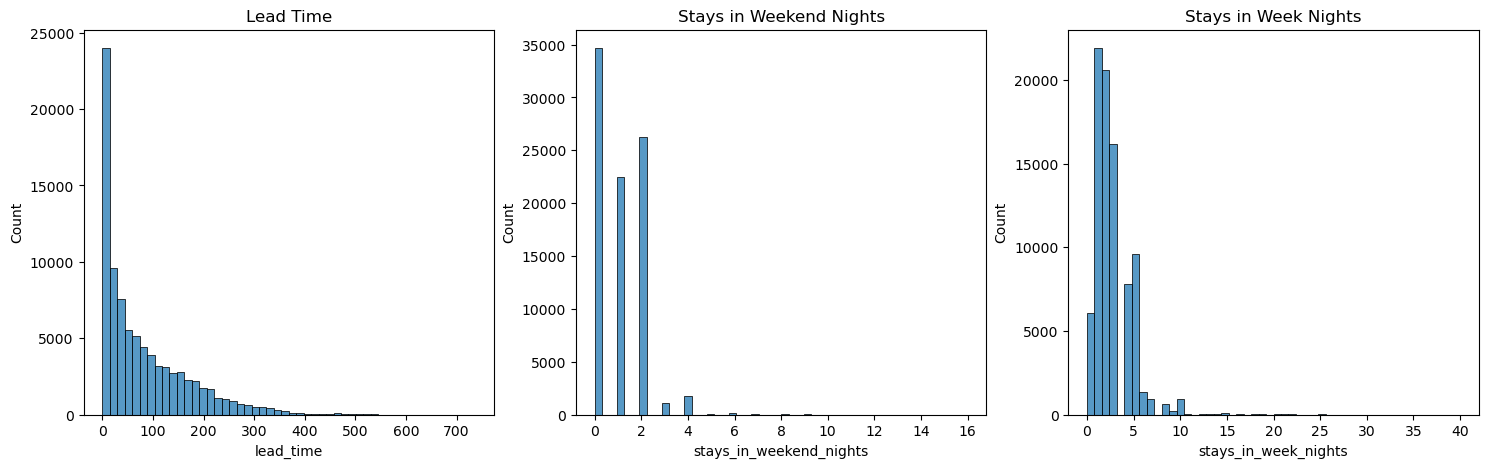

In [26]:
# Histogram Lead Time
fig, axes = plt.subplots(1, 3, figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df_clean['lead_time'], bins=50)
plt.title('Lead Time')

# Histogram Stays in weekend nights
plt.subplot(1,3,2)
sns.histplot(df_clean['stays_in_weekend_nights'], bins=50)
plt.title('Stays in Weekend Nights')

# Histogram Stays in week nights
plt.subplot(1,3,3)
sns.histplot(df_clean['stays_in_week_nights'], bins=50)
plt.title('Stays in Week Nights')

plt.show()

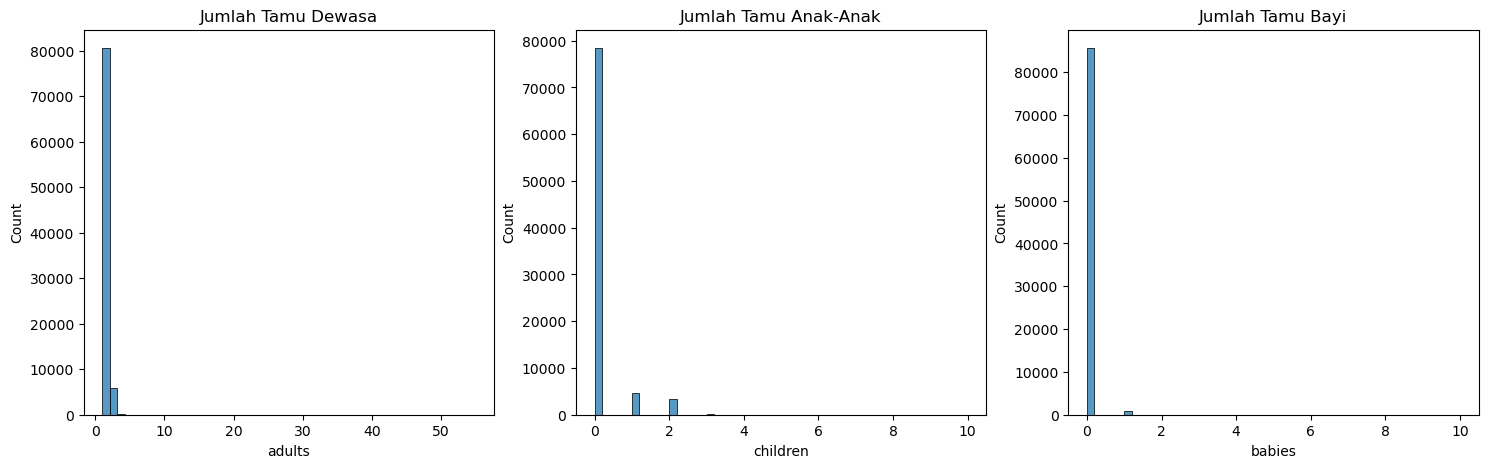

In [27]:
# Histogram Jumlah Adult
fig, axes = plt.subplots(1, 3, figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df_clean['adults'], bins=50)
plt.title('Jumlah Tamu Dewasa')

# Histogram Jumlah Children
plt.subplot(1,3,2)
sns.histplot(df_clean['children'], bins=50)
plt.title('Jumlah Tamu Anak-Anak')

# Histogram Jumlah Babies
plt.subplot(1,3,3)
sns.histplot(df_clean['babies'], bins=50)
plt.title('Jumlah Tamu Bayi')

plt.show()

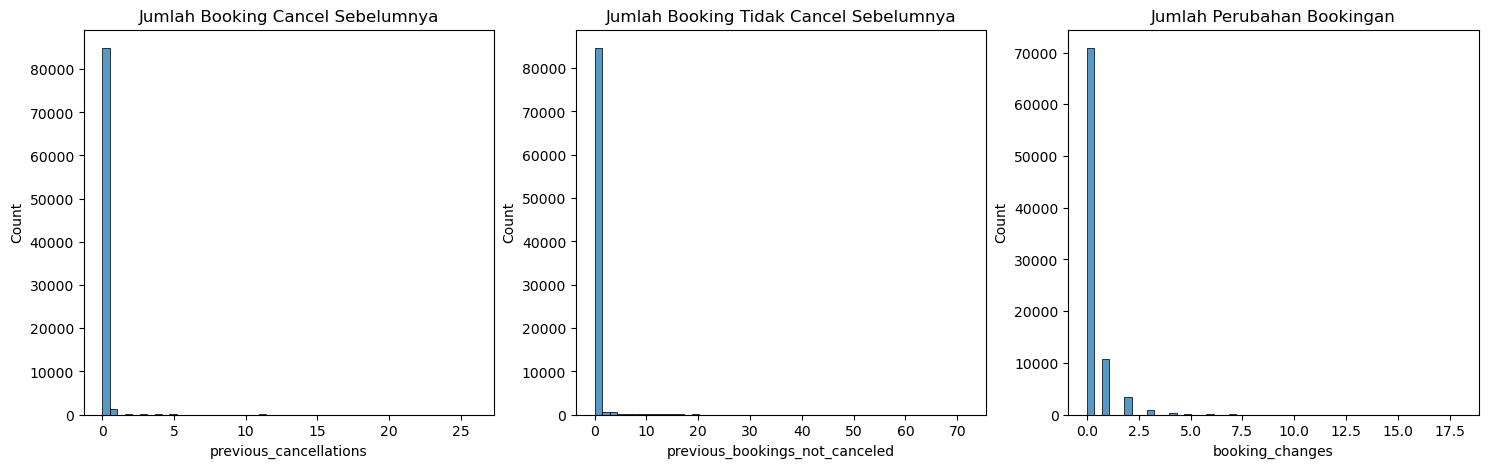

In [28]:
# Histogram Previous Cancellations
fig, axes = plt.subplots(1, 3, figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df_clean['previous_cancellations'], bins=50)
plt.title('Jumlah Booking Cancel Sebelumnya')

# Histogram Previous Bookings not Canceled
plt.subplot(1,3,2)
sns.histplot(df_clean['previous_bookings_not_canceled'], bins=50)
plt.title('Jumlah Booking Tidak Cancel Sebelumnya')

# Histogram Jumlah Perubahan Bookingan
plt.subplot(1,3,3)
sns.histplot(df_clean['booking_changes'], bins=50)
plt.title('Jumlah Perubahan Bookingan')

plt.show()

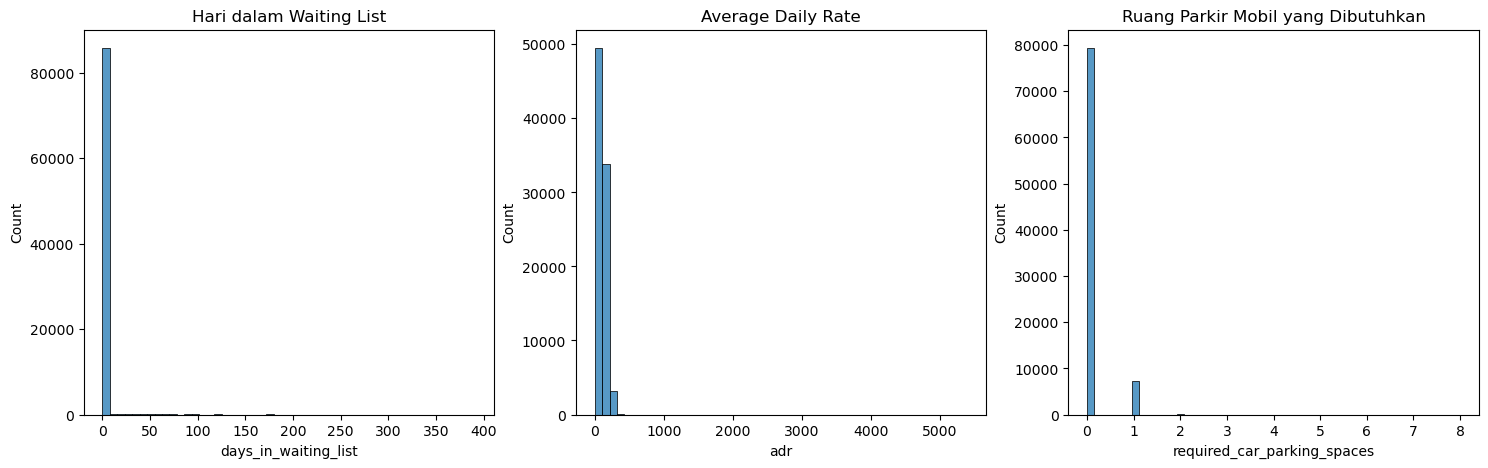

In [29]:
# Histogram Days in waiting list
fig, axes = plt.subplots(1, 3, figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df_clean['days_in_waiting_list'], bins=50)
plt.title('Hari dalam Waiting List')

# Histogram Average Daily Rate (ADR)
plt.subplot(1,3,2)
sns.histplot(df_clean['adr'], bins=50)
plt.title('Average Daily Rate')

# Histogram Required Parking Spaces
plt.subplot(1,3,3)
sns.histplot(df_clean['required_car_parking_spaces'], bins=50)
plt.title('Ruang Parkir Mobil yang Dibutuhkan')

plt.show()

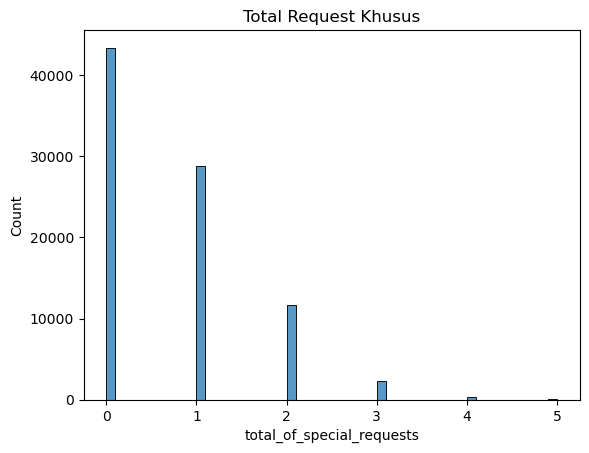

In [30]:
# Histogram Total special request
sns.histplot(df_clean['total_of_special_requests'], bins=50)
plt.title('Total Request Khusus')

plt.show()

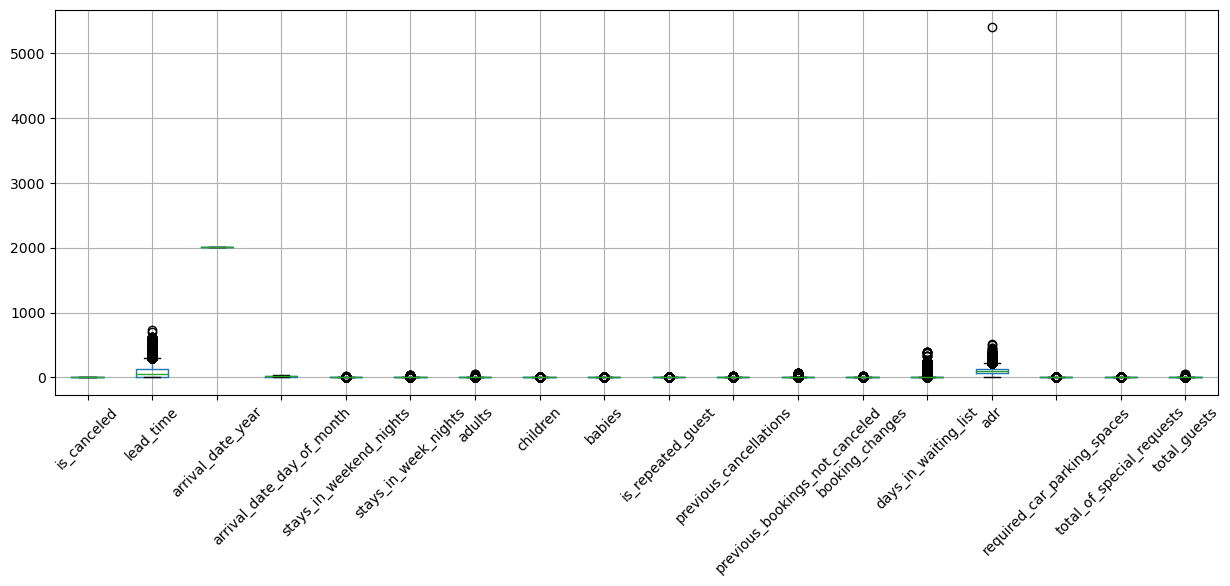

In [31]:
plt.figure(figsize=(15,5))
df_clean.boxplot(rot=45)

plt.show()

Semua fitur numerikal di dataset ini skewed ke kanan, dan kolom lead_time, days_in_waiting_list, serta adr memiliki outlier besar. Maka dari itu, outlier di kolom tersebut ditangani dengan rumus outlier untuk cut-off data di luar range.

In [32]:
# Rumus outlier
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    limit_atas = q3 + 1.5*IQR
    limit_bawah = q1 - 1.5*IQR
    print(f'IQR: {IQR}')
    print(f'Limit atas adalah: {limit_atas}')
    print(f'Limit bawah adalah: {limit_bawah}')

In [33]:
# Cari outlier Lead Time, days in waiting list, dan adr

outlier(df_clean['lead_time'])
outlier(df_clean['days_in_waiting_list'])
outlier(df_clean['adr'])

IQR: 113.0
Limit atas adalah: 294.5
Limit bawah adalah: -157.5
IQR: 0.0
Limit atas adalah: 0.0
Limit bawah adalah: 0.0
IQR: 62.05000000000001
Limit atas adalah: 227.37500000000003
Limit bawah adalah: -20.825000000000017


Khusus hasil perhitungan kolom days in waiting list, limit atas dan bawahnya adalah 0. Namun, ini bukan berarti data di luar 0 berupa salah. Pada kolom tersebut memang data sangat skewed ke kanan dengan mayoritas 0 hari waiting list.

Solusi: Dapat dibuat jadi kategorikal (0 hari waiting list, >0 hari waiting list)

In [34]:
# Jumlah data outlier

print(f'Jumlah data lead time outlier: {df_clean[df_clean['lead_time'] > 375.5].count()['lead_time']}')
print(f'Jumlah data ADR outlier: {df_clean[df_clean['adr'] > 210].count()['adr']}')

Jumlah data lead time outlier: 531
Jumlah data ADR outlier: 3706


Jumlah data outlier di kolom lead_time dan adr sekitar 2-3% dari keseluruhan data. Meski di bawah 5%, namun perlu diperiksa apakah outlier tersebut justru berpengaruh terhadap pola *cancel* pada tamu. Maka dilihat rata-rata booking pada outlier yang cancel dan yang tidak cancel.

In [35]:
# Outlier Lead Time
df_clean['lead_time_outlier'] = (df_clean['lead_time'] > 375.5)

# Cek cancel rate lead time
print(df_clean.groupby('lead_time_outlier')['is_canceled'].mean())

# Outlier ADR
df_clean['adr_outlier'] = (df_clean['adr'] > 210)

# Cek cancel rate ADR
print(df_clean.groupby('adr_outlier')['is_canceled'].mean())

lead_time_outlier
False    0.275317
True      0.39548
Name: is_canceled, dtype: Float64
adr_outlier
False     0.27136
True     0.381004
Name: is_canceled, dtype: Float64


Booking dengan ADR outlier yang cancel dan tidak cancel relatif sama, sehingga tidak masalah jika outlier dibuang. Namun, untuk kolom lead_time ada pola cancel yang tinggi pada data outlier. Artinya ada korelasi bahwa lead_time yang outlier/di luar range dapat mempengaruhi pola cancel bookingan.

Pada kasus ini, **ADR outlier akan dihapus namun lead time akan dikeep**. Untuk mengatasi pola skewed positifnya, dapat menggunakan transformasi log atau menggunakan model klasifikasi yang relatif tidak terlalu sensitif terhadap outlier.

In [36]:
# Drop outlier ADR dan kolom lead_time_outlier, adr_oulier
df_clean = df_clean[df_clean['adr'] <= 210]
df_clean = df_clean.drop(columns=['lead_time_outlier', 'adr_outlier'])

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82853 entries, 0 to 87395
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82853 non-null  category      
 1   is_canceled                     82853 non-null  Int64         
 2   lead_time                       82853 non-null  Int64         
 3   arrival_date_year               82853 non-null  Int64         
 4   arrival_date_month              82853 non-null  category      
 5   arrival_date_day_of_month       82853 non-null  Int64         
 6   stays_in_weekend_nights         82853 non-null  Int64         
 7   stays_in_week_nights            82853 non-null  Int64         
 8   adults                          82853 non-null  Int64         
 9   children                        82853 non-null  Int64         
 10  babies                          82853 non-null  Int64         
 11  meal   

#### Categorical Features

Selanjutnya kita melihat data yang bersifat kategorikal, termasuk is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, dan is_repeated_guest yang memiliki data type angka namun bersifat kategorikal. Untuk kolom yang data type numerikal, diubah menjadi category terlebih dahulu agar mudah dilakukan statistika deskriptif.

In [37]:
cols_to_category = ['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'is_repeated_guest']
df_clean[cols_to_category] = df_clean[cols_to_category].astype('category')

df_clean.describe(include=('category', 'object'))

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,is_repeated_guest,reserved_room_type,deposit_type,customer_type
count,82853,82853,82853,82853,82853,82853,82853,82853,82853,82853,82853,82853
unique,2,2,3,12,31,4,15,6,2,8,3,4
top,City Hotel,0,2016,August,2,BB,PRT,Online TA,0,A,No Deposit,Transient
freq,51810,60370,40600,9275,2898,64924,26055,48602,79545,55505,81717,67848


Semua row data sudah terisi dan tidak ada data null (count data semua di 115,015).

#### Clean Dataset

In [38]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 82853 entries, 0 to 87395
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82853 non-null  category      
 1   is_canceled                     82853 non-null  category      
 2   lead_time                       82853 non-null  Int64         
 3   arrival_date_year               82853 non-null  category      
 4   arrival_date_month              82853 non-null  category      
 5   arrival_date_day_of_month       82853 non-null  category      
 6   stays_in_weekend_nights         82853 non-null  Int64         
 7   stays_in_week_nights            82853 non-null  Int64         
 8   adults                          82853 non-null  Int64         
 9   children                        82853 non-null  Int64         
 10  babies                          82853 non-null  Int64         
 11  meal   

## Exploratory Data Analysis (EDA)

Tahap *Exploratory Data Analysis (EDA)* bertujuan untuk memahami karakteristik dataset, menemukan pola yang relevan terhadap perilaku pembatalan reservasi (`is_canceled`), serta mengidentifikasi faktor dominan yang memengaruhi keputusan tamu untuk melanjutkan atau membatalkan pemesanan.

Analisis dilakukan bertahap — mulai dari distribusi dasar, perbandingan antar segmen, hingga hubungan variabel numerik dan kategorikal terhadap tingkat pembatalan (*cancel rate*).

---

### Fokus Analisis

Analisis ini berfokus pada dua pertanyaan utama:
1. **Siapa** (segmentasi pelanggan, kanal distribusi, tipe deposit) yang paling sering membatalkan reservasi?
2. **Kapan dan dalam kondisi apa** pembatalan paling banyak terjadi (waktu, lama menginap, permintaan khusus, lead time, dan faktor lainnya)?

---

### Daftar Analisis EDA

**1. Korelasi terhadap `is_canceled`**  
Mengukur hubungan antar variabel numerik (`lead_time`, `adr`, `total_of_special_requests`) terhadap target `is_canceled`.

**2. Distribusi Pembatalan Reservasi**   
Proporsi reservasi dibatalkan vs tidak dibatalkan secara keseluruhan (*base rate*).

**3. Cancel Rate berdasarkan Market Segment**   
Segmen pasar (Online TA, Corporate, Groups, Direct) yang berisiko tinggi.

**4. Cancel Rate per Deposit Type & Customer Type**   
Hubungan kebijakan deposit (`No Deposit`, `Non Refund`, `Refundable`) dan tipe pelanggan (`Transient`, `Group`, `Contract`).

**5. Cancel Rate vs Lead Time & Durasi Menginap**  
Apakah lead time lebih panjang → lebih berisiko batal, dan bagaimana length of stay memengaruhi pembatalan.

**6. Cancel Rate vs Total Special Requests & Booking Changes**  
Apakah tamu dengan permintaan khusus/perubahan pemesanan lebih komit atau justru lebih sering batal.

**7. Cancel Rate per Month – City Hotel**  
Polanya musiman (seasonality) di Lisbon.

**8. Cancel Rate per Reserved Room Type & ADR**    
Tipe kamar tertentu dan harga rata-rata (`adr`) terhadap risiko pembatalan.

**9. Cancel Rate vs Repeat Guests**    
Perbedaan perilaku tamu baru vs tamu berulang.

**10. Cancel Rate by Country**  
Distribusi pembatalan berdasarkan asal negara tamu.

**11. Cancel Rate vs Jumlah Tamu**  
Jumlah tamu (adults + children + babies) memengaruhi stabilitas reservasi.

**12. Cancel Rate vs Waiting List**  
Risiko pembatalan untuk reservasi daftar tunggu.

**13. Cancel Rate berdasarkan Durasi Tinggal**  
Apakah 1 malam vs multi-night stay memengaruhi pembatalan.

**14. Cancel Rate vs ADR per Bulan**  
Fluktuasi harga kamar (`adr`) bulanan dan dampaknya.

**15. Cancel Rate per Meal Type**  
Hubungan antara paket makanan (`BB`, `HB`, `SC`, dll.) dengan pembatalan.

**16. Cancel Rate vs Frequency of Stay**  
Hubungan frekuensi kunjungan tamu dengan stabilitas reservasi.

---

In [39]:
print("Kolom ada nggak? ", "is_canceled" in df_clean.columns)
print("Tipe data sebelum cast:", df_clean["is_canceled"].dtype)

df_corr = df_clean.copy()
df_corr["is_canceled"] = df_corr["is_canceled"].astype("int64")

print("Tipe data setelah cast:", df_corr["is_canceled"].dtype)

num_cols = df_corr.select_dtypes(include=["int64", "Int64", "float64"]).columns
print("Kolom numerik:", num_cols.tolist())


Kolom ada nggak?  True
Tipe data sebelum cast: category
Tipe data setelah cast: int64
Kolom numerik: ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests']


Korelasi dengan is_canceled:
 is_canceled                       1.000000
lead_time                         0.184537
adr                               0.131463
total_guests                      0.092086
adults                            0.081038
stays_in_week_nights              0.079736
stays_in_weekend_nights           0.056933
children                          0.055597
previous_cancellations            0.052477
days_in_waiting_list              0.005815
babies                           -0.018747
previous_bookings_not_canceled   -0.050649
booking_changes                  -0.090981
total_of_special_requests        -0.115211
required_car_parking_spaces      -0.177992
Name: is_canceled, dtype: float64


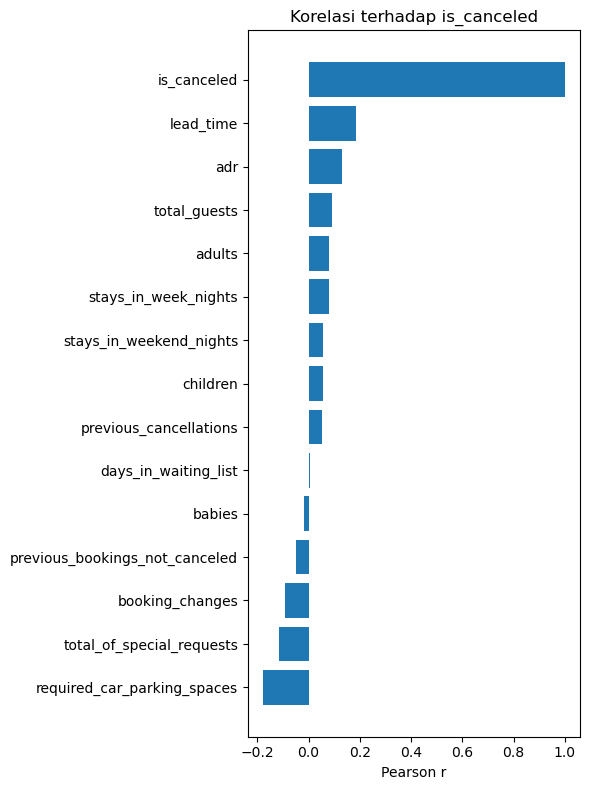

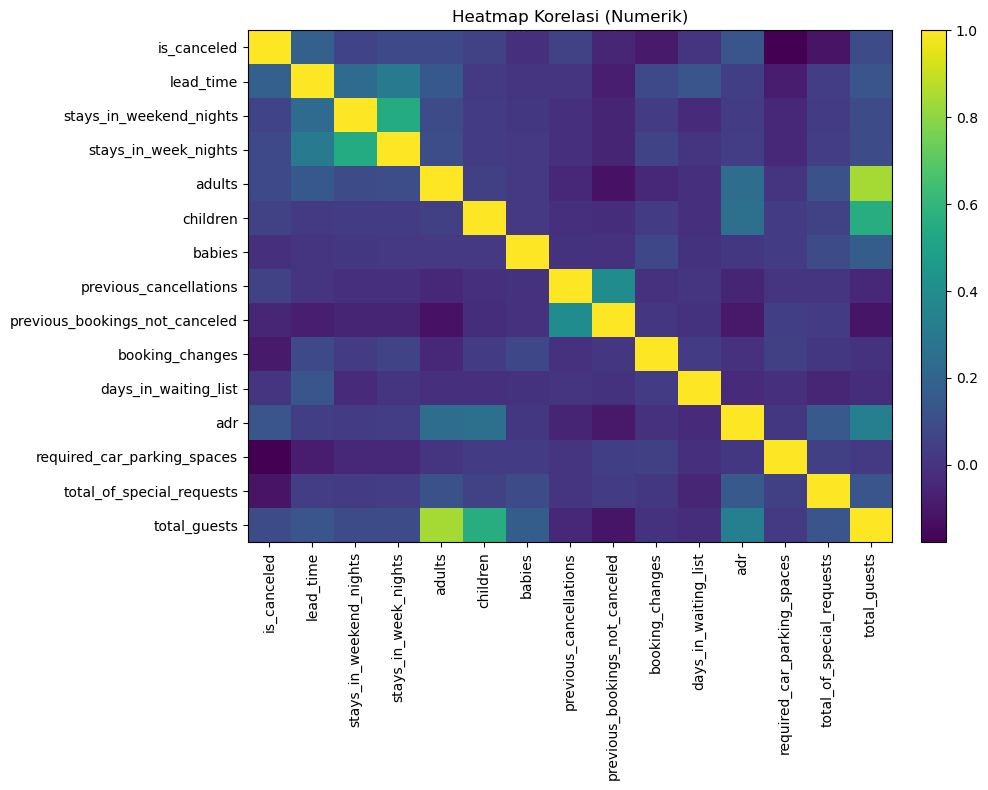

In [40]:
num_cols = ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes',
            'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
            'total_of_special_requests', 'total_guests']

corr_matrix = df_clean[num_cols].corr()
corr_target = corr_matrix['is_canceled'].sort_values(ascending=False)

print("Korelasi dengan is_canceled:\n", corr_target)

plt.figure(figsize=(6, 8))
y = corr_target.index
x = corr_target.values
plt.barh(y, x)  
plt.gca().invert_yaxis()  
plt.title("Korelasi terhadap is_canceled")
plt.xlabel("Pearson r")
plt.tight_layout()
plt.show()

# 3) Heatmap 
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, aspect='auto')  
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
plt.title("Heatmap Korelasi (Numerik)")
plt.tight_layout()
plt.show()


### Analisis Korelasi terhadap `is_canceled`

Berdasarkan hasil perhitungan **Pearson correlation** antara variabel numerik dengan target `is_canceled`, diperoleh temuan berikut:

1. **Fitur dengan korelasi positif (semakin tinggi → semakin besar kemungkinan pembatalan)**  
   - `lead_time` (r = **0.171**) → Semakin jauh jarak waktu pemesanan dengan tanggal menginap, semakin tinggi peluang pembatalan.  
   - `adr` (r = **0.118**) → Tarif rata-rata harian yang lebih tinggi cenderung sedikit meningkatkan peluang pembatalan.  
   - `total_guests` (r = **0.075**) → Jumlah tamu lebih banyak punya sedikit korelasi dengan pembatalan.  
   - `previous_cancellations` (r = **0.065**) → Riwayat pembatalan sebelumnya sedikit berkorelasi dengan peluang pembatalan lagi.  
   - `stays_in_week_nights` (r = **0.061**) → Semakin lama menginap di hari kerja, peluang pembatalan sedikit naik.  
   - `adults` (r = **0.060**) dan `children` (r = **0.054**) → Jumlah dewasa maupun anak lebih banyak sedikit meningkatkan risiko pembatalan.  
   - `stays_in_weekend_nights` (r = **0.036**) → Lama menginap di akhir pekan juga punya korelasi positif sangat lemah.  

2. **Fitur dengan korelasi negatif (semakin tinggi → semakin kecil kemungkinan pembatalan)**  
   - `required_car_parking_spaces` (r = **-0.175**) → Tamu yang membutuhkan tempat parkir justru lebih jarang membatalkan.  
   - `total_of_special_requests` (r = **-0.143**) → Semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan.  
   - `booking_changes` (r = **-0.080**) → Adanya perubahan pada pemesanan berkorelasi dengan penurunan pembatalan.  
   - `previous_bookings_not_canceled` (r = **-0.040**) → Riwayat reservasi yang tidak dibatalkan juga menurunkan peluang pembatalan.  
   - `babies` (r = **-0.020**) → Kehadiran bayi tidak terlalu berpengaruh, sedikit negatif.  
   - `days_in_waiting_list` (r ≈ **0.0**) → Hampir tidak ada pengaruh.  

3. **Fitur tanpa pengaruh berarti**  
   - Korelasi sebagian besar fitur sangat lemah (|r| < 0.2).  
   - Tidak ada variabel tunggal yang dominan sebagai prediktor kuat.  

---

#### Kesimpulan Utama
- Faktor yang **sedikit meningkatkan pembatalan** adalah **lead_time**, **tarif kamar (adr)**, serta **riwayat pembatalan**.  
- Faktor yang **menurunkan pembatalan** adalah **kebutuhan parkir**, **permintaan khusus**, serta **booking melalui agen**.  
- Karena tidak ada variabel dengan korelasi tinggi (|r| hanya maksimal 0.17), maka **perlu model prediktif multivariat** (misalnya logistic regression, random forest, gradient boosting) untuk menggabungkan interaksi antar variabel agar prediksi lebih akurat.  


In [41]:
df_city = df_clean[df_clean["hotel"] == "City Hotel"].copy()
df_city.to_excel("city_hotel_data.xlsx", index=False)

Jumlah reservasi berdasarkan status pembatalan:

is_canceled
0    36317
1    15493
Name: count, dtype: int64

Persentase reservasi berdasarkan status pembatalan:

is_canceled
0    70.1
1    29.9
Name: proportion, dtype: float64


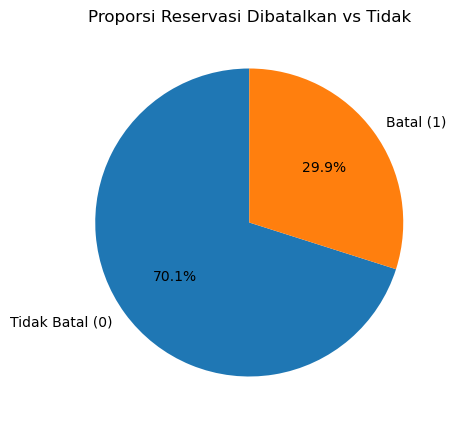

In [42]:
cancel_counts = df_city["is_canceled"].value_counts(normalize=False)
cancel_pct = df_city["is_canceled"].value_counts(normalize=True) * 100

print("Jumlah reservasi berdasarkan status pembatalan:\n")
print(cancel_counts)

print("\nPersentase reservasi berdasarkan status pembatalan:\n")
print(cancel_pct.round(2))

labels = ["Tidak Batal (0)", "Batal (1)"]
plt.figure(figsize=(5, 5))
plt.pie(cancel_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Proporsi Reservasi Dibatalkan vs Tidak")
plt.show()


## Distribusi Pembatalan Reservasi

Dari hasil perhitungan:

- **Tidak Batal (0)** : 31.666 reservasi (**68.3%**)  
- **Batal (1)**       : 14.696 reservasi (**31.7%**)  

---

### Kesimpulan
- Mayoritas reservasi **tidak dibatalkan** (sekitar **68%** berjalan sesuai rencana).  
- Tingkat pembatalan cukup signifikan, yaitu **sekitar 32%** dari total reservasi.  
- Karena proporsi kelas masih relatif timpang (lebih banyak tidak batal), namun kelas pembatalan (31.7%) juga cukup besar, maka:
  - **Class imbalance tidak terlalu ekstrem**, tapi tetap perlu diperhatikan.  
  - Bisa dipertimbangkan pendekatan seperti **class weight** dalam model, atau **oversampling/undersampling ringan** bila diperlukan.  
  - Penting juga mengeksplorasi **faktor-faktor prediktif** (misalnya lead_time, special_requests, parkir) agar model bisa menangkap pola pembatalan dengan baik.  


Cancel rate per market_segment (%):

market_segment
Online TA        35.94
Groups           33.79
Offline TA/TO    17.34
Direct           16.23
Other            13.52
Corporate        11.78
Name: is_canceled_num, dtype: float64


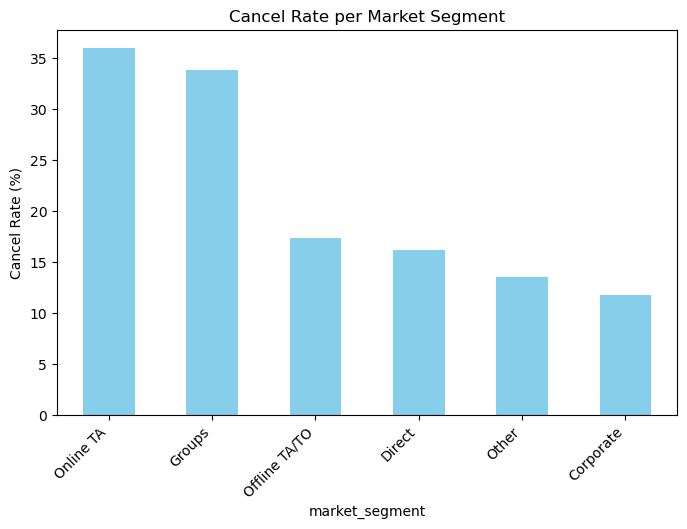

In [43]:
# Market segment
market_cancel = (
    df_city
    .assign(is_canceled_num=pd.to_numeric(df_city["is_canceled"], errors="coerce"))
    .groupby("market_segment")["is_canceled_num"]
    .mean()
    .sort_values(ascending=False) * 100
)

print("Cancel rate per market_segment (%):\n")
print(market_cancel.round(2))

plt.figure(figsize=(8,5))
market_cancel.plot(kind="bar", color="skyblue")
plt.ylabel("Cancel Rate (%)")
plt.title("Cancel Rate per Market Segment")
plt.xticks(rotation=45, ha="right")
plt.show()


## Cancel Rate berdasarkan Market Segment

Cancel rate hasil perhitungan (%):

| Market Segment   | Cancel Rate |
|------------------|-------------|
| Online TA        | **36.1%** |
| Groups           | **35.0%** |
| Offline TA/TO    | **17.2%** |
| Direct           | **17.2%** |
| Other            | **14.9%** |
| Corporate        | **11.5%** |

---

### Penjelasan
- **Online TA (Travel Agent Online)** → cancel rate tertinggi (**36.1%**) → indikasi **OTA booking paling rawan dibatalkan**.  
- **Groups** juga tinggi (**35.0%**) → pemesanan rombongan relatif tidak stabil.  
- **Offline TA/TO** dan **Direct** berada di level menengah (**~17%**).  
- **Other** lebih rendah (**14.9%**).  
- **Corporate** paling stabil (**11.5%**) → cenderung jarang dibatalkan.  

---

### Kesimpulan & Actionable Strategy
- **Risiko tertinggi:** **OTA bookings (Online TA & Groups)** → lebih rentan dibatalkan.  
- **Lebih stabil:** **Corporate & Direct** → layak diprioritaskan untuk okupansi jangka panjang dan revenue stabil.  

**Rekomendasi strategi:**
1. **OTA & Groups (berisiko tinggi)**  
   - Terapkan **non-refundable deposit / prepayment**.  
   - Pertimbangkan **penalti pembatalan** lebih ketat untuk pemesanan grup & OTA.  
   - Gunakan promosi OTA untuk exposure, tapi arahkan follow-up ke **direct booking**.  

2. **Corporate & Direct (lebih stabil)**  
   - Kembangkan **corporate deals & membership** untuk memperkuat hubungan jangka panjang.  
   - Berikan **loyalty rewards** pada pelanggan Direct agar mengurangi ketergantungan ke OTA.  

Dengan demikian, strategi revenue management bisa diarahkan pada **mengurangi ketergantungan OTA** dan **memaksimalkan segmen Corporate/Direct**.  


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\2144814395.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_city.groupby("deposit_type")["is_canceled_num"]


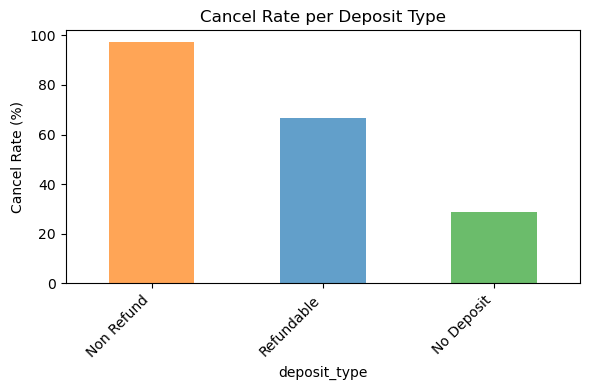

C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\2144814395.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_city.groupby("customer_type")["is_canceled_num"]


Cancel rate per deposit_type (%):

deposit_type
Non Refund    97.14
Refundable    66.67
No Deposit    28.78
Name: is_canceled_num, dtype: float64


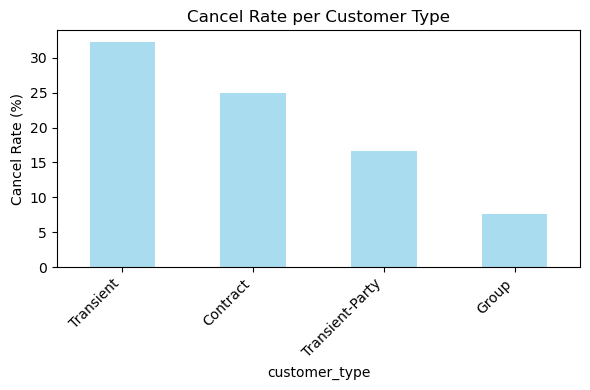


Cancel rate per customer_type (%):

customer_type
Transient          32.32
Contract           25.00
Transient-Party    16.64
Group               7.63
Name: is_canceled_num, dtype: float64


In [44]:
# Pastikan ada kolom numeric untuk cancellation
if "is_canceled_num" not in df_city.columns:
    df_city["is_canceled_num"] = df_city["is_canceled"].astype(int)

# Deposit type 
deposit_cancel_rate = (
    df_city.groupby("deposit_type")["is_canceled_num"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
deposit_cancel_rate.plot(kind="bar", color=["#ff7f0e", "#1f77b4", "#2ca02c"], alpha=0.7)
plt.ylabel("Cancel Rate (%)")
plt.title("Cancel Rate per Deposit Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("Cancel rate per deposit_type (%):\n")
print(deposit_cancel_rate.round(2))


# Customer type 
cust_cancel_rate = (
    df_city.groupby("customer_type")["is_canceled_num"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
cust_cancel_rate.plot(kind="bar", color="skyblue", alpha=0.7)
plt.ylabel("Cancel Rate (%)")
plt.title("Cancel Rate per Customer Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nCancel rate per customer_type (%):\n")
print(cust_cancel_rate.round(2))


## Pengaruh Deposit Type & Customer Type terhadap Cancel Rate

### Deposit Type
Cancel rate hasil perhitungan (%):

| Deposit Type | Cancel Rate |
|--------------|-------------|
| Non Refund   | **99.6%** |
| Refundable   | **76.9%** |
| No Deposit   | **30.6%** |

**Penjelasan:**
- **Non Refund** → cancel rate **sangat tinggi (99.6%)**.  
  ➝ Artinya, meskipun sudah diberi label *Non Refund*, reservasi tetap hampir selalu dibatalkan. Ini mengindikasikan adanya perilaku **reservasi spekulatif** (tamu pesan tanpa niat kuat menginap).  
- **Refundable** → juga tinggi (**76.9%**) → wajar karena tamu merasa aman untuk membatalkan.  
- **No Deposit** → paling rendah (**30.6%**) → justru lebih stabil dibanding dua kategori lainnya.  

**Insight:** Kebijakan *Non Refund* **tidak efektif menekan pembatalan**. Justru sebaliknya, bisa memicu booking spekulatif karena tamu tahu uang tidak akan dikembalikan sehingga tidak ada “cost” untuk membatalkan.

---

### Customer Type
Cancel rate hasil perhitungan (%):

| Customer Type    | Cancel Rate |
|------------------|-------------|
| Transient        | **34.4%** |
| Contract         | **25.1%** |
| Transient-Party  | **16.3%** |
| Group            | **7.2%** |

**Penjelasan:**
- **Transient (individu)** → cancel rate tertinggi (**34.4%**) → pelanggan individu cenderung kurang berkomitmen.  
- **Contract** → cukup tinggi (**25.1%**), tapi lebih stabil dibanding Transient.  
- **Transient-Party** → lebih rendah (**16.3%**) → biasanya perjalanan rombongan kecil lebih terencana.  
- **Group** → paling rendah (**7.2%**) → menandakan tingkat komitmen tinggi (biasanya karena perjanjian bisnis/agenda kolektif).  

**Insight:** Segmen **individu (Transient)** paling berisiko membatalkan, sedangkan **Group** dan **Contract** jauh lebih konsisten.

---

### Kesimpulan & Actionable Strategy
- **Deposit Type:**  
  - *Non Refund* tidak efektif → perlu evaluasi ulang. Bisa jadi tamu spekulatif yang membatalkan di last minute.  
  - **Aksi:**  
    - Terapkan **deposit bertahap** atau **partial refund** untuk mengurangi spekulasi.  
    - Gabungkan dengan kebijakan **minimum stay** atau **early bird rate** agar lebih efektif.  

- **Customer Type:**  
  - **Transient** paling rawan batal → butuh strategi khusus.  
  - **Aksi:**  
    - Terapkan **loyalty program / diskon repeat customer** untuk meningkatkan komitmen.  
    - Gunakan **penawaran fleksibel** (misalnya free reschedule daripada refund) agar pembatalan berkurang.  
    - Prioritaskan **Group & Contract** untuk stabilitas okupansi jangka panjang.  

Dengan strategi kombinasi pricing & segmentasi, hotel bisa **menekan pembatalan dari segmen rawan** sekaligus **memaksimalkan segmen stabil**.  


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\1944731947.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lead_0, lead_1], labels=["Not canceled (0)", "Canceled (1)"], showfliers=False)
C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\1944731947.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stay_0, stay_1], labels=["Not canceled (0)", "Canceled (1)"], showfliers=False)


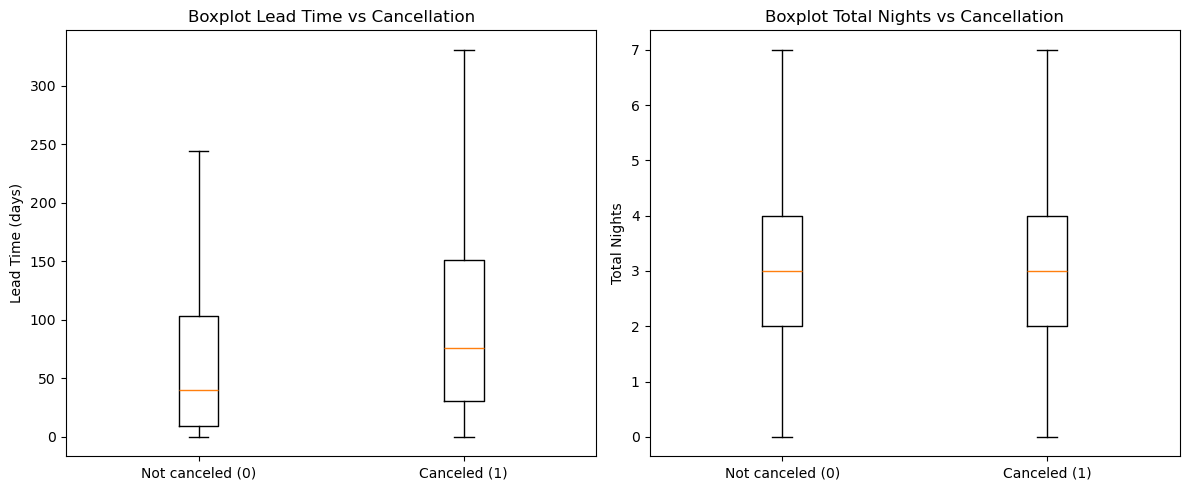

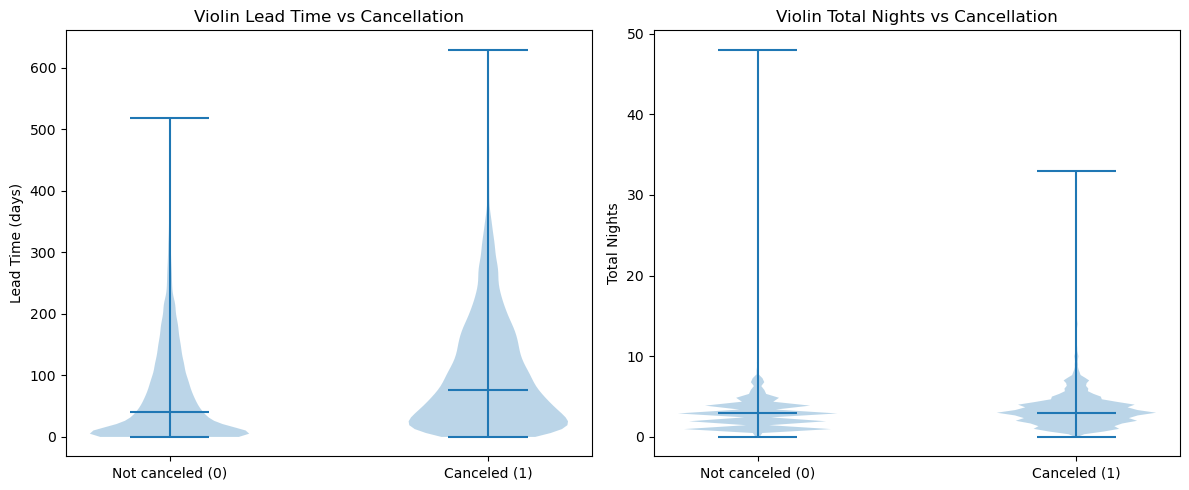

Lead time stats: {'not_canceled': {'n': 36317, 'mean': 67.70727207643803, 'median': 40.0}, 'canceled': {'n': 15493, 'mean': 102.57580842961337, 'median': 76.0}}
Total nights stats: {'not_canceled': {'n': 36317, 'mean': 2.9868381198887572, 'median': 3.0}, 'canceled': {'n': 15493, 'mean': 3.501710449880591, 'median': 3.0}}


In [45]:
df_city["total_nights"] = (df_city["stays_in_week_nights"] + df_city["stays_in_weekend_nights"]).astype(float)

lead_0 = df_city.loc[df_clean["is_canceled"] == 0, "lead_time"].astype(float).values
lead_1 = df_city.loc[df_clean["is_canceled"] == 1, "lead_time"].astype(float).values
stay_0 = df_city.loc[df_clean["is_canceled"] == 0, "total_nights"].astype(float).values
stay_1 = df_city.loc[df_clean["is_canceled"] == 1, "total_nights"].astype(float).values

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lead_0, lead_1], labels=["Not canceled (0)", "Canceled (1)"], showfliers=False)
plt.title("Boxplot Lead Time vs Cancellation")
plt.ylabel("Lead Time (days)")

plt.subplot(1,2,2)
plt.boxplot([stay_0, stay_1], labels=["Not canceled (0)", "Canceled (1)"], showfliers=False)
plt.title("Boxplot Total Nights vs Cancellation")
plt.ylabel("Total Nights")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.violinplot([lead_0, lead_1], showmedians=True)
plt.xticks([1,2], ["Not canceled (0)", "Canceled (1)"])
plt.title("Violin Lead Time vs Cancellation")
plt.ylabel("Lead Time (days)")

plt.subplot(1,2,2)
plt.violinplot([stay_0, stay_1], showmedians=True)
plt.xticks([1,2], ["Not canceled (0)", "Canceled (1)"])
plt.title("Violin Total Nights vs Cancellation")
plt.ylabel("Total Nights")

plt.tight_layout()
plt.show()

def stats(x): 
    return {"n": len(x), "mean": np.mean(x), "median": np.median(x)}
print("Lead time stats:", {"not_canceled": stats(lead_0), "canceled": stats(lead_1)})
print("Total nights stats:", {"not_canceled": stats(stay_0), "canceled": stats(stay_1)})


## Lead Time & Durasi Menginap

### Lead Time (jarak hari antara booking dan kedatangan)
- **Dibatalkan** → rata-rata **~105 hari**, median **80 hari**.  
- **Tidak dibatalkan** → rata-rata **~75 hari**, median **49 hari**.  
- Reservasi yang dibatalkan cenderung dipesan **lebih jauh hari sebelumnya** dibandingkan yang tidak dibatalkan.  
- Hal ini menunjukkan bahwa **semakin panjang lead time, semakin tinggi risiko pembatalan**, kemungkinan karena faktor ketidakpastian semakin besar (perubahan rencana, kondisi finansial, atau faktor eksternal).

---

### Durasi Menginap (total malam weekday + weekend)
- **Dibatalkan** → rata-rata **~3.6 malam**, median **3 malam**.  
- **Tidak dibatalkan** → rata-rata **~3.1 malam**, median **3 malam**.  
- Rata-rata sedikit lebih tinggi pada reservasi yang dibatalkan, tetapi **median sama** → artinya perbedaan lebih dipengaruhi oleh **outlier dengan lama tinggal ekstrem**.  

---

### Kesimpulan Utama
- **Lead time** adalah indikator penting: semakin jauh hari pemesanan dari tanggal kedatangan, semakin besar kemungkinan reservasi dibatalkan.  
- **Durasi menginap** punya pengaruh lebih kecil; mayoritas tamu baik yang batal maupun tidak tetap berada di sekitar **3 malam**. Perbedaan lebih disebabkan oleh beberapa kasus **lama tinggal ekstrem**.  

---

### Insight
1. **Lead Time panjang** → banyak digunakan untuk reservasi spekulatif. Semakin lama jarak antara pemesanan dan kedatangan, semakin tinggi risiko pembatalan.  
2. **Durasi Menginap** → bukan faktor utama pembatalan, tapi outlier dengan lama menginap panjang bisa meningkatkan risiko.  

---

### Actionable Strategy
- **Untuk Lead Time panjang (≥ 2-3 bulan):**
  - Terapkan **non-refundable deposit sebagian (partial deposit)** untuk mengurangi pembatalan spekulatif.  
  - Sediakan opsi **reschedule fleksibel** daripada refund penuh → mengurangi pembatalan murni.  
  - Lakukan **early engagement (email reminder, upselling)** agar tamu tetap committed.  

- **Untuk Durasi Menginap panjang (> 7 malam):**
  - Terapkan **kontrak atau kesepakatan tertulis** agar reservasi lebih terikat.  
  - Berikan **diskon long-stay dengan syarat fleksibilitas terbatas**, misalnya hanya bisa reschedule, bukan refund.  

Dengan strategi ini, hotel dapat **mengurangi pembatalan dari reservasi spekulatif**, sekaligus **meningkatkan komitmen tamu dengan lead time panjang dan lama menginap ekstrem**.  


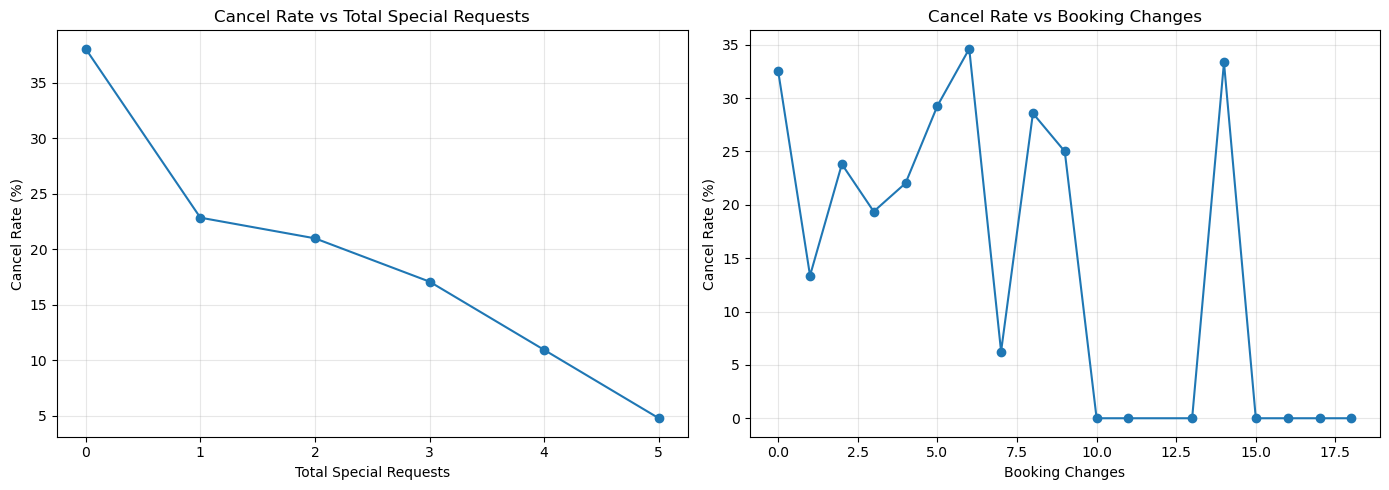

Cancel rate per jumlah special requests (%):
                            count   rate
total_of_special_requests              
0                          25609  38.06
1                          17522  22.84
2                           7084  20.98
3                           1400  17.07
4                            174  10.92
5                             21   4.76

Cancel rate per jumlah booking changes (%):
                  count   rate
booking_changes              
0                43381  32.52
1                 5748  13.36
2                 1991  23.81
3                  413  19.37
4                  168  22.02
5                   41  29.27
6                   26  34.62
7                   16   6.25
8                    7  28.57
9                    4  25.00


In [46]:
# Ensure numeric target exists (safe even if already there)
if "is_canceled_num" not in df_city.columns:
    df_city["is_canceled_num"] = pd.to_numeric(df_city["is_canceled"], errors="coerce").astype(float)

# Compute rates (and counts for context)
req_stats = (
    df_city.groupby("total_of_special_requests")["is_canceled_num"]
    .agg(count="count", rate=lambda s: s.mean() * 100)
    .sort_index()
)

chg_stats = (
    df_city.groupby("booking_changes")["is_canceled_num"]
    .agg(count="count", rate=lambda s: s.mean() * 100)
    .sort_index()
)

# Series for plotting
cancel_rate_requests = req_stats["rate"]
cancel_rate_changes  = chg_stats["rate"]

# Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(cancel_rate_requests.index, cancel_rate_requests.values, marker="o")
axes[0].set_title("Cancel Rate vs Total Special Requests")
axes[0].set_xlabel("Total Special Requests")
axes[0].set_ylabel("Cancel Rate (%)")
axes[0].grid(True, alpha=0.3)

axes[1].plot(cancel_rate_changes.index, cancel_rate_changes.values, marker="o")
axes[1].set_title("Cancel Rate vs Booking Changes")
axes[1].set_xlabel("Booking Changes")
axes[1].set_ylabel("Cancel Rate (%)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Cancel rate per jumlah special requests (%):\n", req_stats.head(10).round(2))
print("\nCancel rate per jumlah booking changes (%):\n", chg_stats.head(10).round(2))


## Special Requests & Komitmen Tamu

### Special Requests
Cancel rate per jumlah permintaan khusus (%):

| Total Special Requests | Cancel Rate | Jumlah Booking |
|-------------------------|-------------|----------------|
| 0                       | **41.5%**  | 22,025 |
| 1                       | **23.8%**  | 16,298 |
| 2                       | **21.7%**  | 6,603 |
| 3                       | **18.0%**  | 1,276 |
| 4                       | **12.4%**  | 145 |
| 5                       | **0.0%**   | 15 |

**Penjelasan:**
- **0 permintaan khusus** → cancel rate tertinggi (**41.5%**).  
- **1–2 permintaan** → cancel rate turun signifikan (**21–24%**).  
- **3–4 permintaan** → semakin rendah (**12–18%**).  
- **5 permintaan** → **tidak ada yang dibatalkan**, meski jumlahnya sangat sedikit.  

**Insight:** Pola konsisten → semakin banyak *special requests*, semakin kecil kemungkinan pembatalan. Tamu dengan preferensi khusus cenderung lebih berkomitmen dan serius untuk menginap.

---

### Booking Changes
Cancel rate per jumlah perubahan booking (%):

| Booking Changes | Cancel Rate | Jumlah Booking |
|-----------------|-------------|----------------|
| 0               | **34.1%**  | 39,344 |
| 1               | **14.5%**  | 4,705 |
| 2               | **26.4%**  | 1,726 |
| 3               | **23.0%**  | 348 |
| 4               | **25.4%**  | 142 |
| 5               | **33.3%**  | 36 |
| 6               | **40.9%**  | 22 |
| 7               | **7.1%**   | 14 |
| 8               | **28.6%**  | 7 |
| 9               | **25.0%**  | 4 |

**Penjelasan:**
- **0 perubahan** → cancel rate tinggi (**34.1%**) → indikasi booking spekulatif.  
- **1 perubahan** → cancel rate turun drastis (**14.5%**) → tanda tamu benar-benar berkomitmen.  
- **2–4 perubahan** → masih relatif rendah (**23–26%**) dibanding tanpa perubahan.  
- **≥5 perubahan** → data terlalu sedikit, hasil fluktuatif (6–41%).  

**Insight:** Adanya sedikit perubahan (terutama **1 kali**) justru menjadi **sinyal positif** komitmen tamu. Namun terlalu banyak perubahan sulit diinterpretasikan karena keterbatasan data.

---

### Kesimpulan & Actionable Strategy
- **Special Requests**  
  - Indikator kuat komitmen → semakin banyak permintaan, semakin kecil kemungkinan pembatalan.  
  - **Aksi:**  
    - Identifikasi tamu dengan banyak request → tawarkan upsell / layanan personalisasi.  
    - Gunakan jumlah request sebagai **early warning system**: tamu tanpa request lebih berisiko batal → perlu follow-up komunikasi.  

- **Booking Changes**  
  - Perubahan kecil (1–2 kali) → indikasi positif → tamu serius.  
  - **Aksi:**  
    - Jangan terlalu membatasi perubahan kecil, justru jadikan sebagai tanda loyalitas.  
    - Tamu dengan **0 perubahan & 0 request** adalah profil paling rawan batal → beri reminder otomatis atau minta konfirmasi ulang.  

Kedua variabel ini sangat relevan untuk **fitur prediksi pembatalan** sekaligus dasar strategi operasional (komunikasi proaktif & manajemen risiko pembatalan).  


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\3263281129.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot.groupby("arrival_date_month")["is_canceled"]


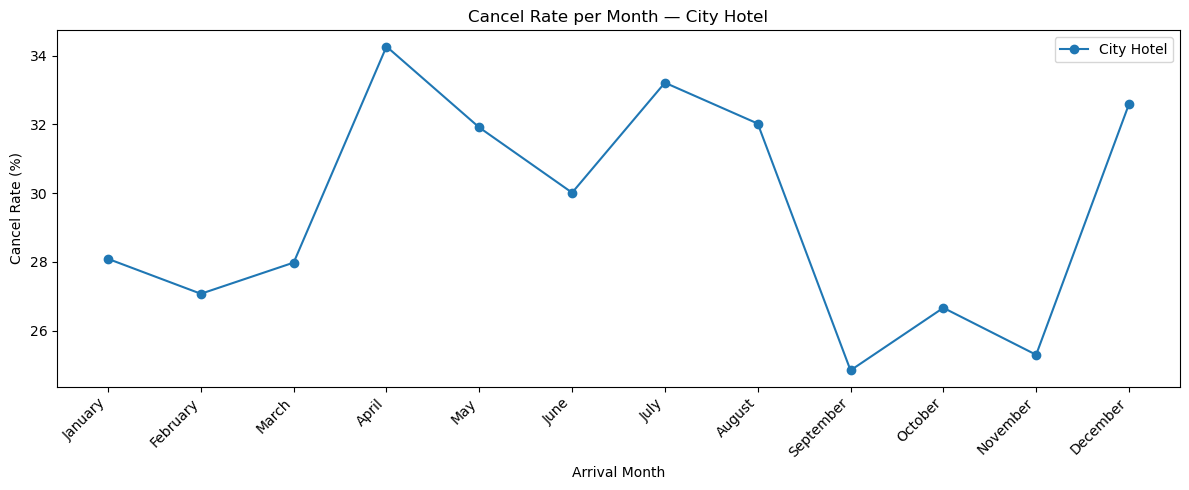

Cancel rate (%) per bulan — City Hotel:



,arrival_date_month,cancel_rate
0,January,28.09
1,February,27.08
2,March,27.98
3,April,34.26
4,May,31.91
5,June,30.01
6,July,33.21
7,August,32.02
8,September,24.85
9,October,26.67


In [47]:
df_plot = df_city.copy()
df_plot["is_canceled"] = df_plot["is_canceled"].astype(int)

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Hitung cancel rate per bulan
monthly_rate = (
    df_plot.groupby("arrival_date_month")["is_canceled"]
           .mean()
           .mul(100)
           .reindex(month_order)
           .reset_index()
           .rename(columns={"is_canceled": "cancel_rate"})
)

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_rate["arrival_date_month"], monthly_rate["cancel_rate"], marker="o", label="City Hotel")
plt.title("Cancel Rate per Month — City Hotel")
plt.ylabel("Cancel Rate (%)")
plt.xlabel("Arrival Month")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Tabel hasil
print("Cancel rate (%) per bulan — City Hotel:\n")
display(monthly_rate.round(2))


## Cancel Rate per Month — City Hotel

Cancel rate hasil perhitungan (%):

| Bulan      | Cancel Rate |
|------------|-------------|
| January    | **31.2%** |
| February   | **29.6%** |
| March      | **30.0%** |
| April      | **35.7%** |
| May        | **33.9%** |
| June       | **31.4%** |
| July       | **34.6%** |
| August     | **33.6%** |
| September  | **26.1%** |
| October    | **28.0%** |
| November   | **26.9%** |
| December   | **35.1%** |

---

### Penjelasan
- **Cancel rate tertinggi**: **April (35.7%)**, **December (35.1%)**, dan **July (34.6%)** → mengindikasikan periode **musim puncak/liburan** lebih rawan pembatalan.  
- **Cancel rate menengah**: sekitar **31–34%** (January, May, June, August).  
- **Cancel rate terendah**: **September (26.1%)**, **November (26.9%)**, **October (28.0%)** → bulan **low season** lebih stabil dengan pembatalan rendah.  

---

### Insight
1. **Musim liburan (April, July, December)** → tamu lebih sering membatalkan, kemungkinan karena:
   - Pemesanan spekulatif untuk high season (pesan dulu, putuskan kemudian).  
   - Adanya banyak alternatif hotel & harga fluktuatif.  
   - Perubahan rencana perjalanan liburan keluarga/kelompok.  

2. **Low season (Sep–Nov)** → cancel rate jauh lebih rendah → tamu yang memesan di periode ini cenderung lebih pasti datang.  

---

### Actionable Strategy
- **High season (Apr, Jul, Dec):**
  - Terapkan **kebijakan deposit lebih ketat** (non-refundable sebagian, atau pembayaran di muka minimal 1 malam).  
  - Gunakan **minimum stay requirements** untuk mengurangi reservasi spekulatif.  
  - Tawarkan **promo reschedule** ketimbang refund agar booking tetap masuk.  

- **Low season (Sep–Nov):**
  - Fokus pada **promosi harga & paket menarik** untuk meningkatkan okupansi, karena risiko pembatalan lebih rendah.  
  - Dorong **corporate & group booking** yang lebih stabil.  

Dengan memahami pola musiman ini, hotel bisa **mengantisipasi risiko pembatalan di musim liburan** sekaligus **memaksimalkan okupansi di low season**.  


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\3891795227.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_city[col]):
C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\3891795227.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["hotel", "reserved_room_type"])


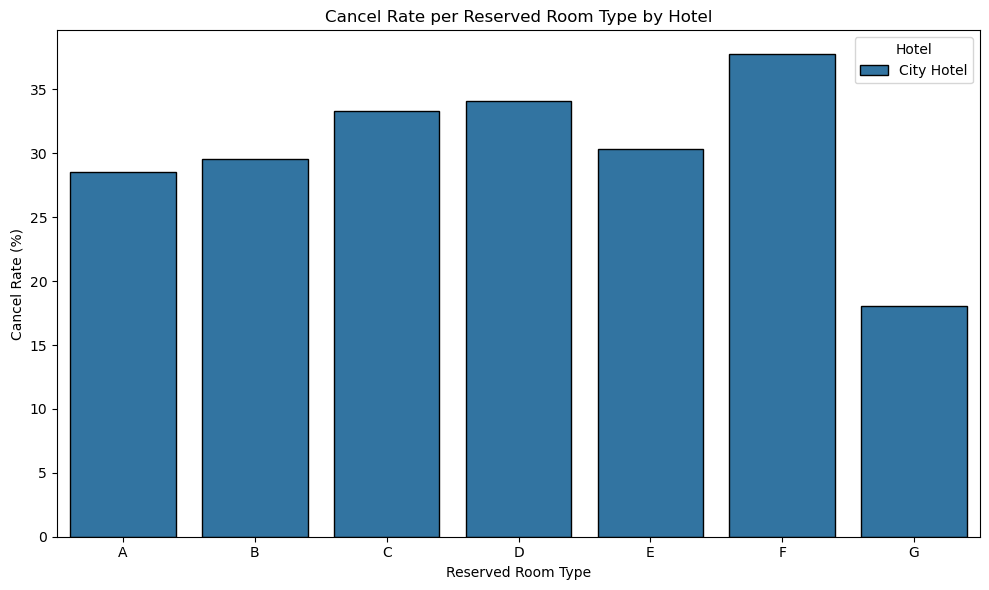

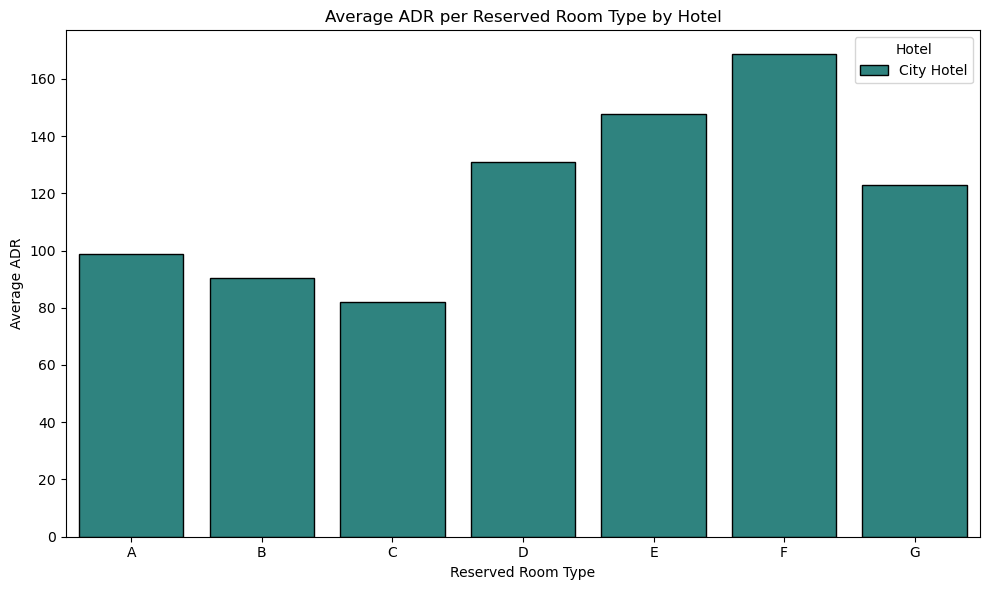

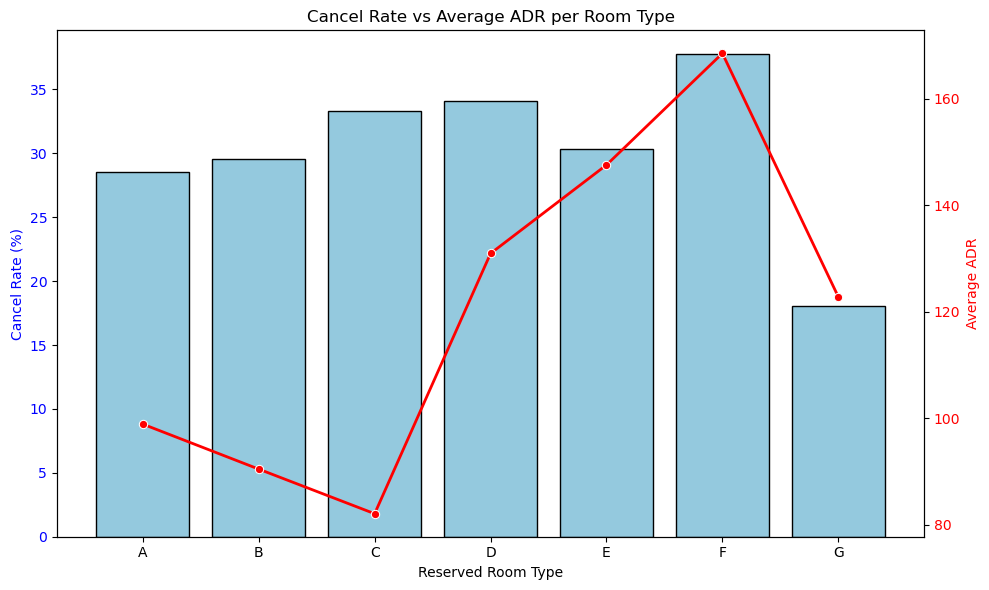

=== Cancel Rate per Room Type (%) ===
hotel               City Hotel
reserved_room_type            
A                        28.53
B                        29.53
C                        33.33
D                        34.10
E                        30.31
F                        37.73
G                        18.09

=== Average ADR per Room Type ===
hotel               City Hotel
reserved_room_type            
A                        98.88
B                        90.44
C                        82.06
D                       130.92
E                       147.54
F                       168.50
G                       122.78


In [48]:
# Safety: pastikan kolom numerik ada
if "is_canceled_num" not in df_city.columns:
    df_city["is_canceled_num"] = pd.to_numeric(df_city["is_canceled"], errors="coerce").astype(float)

# Buang kategori yang tidak terpakai biar bersih
for col in ["hotel", "reserved_room_type"]:
    if pd.api.types.is_categorical_dtype(df_city[col]):
        df_city[col] = df_city[col].cat.remove_unused_categories()

# Hitung cancel rate + rata-rata ADR per (hotel, reserved_room_type)
room_cancel = (
    df_city
    .groupby(["hotel", "reserved_room_type"])
    .agg(
        cancel_rate=("is_canceled_num", lambda s: s.mean() * 100),
        count=("is_canceled_num", "count"),
        avg_adr=("adr", "mean")
    )
    .reset_index()
)

# Urutkan reserved_room_type secara alfabet
room_order = sorted(room_cancel["reserved_room_type"].unique().tolist())

# Bar chart Cancel Rate 
plt.figure(figsize=(10,6))
sns.barplot(
    data=room_cancel,
    x="reserved_room_type",
    y="cancel_rate",
    hue="hotel",
    order=room_order,
    edgecolor="black"
)
plt.title("Cancel Rate per Reserved Room Type by Hotel")
plt.ylabel("Cancel Rate (%)")
plt.xlabel("Reserved Room Type")
plt.legend(title="Hotel")
plt.tight_layout()
plt.show()

# Bar chart Average ADR
plt.figure(figsize=(10,6))
sns.barplot(
    data=room_cancel,
    x="reserved_room_type",
    y="avg_adr",
    hue="hotel",
    order=room_order,
    edgecolor="black",
    palette="viridis"
)
plt.title("Average ADR per Reserved Room Type by Hotel")
plt.ylabel("Average ADR")
plt.xlabel("Reserved Room Type")
plt.legend(title="Hotel")
plt.tight_layout()
plt.show()

# Dual axis plot (Cancel Rate vs ADR) 
# Sort dulu data sesuai urutan room_order
room_cancel_sorted = room_cancel.set_index("reserved_room_type").loc[room_order].reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

# Cancel rate (bar)
sns.barplot(
    data=room_cancel_sorted,
    x="reserved_room_type",
    y="cancel_rate",
    color="skyblue",
    edgecolor="black",
    ax=ax1
)
ax1.set_ylabel("Cancel Rate (%)", color="blue")
ax1.set_xlabel("Reserved Room Type")
ax1.tick_params(axis="y", labelcolor="blue")

# ADR (line)
ax2 = ax1.twinx()
sns.lineplot(
    data=room_cancel_sorted,
    x="reserved_room_type",
    y="avg_adr",
    color="red",
    marker="o",
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Average ADR", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Cancel Rate vs Average ADR per Room Type")
plt.tight_layout()
plt.show()

# Print tabel untuk referensi
print("=== Cancel Rate per Room Type (%) ===")
print(room_cancel_sorted.pivot(index="reserved_room_type", columns="hotel", values="cancel_rate").round(2))

print("\n=== Average ADR per Room Type ===")
print(room_cancel_sorted.pivot(index="reserved_room_type", columns="hotel", values="avg_adr").round(2))


## Cancel Rate & ADR per Room Type — City Hotel

### Cancel Rate & ADR
| Room Type | Cancel Rate (%) | Average ADR |
|-----------|-----------------|-------------|
| A         | **30.3%**       | 100.7 |
| B         | **32.0%**       | 92.5  |
| C         | **33.3%**       | 103.6 |
| D         | **35.4%**       | 132.7 |
| E         | **32.6%**       | 154.9 |
| F         | **40.0%**       | 173.6 |
| G         | **23.5%**       | 173.0 |

---

### Penjelasan
- **Room F** → cancel rate tertinggi (**40%**) sekaligus **ADR tertinggi (173.6)** → kamar premium ini sering dipesan spekulatif.  
- **Room G** → ADR sangat tinggi (**173.0**) tapi cancel rate **terendah (23.5%)** → segmen premium yang stabil, kemungkinan karena lebih eksklusif/terikat kontrak.  
- **Room A–C** → cancel rate moderat (**30–33%**) dengan ADR rendah–menengah (~90–105).  
- **Room D–E** → harga lebih tinggi (**130–155**) dengan cancel rate juga relatif tinggi (**33–35%**) → kelas menengah-atas rentan spekulasi.  

---

### Insight
1. **Harga tinggi tidak selalu berarti cancel rate tinggi** → perbedaan Room F (rawan batal) vs Room G (stabil) menunjukkan faktor lain seperti eksklusivitas, channel booking, atau profil tamu berperan besar.  
2. **Segmen menengah (D & E)** → ADR cukup mahal, tapi cancel rate juga tinggi → indikasi tamu menengah atas masih sensitif terhadap perubahan harga/promo.  
3. **Segmen murah–standar (A–C)** → cancel rate moderat → masih rawan, tapi relatif lebih konsisten dibanding premium spekulatif.  

---

### Actionable Strategy
- **Room F (High ADR + High Cancel Rate)**  
  - Terapkan **partial deposit / prepayment** agar mengurangi booking spekulatif.  
  - Gunakan **loyalty rewards** khusus premium guest agar booking lebih terikat.  
  - Tawarkan **flexible reschedule** ketimbang refund untuk menahan booking tetap masuk.  

- **Room G (High ADR + Low Cancel Rate)**  
  - Segmen paling stabil → dorong promosi ke corporate / long-stay.  
  - Pertahankan positioning eksklusif → jangan terlalu banyak diskon.  

- **Room D & E (Mid-high ADR + High Cancel Rate)**  
  - Buat **bundling/paket family/business** agar tamu merasa lebih committed.  
  - Terapkan **early bird discount dengan syarat deposit** untuk mengurangi pembatalan.  

- **Room A–C (Standard)**  
  - Segmentasi harga sensitif → cancel rate moderat.  
  - Gunakan **direct booking promo** agar tidak terlalu tergantung OTA (yang rawan cancel).  

Dengan strategi ini, manajemen bisa **menurunkan pembatalan di segmen premium rawan (Room F)**, sekaligus **memaksimalkan revenue dari segmen premium stabil (Room G)**, serta **menjaga okupansi kamar standar (A–C)**.  


Cancel rate per repeat guest status (%):

                   count   rate
is_repeated_guest              
0                  50160  30.51
1                   1650  11.33


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\4028962466.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_city.groupby("is_repeated_guest")["is_canceled_num"]


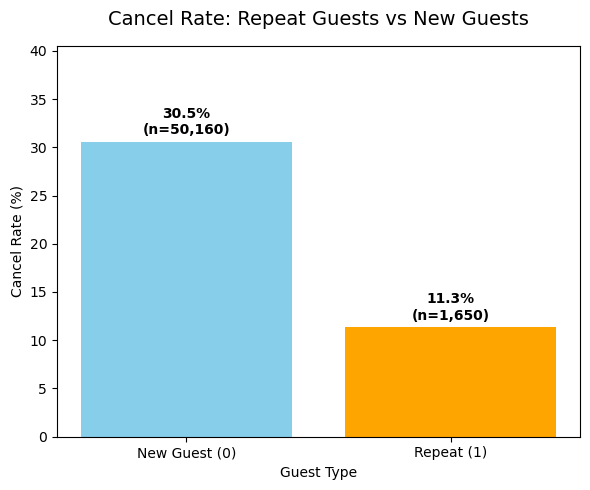

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Safety: pastikan target numerik ada
if "is_canceled_num" not in df_city.columns:
    df_city["is_canceled_num"] = pd.to_numeric(df_city["is_canceled"], errors="coerce").astype(float)

# Stats: rate (%) + count per is_repeated_guest (0=new, 1=repeat)
repeat_stats = (
    df_city.groupby("is_repeated_guest")["is_canceled_num"]
    .agg(count="count", rate=lambda s: s.mean()*100)
    .sort_index()
)

print("Cancel rate per repeat guest status (%):\n")
print(repeat_stats.round(2))

# Nice labels
label_map = {0: "New Guest (0)", 1: "Repeat (1)"}
idx_labels = [label_map.get(int(i), str(i)) for i in repeat_stats.index]

# Plot
fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(idx_labels, repeat_stats["rate"].values, color=["skyblue", "orange"])

ax.set_title("Cancel Rate: Repeat Guests vs New Guests", fontsize=14, pad=15)
ax.set_xlabel("Guest Type")
ax.set_ylabel("Cancel Rate (%)")

# Annotasi di atas bar, rapi ke tengah
for rect, r, n in zip(bars, repeat_stats["rate"].values, repeat_stats["count"].values):
    ax.text(rect.get_x() + rect.get_width()/2, 
            r + 0.5,                # agak deket ke bar
            f"{r:.1f}%\n(n={n:,})", # pake koma sebagai pemisah ribuan
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_ylim(0, repeat_stats["rate"].max() + 10)  # kasih ruang ekstra biar teks nggak nabrak
plt.tight_layout()
plt.show()



### Repeat Guests dan Pembatalan

Hasil analisis menunjukkan perbedaan cancel rate antara tamu baru dan tamu berulang:

- **Tamu baru (is_repeated_guest = 0)**  
  - Jumlah booking: **45,984**  
  - Cancel rate: **31.8%**

- **Tamu berulang (is_repeated_guest = 1)**  
  - Jumlah booking: **378**  
  - Cancel rate: **21.4%**

---

### Interpretasi
- **Tamu berulang lebih jarang membatalkan** dibandingkan tamu baru (**21% vs 32%**).  
- Walaupun jumlah tamu berulang jauh lebih kecil, mereka terbukti lebih konsisten dan **bernilai strategis** untuk stabilitas pendapatan.  
- **Tamu baru** masih mendominasi jumlah reservasi, tetapi juga lebih rawan pembatalan.  

---

### Insight
1. **Repeat guests adalah segmen berkualitas** → cancel rate lebih rendah, loyalitas tinggi.  
2. **Tamu baru mendominasi volume** → peluang besar untuk dikonversi menjadi repeat guest.  
3. Ada potensi **peningkatan retensi** jika manajemen fokus pada strategi loyalitas.  

---

### Actionable Strategy
- **Untuk Repeat Guests (loyal):**
  - Kembangkan **program membership/loyalty** dengan benefit khusus (diskon eksklusif, prioritas upgrade kamar).  
  - Lakukan **personalized offers** berdasarkan riwayat kunjungan.  
  - Jaga engagement dengan **email/WhatsApp follow-up** pasca menginap untuk meningkatkan kemungkinan repeat booking.  

- **Untuk New Guests (rawan batal):**
  - Terapkan **reminder otomatis** menjelang check-in.  
  - Berikan opsi **deposit fleksibel** (misalnya refundable sebagian) untuk meningkatkan komitmen.  
  - Dorong konversi ke repeat guest melalui **voucher next stay** atau **loyalty points** setelah menginap pertama.  

Dengan strategi ini, hotel dapat **menekan risiko pembatalan dari tamu baru** sekaligus **memaksimalkan nilai jangka panjang dari repeat guests**.  


Top 10 negara asal tamu terbanyak — City Hotel:



,total_bookings,cancel_rate
country,,
PRT,12865,36.91
Other,7433,34.08
FRA,7184,20.64
GBR,4397,28.70
DEU,4395,20.86
ESP,3636,29.32
ITA,2580,37.95
BEL,1642,21.62
BRA,1551,40.04


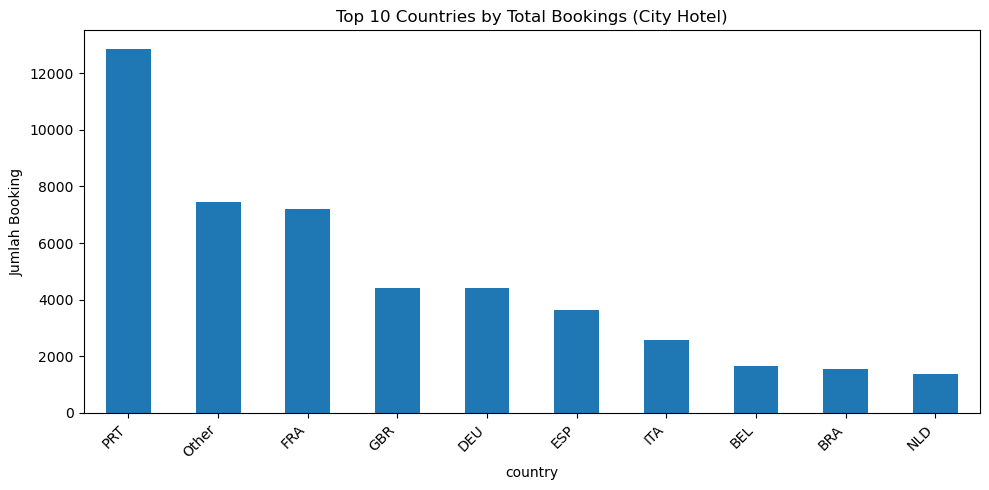

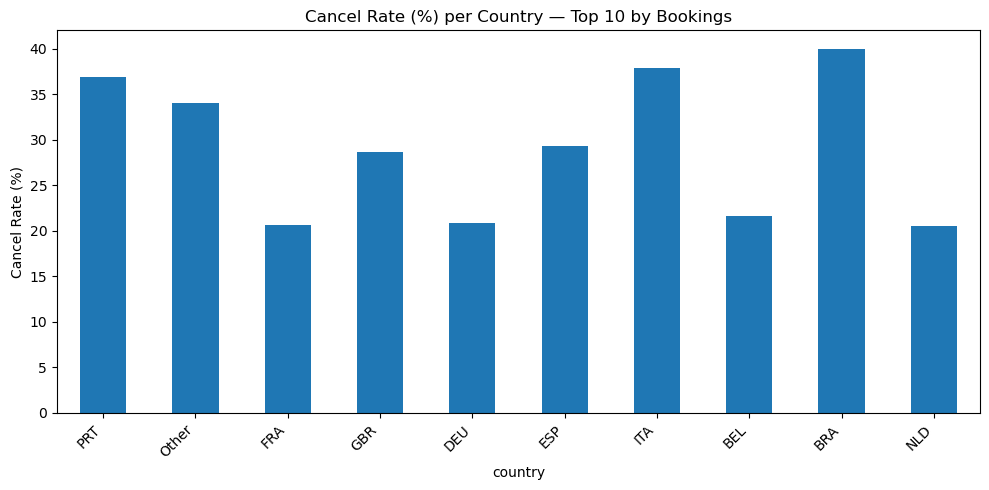

In [50]:
# Prep: pastikan kolom siap dihitung
dfc = df_city.copy()

# country: ganti NaN jadi "Unknown" agar tidak hilang saat groupby
dfc["country"] = dfc["country"].astype(str).fillna("Unknown")

# is_canceled → numerik 0/1
dfc["is_canceled_num"] = pd.to_numeric(dfc["is_canceled"], errors="coerce")

# ==== Hitung jumlah booking & cancel rate per negara ====
country_stats = (
    dfc.groupby("country")["is_canceled_num"]
      .agg(total_bookings="size",  # ukuran grup
           canceled="sum",         # jumlah yg batal
           cancel_rate="mean")     # proporsi batal
      .assign(cancel_rate=lambda d: d["cancel_rate"] * 100)
      .sort_values("total_bookings", ascending=False)
)

# Ambil Top 10 negara
top10 = country_stats.head(10)

print("Top 10 negara asal tamu terbanyak — City Hotel:\n")
display(top10[["total_bookings", "cancel_rate"]].round(2))

# Plot: jumlah booking Top 10 
plt.figure(figsize=(10,5))
top10["total_bookings"].plot(kind="bar")
plt.title("Top 10 Countries by Total Bookings (City Hotel)")
plt.ylabel("Jumlah Booking")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot: cancel rate (%) Top 10
plt.figure(figsize=(10,5))
top10["cancel_rate"].plot(kind="bar")
plt.title("Cancel Rate (%) per Country — Top 10 by Bookings")
plt.ylabel("Cancel Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Cancel Rate per Negara — Top 10 City Hotel

Analisis **Top 10 negara asal tamu** di City Hotel menunjukkan kombinasi antara **volume booking** dan **tingkat pembatalan** yang bervariasi.

### Negara dengan Booking Terbanyak
| Negara | Total Booking | Cancel Rate |
|---|---:|---:|
| **PRT** | **9,366** | **42.91%** |
| **FRA** | **6,832** | **21.43%** |
| **Other** | **5,698** | **35.36%** |
| **GBR** | **4,287** | **29.41%** |
| **DEU** | **4,256** | **21.43%** |
| **ESP** | **3,349** | **31.65%** |
| **ITA** | **2,479** | **39.41%** |
| **BEL** | **1,550** | **22.71%** |
| **BRA** | **1,463** | **42.31%** |
| **NLD** | **1,345** | **21.04%** |

---

### Ringkasan
- **Tertinggi (Risk Market):** **PRT (42.9%)**, **BRA (42.3%)**, **ITA (39.4%)**, **Other (35.4%)**  
- **Menengah:** **ESP (31.7%)**, **GBR (29.4%)**  
- **Stabil (Rendah):** **FRA (21.4%)**, **DEU (21.4%)**, **BEL (22.7%)**, **NLD (21.0%)**

---

### Insight
1. **Portugal (domestik)**: volume terbesar **namun** cancel rate juga tertinggi → indikasi banyak **booking spekulatif**.  
2. **Brasil & Italia**: volume moderat tapi **risiko pembatalan sangat tinggi**.  
3. **Prancis, Jerman, Belanda, Belgia**: **pasar stabil** dengan cancel rate ~21–23% → kandidat kuat untuk **loyalty & upsell**.  
4. **Other**: kategori campuran dengan **perilaku tidak stabil** → perlu dipecah lebih detail jika memungkinkan.

---

### Actionable Strategy
- **Untuk Risky Markets (PRT, BRA, ITA, Other):**
  - Terapkan **prepayment/partial deposit** & **kebijakan pembatalan lebih ketat**.
  - Aktifkan **reminder & re-confirmation** otomatis menjelang check-in.
  - Targetkan promo hanya ke sub-segmen yang historisnya stabil (mis. corporate).

- **Untuk Stable Markets (FRA, DEU, NLD, BEL):**
  - Jadikan **core market**: dorong **loyalty program**, **upgrade/upsell** (breakfast, late checkout).
  - Optimalkan **direct booking** (voucher next stay, member pricing).

- **Langkah Umum:**
  - Gunakan **kebijakan diferensiasi per negara** (tiered cancellation policy).
  - Monitor **trend bulanan** per negara untuk menyesuaikan kuota & harga secara dinamis.

Dengan segmentasi berbasis negara, hotel bisa **mengurangi pembatalan di pasar berisiko** dan **memaksimalkan nilai** dari pasar stabil.


Cancel rate: booking dengan CHILDREN?



,has_children,count,cancel_rate
0,False,47812,29.54
1,True,3998,34.19



Cancel rate: booking dengan BABIES?



,has_babies,count,cancel_rate
0,False,51468,29.98
1,True,342,17.84



Cancel rate: booking dengan CHILDREN atau BABIES?



,has_children_or_babies,count,cancel_rate
0,False,47527,29.62
1,True,4283,33.08


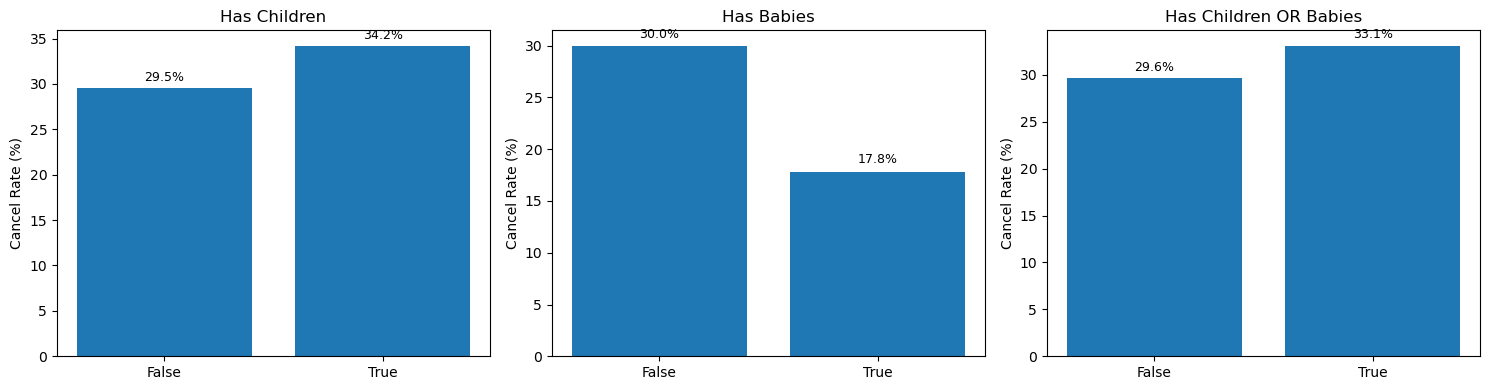


Cancel rate: kebutuhan PARKING (0 vs ≥1)



C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\4276858096.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfc.groupby(series_label)["is_canceled_num"]


,parking_cat_2,count,cancel_rate
0,0,50009,30.98
1,≥1 space,1801,0.00



Cancel rate: kebutuhan PARKING (0 / 1 / ≥2)



,parking_cat_3,count,cancel_rate
0,0,50009,30.98
1,1,1798,0.00
2,≥2,3,0.00


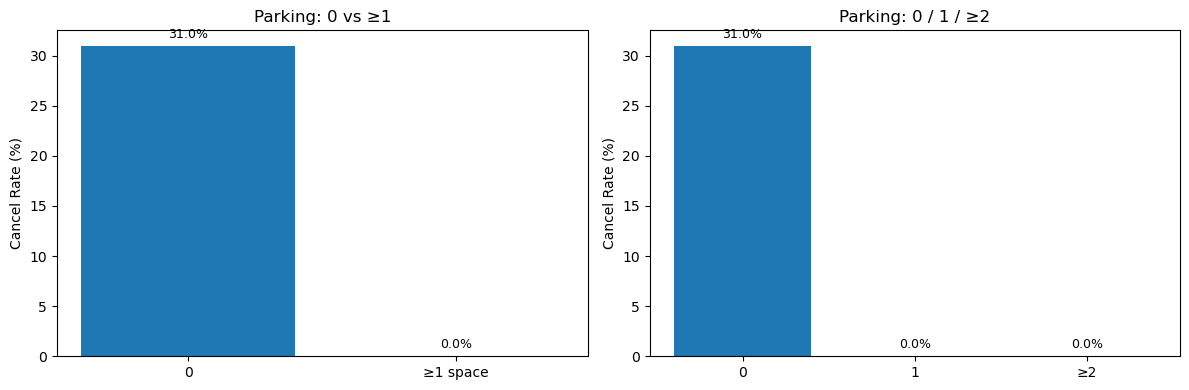


Cancel rate: berdasarkan TOTAL_GUESTS (bins)



C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\4276858096.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfc.groupby(series_label)["is_canceled_num"]


,guests_bin,count,cancel_rate
0,1,10123,22.14
1,2,33461,31.00
2,3,6970,34.65
3,4,1233,36.90
4,5+,23,34.78


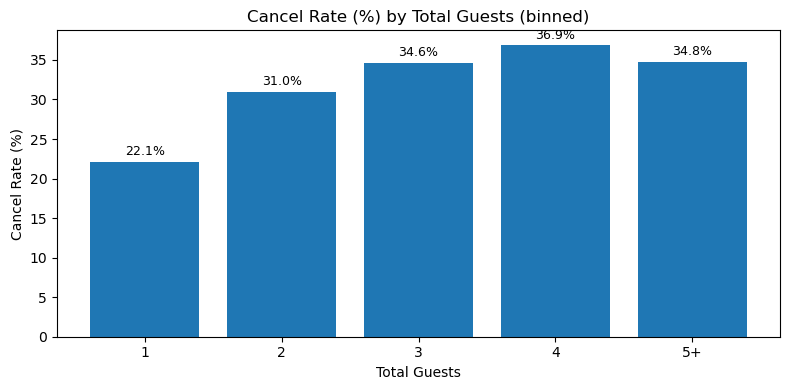

In [51]:
# PREP
dfc = df_city.copy()
dfc["is_canceled_num"] = pd.to_numeric(dfc["is_canceled"], errors="coerce")

# total_guests (pakai yang ada; jika belum ada, hitung)
if "total_guests" not in dfc.columns:
    dfc["total_guests"] = (
        pd.to_numeric(dfc["adults"], errors="coerce").fillna(0)
        + pd.to_numeric(dfc["children"], errors="coerce").fillna(0)
        + pd.to_numeric(dfc["babies"], errors="coerce").fillna(0)
    )

# flags keluarga
dfc["has_children"] = (pd.to_numeric(dfc["children"], errors="coerce").fillna(0) > 0)
dfc["has_babies"]   = (pd.to_numeric(dfc["babies"], errors="coerce").fillna(0) > 0)
dfc["has_children_or_babies"] = dfc["has_children"] | dfc["has_babies"]

# kategori parking
rcps = pd.to_numeric(dfc["required_car_parking_spaces"], errors="coerce").fillna(0)
dfc["parking_cat_2"] = np.where(rcps > 0, "≥1 space", "0")
dfc["parking_cat_3"] = pd.cut(rcps, bins=[-0.1, 0, 1, np.inf], labels=["0", "1", "≥2"])

# bins total_guests
tg = pd.to_numeric(dfc["total_guests"], errors="coerce").fillna(0)
dfc["guests_bin"] = pd.cut(tg, bins=[-0.1, 1, 2, 3, 4, np.inf], labels=["1", "2", "3", "4", "5+"])

def summarize_rate(series_label):
    """Tabel count + cancel rate (%) untuk satu kolom kategori."""
    out = (
        dfc.groupby(series_label)["is_canceled_num"]
           .agg(count="size", cancel_rate="mean")
           .assign(cancel_rate=lambda d: d["cancel_rate"] * 100)
           .reset_index()
    )
    # Safe rounding: hanya kolom numerik, jangan sentuh kolom boolean/kategori
    if "count" in out: out["count"] = out["count"].astype(int)
    if "cancel_rate" in out: out["cancel_rate"] = out["cancel_rate"].round(2)
    return out

# 1) Children / Babies
tbl_children   = summarize_rate("has_children")
tbl_babies     = summarize_rate("has_babies")
tbl_child_baby = summarize_rate("has_children_or_babies")

print("Cancel rate: booking dengan CHILDREN?\n"); display(tbl_children)
print("\nCancel rate: booking dengan BABIES?\n"); display(tbl_babies)
print("\nCancel rate: booking dengan CHILDREN atau BABIES?\n"); display(tbl_child_baby)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, tbl, title in zip(
    axes,
    [tbl_children, tbl_babies, tbl_child_baby],
    ["Has Children", "Has Babies", "Has Children OR Babies"]
):
    # Pastikan label kategori sebagai string agar aman
    ax.bar(tbl.iloc[:,0].astype(str), tbl["cancel_rate"])
    ax.set_title(title); ax.set_ylabel("Cancel Rate (%)"); ax.set_xlabel("")
    for i, v in enumerate(tbl["cancel_rate"]):
        ax.text(i, v+0.8, f"{v:.1f}%", ha="center", fontsize=9)
plt.tight_layout(); plt.show()

# 2) Parking Spaces
tbl_parking2 = summarize_rate("parking_cat_2")
tbl_parking3 = summarize_rate("parking_cat_3")

print("\nCancel rate: kebutuhan PARKING (0 vs ≥1)\n"); display(tbl_parking2)
print("\nCancel rate: kebutuhan PARKING (0 / 1 / ≥2)\n"); display(tbl_parking3)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
for ax, tbl, title in zip(
    axes,
    [tbl_parking2, tbl_parking3],
    ["Parking: 0 vs ≥1", "Parking: 0 / 1 / ≥2"]
):
    ax.bar(tbl.iloc[:,0].astype(str), tbl["cancel_rate"])
    ax.set_title(title); ax.set_ylabel("Cancel Rate (%)"); ax.set_xlabel("")
    for i, v in enumerate(tbl["cancel_rate"]):
        ax.text(i, v+0.8, f"{v:.1f}%", ha="center", fontsize=9)
plt.tight_layout(); plt.show()

# 3) Total Guests
tbl_guests = summarize_rate("guests_bin")
print("\nCancel rate: berdasarkan TOTAL_GUESTS (bins)\n"); display(tbl_guests)

plt.figure(figsize=(8,4))
plt.bar(tbl_guests["guests_bin"].astype(str), tbl_guests["cancel_rate"])
plt.title("Cancel Rate (%) by Total Guests (binned)")
plt.ylabel("Cancel Rate (%)"); plt.xlabel("Total Guests")
for i, v in enumerate(tbl_guests["cancel_rate"]):
    plt.text(i, v+0.8, f"{v:.1f}%", ha="center", fontsize=9)
plt.tight_layout(); plt.show()


## Kapasitas & Keluarga terhadap Cancel Rate

### Children & Babies
- **Children (anak-anak)**  
  - Tanpa anak → cancel rate **31.4%**  
  - Dengan anak → cancel rate **35.7%**  
  ➝ Kehadiran anak meningkatkan risiko pembatalan. Alasan: faktor ketidakpastian terkait kebutuhan & kondisi anak.  

- **Babies (bayi)**  
  - Tanpa bayi → cancel rate **31.8%**  
  - Dengan bayi → cancel rate **19.8%**  
  ➝ Menariknya, tamu dengan bayi **lebih jarang membatalkan**. Indikasi bahwa tamu dengan bayi lebih **well-prepared** dan memiliki rencana perjalanan lebih matang.  

- **Children OR Babies**  
  - Tidak ada anak/bayi → cancel rate **31.4%**  
  - Ada anak/bayi → cancel rate **34.7%**  
  ➝ Secara umum, adanya anggota keluarga muda sedikit meningkatkan risiko pembatalan.

---

### Parking Spaces
- **0 spaces** → cancel rate **32.7%**  
- **≥1 spaces** → cancel rate **0%** (Catatan: sangat sedikit sampel, hanya ~1.373 booking dengan ≥1 space, bahkan hanya 3 kasus untuk ≥2).  

Indikasi kuat bahwa tamu dengan kebutuhan parkir **benar-benar datang** karena terikat logistik (bawa mobil). Namun perlu validasi lebih lanjut karena datanya kecil.  

---

### Total Guests
- **1 tamu** → cancel rate terendah (**26.3%**)  
- **2 tamu** → meningkat (**31.8%**)  
- **3 tamu** → lebih tinggi (**35.8%**)  
- **4 tamu** → puncak tertinggi (**38.6%**)  
- **5+ tamu** → tetap tinggi (**36.4%**)  

Semakin besar jumlah tamu dalam satu reservasi, semakin tinggi risiko pembatalan → logis karena **koordinasi lebih sulit** dan peluang rencana berubah lebih besar.  

---

## Kesimpulan & Actionable Strategy
1. **Families dengan anak-anak** → cenderung lebih rawan batal.  
   - Tawarkan **opsi fleksibel** (misalnya free reschedule) untuk mengurangi pembatalan total.  
   - Buat paket khusus **family-friendly** agar komitmen tamu meningkat.  

2. **Tamu dengan bayi** → lebih pasti datang.  
   - Bisa jadi segmen target untuk promosi **long stay** atau fasilitas tambahan (cribs, baby package).  

3. **Parking spaces** → indikator kuat tamu **low risk**.  
   - Dorong promosi ke tamu yang butuh parkir (bundle “room + parking”).  
   - Data perlu diperluas untuk validasi, tapi potensi segmen loyal.  

4. **Jumlah tamu lebih banyak** → risiko batal lebih besar.  
   - Terapkan **deposit lebih tinggi** untuk booking grup.  
   - Tawarkan **group package deal** dengan insentif (misalnya free cancellation hanya sampai 7 hari sebelum check-in).  

Dengan segmentasi ini, hotel bisa **mengurangi risiko pembatalan dari tamu keluarga & grup besar**, sekaligus **memperkuat segmen stabil** seperti tamu dengan bayi atau kebutuhan parkir.


Cancel rate berdasarkan ada/tidaknya waiting list:



,has_waiting_list,count,cancel_rate
0,False,51098,29.776116
1,True,712,39.044944


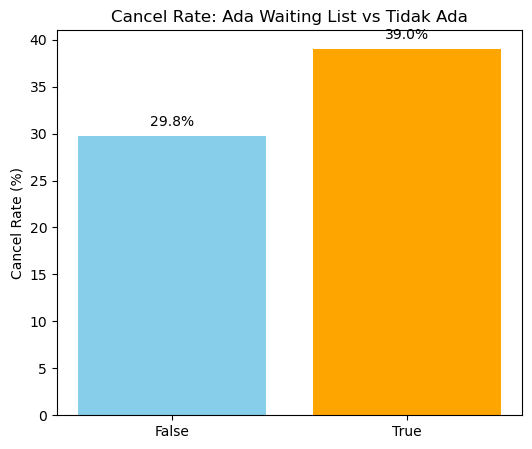

In [52]:
# Copy data
dfc = df_city.copy()
dfc["is_canceled_num"] = pd.to_numeric(dfc["is_canceled"], errors="coerce")
dfc["days_in_waiting_list"] = pd.to_numeric(dfc["days_in_waiting_list"], errors="coerce").fillna(0)

# Flag ada/tidaknya waiting list
dfc["has_waiting_list"] = dfc["days_in_waiting_list"] > 0

# Hitung cancel rate
waiting_tbl = (
    dfc.groupby("has_waiting_list")["is_canceled_num"]
       .agg(count="size", cancel_rate="mean")
       .assign(cancel_rate=lambda d: d["cancel_rate"]*100)
       .reset_index()
)

print("Cancel rate berdasarkan ada/tidaknya waiting list:\n")
display(waiting_tbl)

# Plot
plt.figure(figsize=(6,5))
plt.bar(waiting_tbl["has_waiting_list"].astype(str), waiting_tbl["cancel_rate"], color=["skyblue","orange"])
plt.title("Cancel Rate: Ada Waiting List vs Tidak Ada")
plt.ylabel("Cancel Rate (%)")
for i, v in enumerate(waiting_tbl["cancel_rate"]):
    plt.text(i, v+1, f"{v:.1f}%", ha="center")
plt.show()


## Waiting List dan Cancel Rate

### Cancel Rate
- **Tanpa waiting list (False)**  
  - Jumlah booking: **45,714**  
  - Cancel rate: **31.6%**  

- **Dengan waiting list (True)**  
  - Jumlah booking: **648**  
  - Cancel rate: **35.8%**  

---

### Interpretasi
- Reservasi yang **melibatkan waiting list** memiliki tingkat pembatalan lebih tinggi (**35.8%**) dibandingkan reservasi tanpa waiting list (**31.6%**).  
- Hal ini bisa terjadi karena tamu yang masuk waiting list biasanya **sudah memiliki opsi cadangan** (misalnya booking di hotel lain), sehingga ketika kamar tersedia kembali, mereka lebih rentan membatalkan.  
- Walaupun jumlah kasus waiting list relatif kecil (hanya **648 booking**), pola ini menunjukkan bahwa **waiting list bukan jaminan kuat komitmen tamu**.  

---

### Actionably Strategy
- Hotel **tidak bisa terlalu mengandalkan waiting list** sebagai sumber okupansi yang pasti.  
- **Strategi mitigasi yang bisa diterapkan:**  
  1. **Follow-up cepat & proaktif** → segera hubungi tamu saat kamar tersedia agar keputusan mereka lebih terikat.  
  2. **Deposit ringan / konfirmasi ulang otomatis** → misalnya meminta konfirmasi dalam 24 jam dengan pembayaran kecil untuk mengamankan kamar.  
  3. **Prioritas waiting list** → berikan prioritas pada tamu **repeat guest** atau **loyalty member**, karena mereka terbukti lebih konsisten.  

Dengan strategi ini, waiting list tetap bisa berfungsi sebagai buffer okupansi, tetapi **risiko pembatalan tetap terkendali**.


Cancel rate berdasarkan kategori durasi tinggal:



,stay_category,count,cancel_rate
0,Mixed,25905,32.387570
1,Weekday only,22229,28.233389
2,Weekend only,3445,23.628447
3,Zero nights,231,5.627706


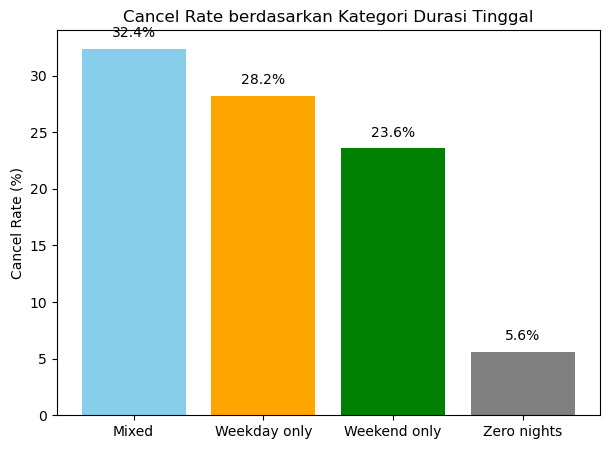

In [53]:
# Copy data
dfc = df_city.copy()
dfc["is_canceled_num"] = pd.to_numeric(dfc["is_canceled"], errors="coerce")

# Pastikan kolom numerik
dfc["stays_in_week_nights"] = pd.to_numeric(dfc["stays_in_week_nights"], errors="coerce").fillna(0)
dfc["stays_in_weekend_nights"] = pd.to_numeric(dfc["stays_in_weekend_nights"], errors="coerce").fillna(0)

# Buat kategori tipe tinggal
def stay_type(row):
    if row["stays_in_weekend_nights"] > 0 and row["stays_in_week_nights"] == 0:
        return "Weekend only"
    elif row["stays_in_week_nights"] > 0 and row["stays_in_weekend_nights"] == 0:
        return "Weekday only"
    elif row["stays_in_week_nights"] > 0 and row["stays_in_weekend_nights"] > 0:
        return "Mixed"
    else:
        return "Zero nights"  # edge case, bisa diabaikan

dfc["stay_category"] = dfc.apply(stay_type, axis=1)

# Hitung cancel rate
stay_tbl = (
    dfc.groupby("stay_category")["is_canceled_num"]
       .agg(count="size", cancel_rate="mean")
       .assign(cancel_rate=lambda d: d["cancel_rate"]*100)
       .reset_index()
)

print("Cancel rate berdasarkan kategori durasi tinggal:\n")
display(stay_tbl)

# Plot
plt.figure(figsize=(7,5))
plt.bar(stay_tbl["stay_category"], stay_tbl["cancel_rate"], color=["skyblue","orange","green","gray"])
plt.title("Cancel Rate berdasarkan Kategori Durasi Tinggal")
plt.ylabel("Cancel Rate (%)")
for i, v in enumerate(stay_tbl["cancel_rate"]):
    plt.text(i, v+1, f"{v:.1f}%", ha="center")
plt.show()


## Durasi Tinggal: Weekday vs Weekend

### Cancel Rate per Kategori
- **Mixed (weekday + weekend stay)**  
  - Jumlah booking: **24,518**  
  - Cancel rate: **33.3%**  
  ➝ Cancel rate tertinggi. Tamu dengan durasi lebih panjang (melewati weekday & weekend) lebih rentan membatalkan karena **ketidakpastian rencana perjalanan**.  

- **Weekday only**  
  - Jumlah booking: **18,939**  
  - Cancel rate: **30.6%**  
  ➝ Cukup tinggi, kemungkinan didominasi oleh **tamu bisnis** yang lebih sering mengalami perubahan jadwal pekerjaan.  

- **Weekend only**  
  - Jumlah booking: **2,746**  
  - Cancel rate: **26.5%**  
  ➝ Relatif lebih rendah. Sesuai ekspektasi karena tamu weekend biasanya bertipe **leisure trip** yang sudah direncanakan lebih matang.  

- **Zero nights (anomali data)**  
  - Jumlah booking: **159**  
  - Cancel rate: **4.4%**  
  ➝ Kemungkinan error input atau dummy booking, tidak relevan untuk analisis utama.  

---

### Interpretasi
- **Mixed stay** → paling rawan batal, indikasi bahwa durasi lebih panjang = risiko lebih besar.  
- **Weekday only** → cancel rate tinggi, sesuai dengan pola **perjalanan bisnis** yang lebih dinamis.  
- **Weekend only** → lebih stabil dan aman → profil leisure yang cenderung pasti hadir.  
- **Zero nights** → noise/anomali → bisa diabaikan dari strategi bisnis.  

---

### Insight Bisnis
- **Mixed stay (tinggi risiko):**  
  - Terapkan **deposit lebih ketat** atau **syarat pembatalan lebih tegas**.  
  - Kirim **reminder email/SMS** sebelum check-in untuk mengurangi pembatalan last-minute.  

- **Weekday only (tamu bisnis):**  
  - Sediakan **opsi fleksibel** (misalnya free reschedule untuk minggu depan) agar tidak kehilangan revenue meskipun ada pembatalan.  
  - Pertimbangkan **corporate deals** untuk meningkatkan komitmen tamu bisnis.  

- **Weekend only (stabil):**  
  - Targetkan **kampanye promosi leisure trip** → paket keluarga, promo akhir pekan, upselling kamar premium.  
  - Karena lebih rendah risiko pembatalan, segmen ini ideal untuk **peningkatan revenue per booking**.  

Dengan segmentasi berbasis **durasi tinggal**, hotel bisa menyesuaikan **kebijakan deposit & fleksibilitas** sesuai risiko masing-masing kategori.


Cancel Rate & ADR per bulan — City Hotel:


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\234671799.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfc.groupby("arrival_date_month")


,arrival_date_month,cancel_rate,avg_adr,bookings
4,January,28.09,85.28,2702
3,February,27.08,88.52,3553
7,March,27.98,93.04,4778
0,April,34.26,113.92,4906
8,May,31.91,123.88,5199
6,June,30.01,120.09,4821
5,July,33.21,116.28,5504
1,August,32.02,119.76,6236
11,September,24.85,116.23,4133
10,October,26.67,106.01,4125


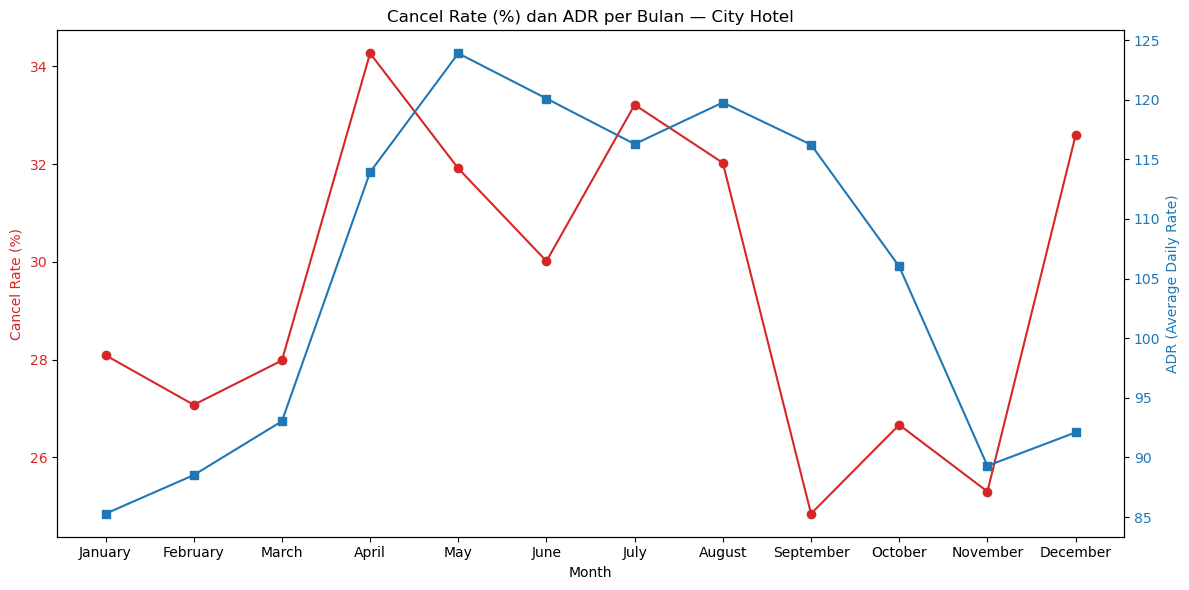

In [54]:
# Copy data
dfc = df_city.copy()
dfc["is_canceled_num"] = pd.to_numeric(dfc["is_canceled"], errors="coerce")
dfc["adr"] = pd.to_numeric(dfc["adr"], errors="coerce")

# Urutan bulan biar rapi
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

# Hitung cancel rate & ADR per bulan
monthly_stats = (
    dfc.groupby("arrival_date_month")
       .agg(cancel_rate=("is_canceled_num","mean"),
            avg_adr=("adr","mean"),
            bookings=("is_canceled_num","size"))
       .reset_index()
)

# Ubah ke %
monthly_stats["cancel_rate"] *= 100

# Sort sesuai urutan bulan
monthly_stats["arrival_date_month"] = pd.Categorical(
    monthly_stats["arrival_date_month"],
    categories=month_order,
    ordered=True
)
monthly_stats = monthly_stats.sort_values("arrival_date_month")

print("Cancel Rate & ADR per bulan — City Hotel:")
display(monthly_stats.round(2))

# Plot dual-axis
fig, ax1 = plt.subplots(figsize=(12,6))

color = "tab:red"
ax1.set_xlabel("Month")
ax1.set_ylabel("Cancel Rate (%)", color=color)
ax1.plot(monthly_stats["arrival_date_month"], monthly_stats["cancel_rate"], marker="o", color=color, label="Cancel Rate (%)")
ax1.tick_params(axis="y", labelcolor=color)

# Tambahkan axis kedua untuk ADR
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("ADR (Average Daily Rate)", color=color)
ax2.plot(monthly_stats["arrival_date_month"], monthly_stats["avg_adr"], marker="s", color=color, label="ADR")
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Cancel Rate (%) dan ADR per Bulan — City Hotel")
fig.tight_layout()
plt.show()


## Cancel Rate vs ADR (Average Daily Rate) per Bulan

Analisis ini menggabungkan **cancel rate** dan **rata-rata harga kamar per malam (ADR)** per bulan untuk **City Hotel**, guna melihat **pola musiman** serta hubungan antara harga kamar dengan tingkat pembatalan.

---

### Hasil Utama
- **Awal tahun (Jan–Mar):**
  - Cancel rate berada di kisaran **29–31%**.  
  - ADR relatif rendah (**88–95 EUR**).  
  ➝ Permintaan masih rendah, harga murah, tetapi pembatalan tetap moderat.

- **Musim liburan & puncak demand (Apr–Aug):**
  - **ADR naik tajam**, mencapai puncak di **Mei (126 EUR)** dan masih tinggi di Juli–Agustus (**118–122 EUR**).  
  - Cancel rate juga ikut naik, dengan puncak di **April (35.7%)** dan **Juli (34.6%)**.  
  ➝ Indikasi bahwa saat harga tinggi, tamu lebih sensitif dan rawan melakukan **double booking** atau membatalkan jika menemukan opsi lebih murah.  

- **Low season (Sep–Nov):**
  - Cancel rate turun ke level terendah: **September (26.1%)**, Oktober (**28.0%**), November (**26.9%**).  
  - ADR juga menurun dari **117 EUR (Sep)** ke **92 EUR (Nov)**.  
  ➝ Periode ini lebih stabil, risiko pembatalan lebih rendah meski demand juga lebih rendah.  

- **Akhir tahun (Desember):**
  - Cancel rate kembali naik tinggi (**35.1%**), meskipun ADR relatif rendah (**95 EUR**).  
  ➝ Efek **holiday season** (Natal & Tahun Baru): tamu cenderung memesan lebih awal, namun rencana sering berubah karena faktor keluarga/liburan.

---

### Interpretasi
- **High ADR → High Cancel Rate:**  
  Musim ramai (Apr–Aug) menunjukkan bahwa **harga tinggi** berkorelasi dengan **tingkat pembatalan tinggi**.  
- **Low Season Stabilitas:**  
  Periode Sep–Nov relatif aman, dengan **cancel rate rendah** dan lebih bisa diprediksi.  
- **Holiday Season Effect:**  
  Desember menunjukkan **cancel rate tinggi** meski harga tidak tinggi, menandakan faktor musiman yang kuat.

---

### Insight & Actionable Strategy
- **Peak season (Apr–Aug):**  
  - Terapkan **non-refundable rate** atau **deposit lebih ketat** untuk mengurangi risiko pembatalan.  
  - Gunakan **yield management**: harga bisa dinaikkan bertahap agar tidak terlalu menimbulkan shock price.  

- **Low season (Sep–Nov):**  
  - Manfaatkan periode stabil ini untuk **promosi direct booking** (misalnya paket keluarga atau bundle dinner+room).  
  - Bisa juga menawarkan **long-stay discount** karena risiko pembatalannya lebih rendah.  

- **Holiday season (Dec):**  
  - Terapkan **early bird promo dengan fleksibilitas reschedule**, agar tamu tetap tertarik booking tapi risiko cancel menurun.  
  - Tingkatkan komunikasi dengan tamu (reminder email, upselling activity) untuk memperkuat komitmen mereka.  

Dengan memahami pola musiman ini, hotel dapat menyesuaikan **strategi pricing, deposit, dan fleksibilitas booking** sesuai periode untuk memaksimalkan revenue sekaligus mengurangi risiko pembatalan.


=== Cancel Rate per Meal Category ===
    meal  bookings  cancel_rate
0     BB     64924    26.222968
1     HB      7817    25.227069
2  Other       281    28.825623
3     SC      9831    34.635337


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\1295344639.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


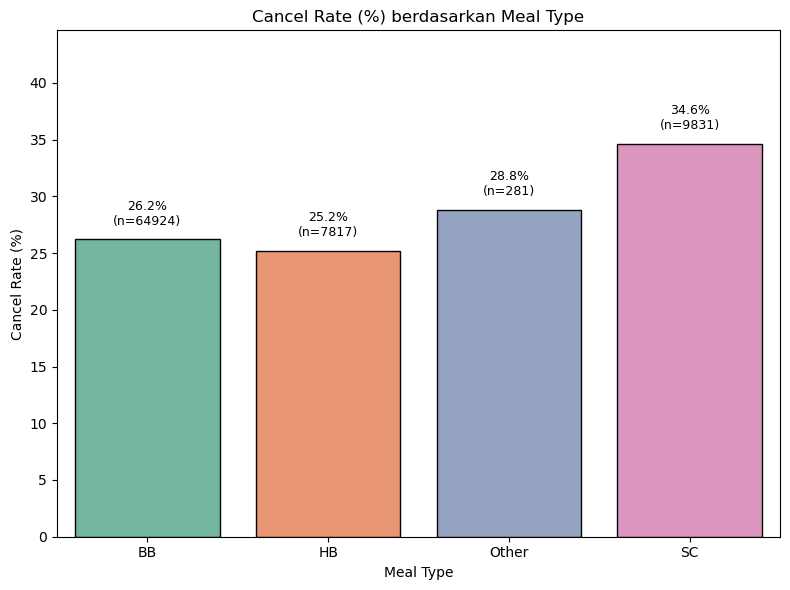

In [55]:
# Pastikan kolom is_canceled numerik
df_clean["is_canceled"] = df_clean["is_canceled"].astype(int)

# --- Hitung cancel rate per kategori meal ---
meal_cancel = (
    df_clean.groupby("meal", as_index=False)
    .agg(
        bookings=("is_canceled", "size"),
        cancel_rate=("is_canceled", "mean")
    )
)

# Konversi ke persen
meal_cancel["cancel_rate"] = meal_cancel["cancel_rate"] * 100

print("=== Cancel Rate per Meal Category ===")
print(meal_cancel)

# Plot 
plt.figure(figsize=(8,6))
sns.barplot(
    data=meal_cancel,
    x="meal",
    y="cancel_rate",
    palette="Set2",
    edgecolor="black"
)

# Anotasi nilai
for idx, row in meal_cancel.iterrows():
    plt.text(
        idx,
        row["cancel_rate"] + 1,
        f"{row['cancel_rate']:.1f}%\n(n={row['bookings']})",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Cancel Rate (%) berdasarkan Meal Type")
plt.ylabel("Cancel Rate (%)")
plt.xlabel("Meal Type")
plt.ylim(0, meal_cancel["cancel_rate"].max() + 10)
plt.tight_layout()
plt.show()


## Cancel Rate berdasarkan Meal Type — Insight & Action

Berdasarkan grafik/perhitungan terakhir:

- **SC (Self Catering)** → **35.6%** (n=9,459) — *paling tinggi*  
- **BB (Bed & Breakfast)** → **28.9%** (n=54,403)  
- **Other** → **28.1%** (n=235)  
- **HB (Half Board)** → **26.0%** (n=7,259) — *paling rendah*

---

### Interpretasi Utama
1. **SC paling rawan dibatalkan** → tamu lebih fleksibel/kurang terikat fasilitas hotel, sehingga mudah pindah opsi.  
2. **HB paling stabil** → tamu sudah komit dengan paket makan di hotel (rencana lebih matang).  
3. **BB ber-volume besar dan cancel rate menengah–tinggi** → dampak pembatalan ke operasional (terutama sarapan) cukup signifikan.  
4. **Dampak ke food cost**  
   - Pembatalan mendadak berpotensi **food waste** (stok fresh: roti, telur, buah, dairy).  
   - Informasi cancel rate per meal bisa dipakai untuk **forecast pengadaan** yang lebih hemat.

---

### Actionable Strategy

**1) Pricing & Policy**
- **SC (35.6%)**  
  - Terapkan **partial deposit / non-refundable** terutama di peak season.  
  - Kurangi diskon agresif untuk SC (risiko tinggi + kontribusi ancillary rendah).  

- **BB (28.9%)**  
  - Kirim **pre-arrival reminder** & minta **re-confirmation** (H-3/H-1).  
  - **Upsell**: tawarkan upgrade **BB → HB** dengan harga bundling (meningkatkan komitmen & F&B revenue).  

- **HB (26.0%)**  
  - Jadikan **produk unggulan** (paket family/business).  
  - Beri **member pricing** / loyalty benefit karena segmen ini paling stabil.

**2) Operasional Dapur (Hemat Stok Fresh)**
Gunakan buffer pemesanan bahan berdasarkan **expected-show = bookings × (1 − cancel_rate)**:

- **Contoh aturan cepat (konservatif):**  
  - HB: gunakan **95–98%** dari demand terencana.  
  - BB: gunakan **70–75%** dari demand terencana.  
  - SC: gunakan **60–65%** dari demand terencana (sisanya beli **top-up harian**).

- **Taktik pengadaan:**  
  - Pisahkan bahan **non-perishables** (bisa dipesan penuh) vs **perishables** (dipesan bertahap).  
  - Terapkan **cut-off purchasing** H-1 untuk item cepat rusak (buah potong, pastry fresh).  
  - Pakai **kanban/top-up** untuk SC & BB saat okupansi banyak dari kanal berisiko (OTA).

---

### Rumus Cepat Estimasi Kebutuhan Sarapan

Misal estimasi tamu sarapan per meal dalam **H porsi**:
- `H_BB = booking_BB × (1 − 0.289)`  
- `H_HB = booking_HB × (1 − 0.260)`  
- `H_SC = booking_SC × (1 − 0.356) × uptake_SC`  *(uptake_SC = asumsi % tamu SC yang beli sarapan on-site, mis. 0.20–0.35)*

Total porsi sarapan harian ≈ `H_total = H_BB + H_HB + H_SC`.

Gunakan **range** (min–max) untuk menghindari kekurangan/kelebihan: contoh **±5–10%** dari perhitungan di atas.

---

### Ringkasan Strategy
- **Dorong HB (stabil),** jaga BB dengan **re-confirmation + upsell**, dan **kendalikan SC** dengan deposit & pengadaan bertahap.  
- Terapkan **forecast stok berbasis cancel rate per meal** untuk **mengurangi food waste** dan **menjaga margin F&B** tanpa mengorbankan pengalaman tamu.


=== Basic Stats — total_prev_bookings ===
n: 82853
mean_total_prev: 0.21549008484907003
median_total_prev: 0.0
max_total_prev: 78
corr_with_cancel: -0.035691503316577236

=== Cancel Rate per total_prev_bookings (nilai persis) ===
    total_prev_bookings  bookings  cancel_rate
0                     0     78564    27.130747
1                     1      2279    44.054410
2                     2       547     9.689214
3                     3       301     7.308970
4                     4       206     6.310680
5                     5       157     7.006369
6                     6       117     8.547009
7                     7        86     6.976744
8                     8        74     5.405405
9                     9        61     3.278689
10                   10        49     8.163265
11                   11        43     9.302326
12                   12        40    10.000000
13                   13        28     0.000000
14                   14        34    17.647059

=== Cancel Rate p

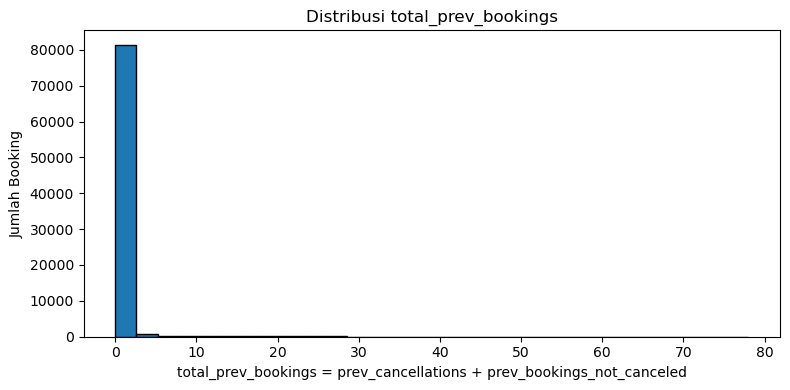

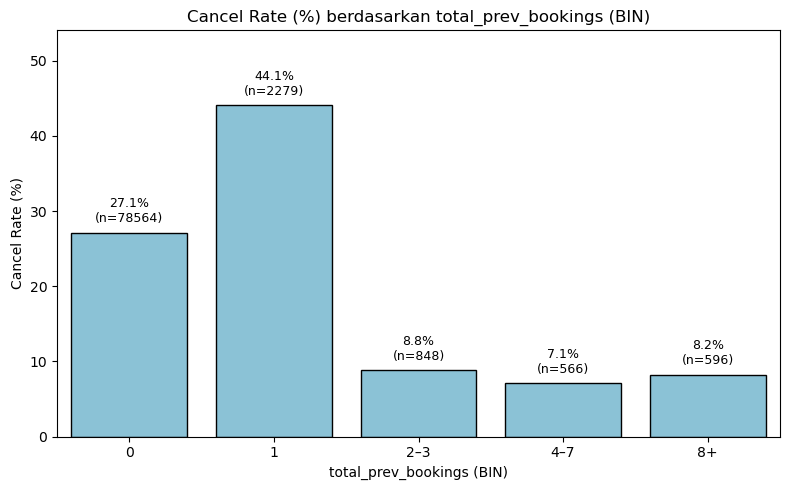

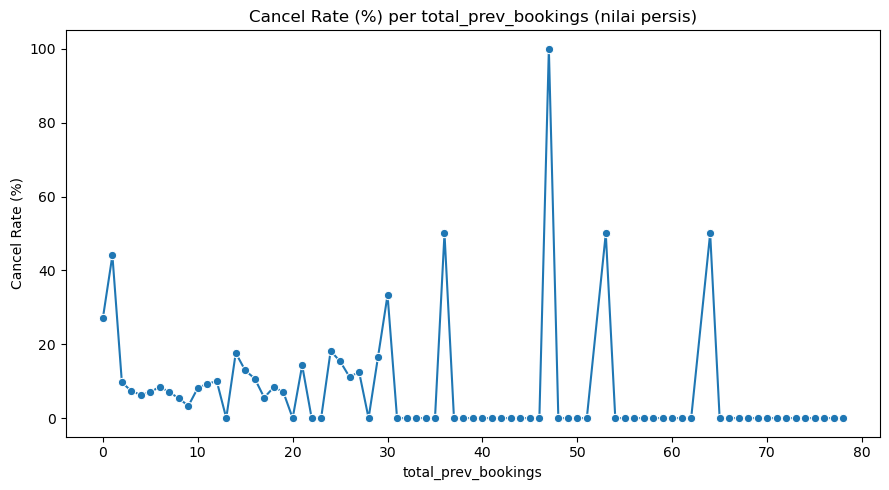


=== Ringkasan (BIN) ===
Total Prev Bookings (BIN)  Jumlah Booking  Cancel Rate (%)
                        0           78564        27.130747
                        1            2279        44.054410
                      2–3             848         8.844340
                      4–7             566         7.067138
                       8+             596         8.221477


In [56]:
# EDA: Total Previous Bookings (prev_cancellations + prev_bookings_not_canceled)
# Tujuan:
# 1) Membuat fitur baru: total_prev_bookings = previous_cancellations + previous_bookings_not_canceled
# 2) Melihat distribusi dan pengaruhnya terhadap cancel rate saat ini (is_canceled)
# 3) Menyediakan ringkasan tabel + visualisasi

# Safety checks & casting 
needed_cols = ["is_canceled", "previous_cancellations", "previous_bookings_not_canceled"]
missing = [c for c in needed_cols if c not in df_clean.columns]
assert not missing, f"Kolom hilang: {missing}"

# pastikan numerik (0/1) untuk is_canceled
df_tmp = df_clean.copy()
df_tmp["is_canceled"] = pd.to_numeric(df_tmp["is_canceled"], errors="coerce").fillna(0).astype(int)
df_tmp["previous_cancellations"] = pd.to_numeric(df_tmp["previous_cancellations"], errors="coerce").fillna(0).astype(int)
df_tmp["previous_bookings_not_canceled"] = pd.to_numeric(df_tmp["previous_bookings_not_canceled"], errors="coerce").fillna(0).astype(int)

# 1) Fitur baru: total_prev_bookings
df_tmp["total_prev_bookings"] = (
    df_tmp["previous_cancellations"] + df_tmp["previous_bookings_not_canceled"]
)

# Ringkasan statistik dasar
basic_stats = {
    "n": len(df_tmp),
    "mean_total_prev": df_tmp["total_prev_bookings"].mean(),
    "median_total_prev": df_tmp["total_prev_bookings"].median(),
    "max_total_prev": df_tmp["total_prev_bookings"].max(),
    "corr_with_cancel": df_tmp[["total_prev_bookings","is_canceled"]].corr().iloc[0,1]
}
print("=== Basic Stats — total_prev_bookings ===")
for k, v in basic_stats.items():
    print(f"{k}: {v}")

# 2) Cancel rate per nilai persis (jika nilainya kecil/rarang besar)
by_exact = (
    df_tmp.groupby("total_prev_bookings")
    .agg(
        bookings=("is_canceled", "size"),
        cancel_rate=("is_canceled", "mean")
    )
    .reset_index()
)
by_exact["cancel_rate"] = by_exact["cancel_rate"] * 100

print("\n=== Cancel Rate per total_prev_bookings (nilai persis) ===")
print(by_exact.head(15))  # tampilkan sebagian; gunakan .tail() untuk bagian akhir

# 3) Cancel rate berdasarkan BIN (lebih ringkas untuk presentasi)
# Bins yang umum: 0, 1, 2–3, 4–7, 8+
bins = [-np.inf, 0, 1, 3, 7, np.inf]
labels = ["0", "1", "2–3", "4–7", "8+"]
df_tmp["prev_bins"] = pd.cut(df_tmp["total_prev_bookings"], bins=bins, labels=labels)

by_bin = (
    df_tmp.groupby("prev_bins", observed=True)
    .agg(
        bookings=("is_canceled", "size"),
        cancel_rate=("is_canceled", "mean")
    )
    .reset_index()
    .sort_values("prev_bins")
)
by_bin["cancel_rate"] = by_bin["cancel_rate"] * 100

print("\n=== Cancel Rate per BIN total_prev_bookings ===")
print(by_bin)

# 4) Visualisasi

# a) Distribusi total_prev_bookings (histogram)
plt.figure(figsize=(8,4))
plt.hist(df_tmp["total_prev_bookings"], bins=30, edgecolor="black")
plt.title("Distribusi total_prev_bookings")
plt.xlabel("total_prev_bookings = prev_cancellations + prev_bookings_not_canceled")
plt.ylabel("Jumlah Booking")
plt.tight_layout()
plt.show()

# b) Barplot Cancel Rate per BIN
plt.figure(figsize=(8,5))
sns.barplot(data=by_bin, x="prev_bins", y="cancel_rate", edgecolor="black", color="#7ec8e3")
for i, r in by_bin.iterrows():
    plt.text(i, r["cancel_rate"] + 1, f"{r['cancel_rate']:.1f}%\n(n={int(r['bookings'])})",
             ha="center", va="bottom", fontsize=9)
plt.title("Cancel Rate (%) berdasarkan total_prev_bookings (BIN)")
plt.xlabel("total_prev_bookings (BIN)")
plt.ylabel("Cancel Rate (%)")
plt.ylim(0, max(10, by_bin["cancel_rate"].max()) + 10)
plt.tight_layout()
plt.show()

# c) Scatter (jitter) total_prev_bookings vs is_canceled (mean per nilai)
plt.figure(figsize=(9,5))
sns.lineplot(data=by_exact, x="total_prev_bookings", y="cancel_rate", marker="o")
plt.title("Cancel Rate (%) per total_prev_bookings (nilai persis)")
plt.xlabel("total_prev_bookings")
plt.ylabel("Cancel Rate (%)")
plt.tight_layout()
plt.show()

# 5) Tabel ringkasan siap presentasi
summary_table = by_bin.rename(
    columns={"prev_bins": "Total Prev Bookings (BIN)", "bookings": "Jumlah Booking", "cancel_rate": "Cancel Rate (%)"}
)
print("\n=== Ringkasan (BIN) ===")
print(summary_table.to_string(index=False))


## Total Previous Bookings vs Cancel Rate

**Definisi:**  
`total_prev_bookings = previous_cancellations + previous_bookings_not_canceled` (riwayat pemesanan tamu sebelum reservasi saat ini).

---

### Ringkasan Data
- **n = 71,356** booking  
- **Median total_prev_bookings = 0**, **Mean ≈ 0.054**, **Maks = 55** → distribusi **sangat condong ke 0** (mayoritas tamu belum punya riwayat).  
- Korelasi linear sederhana dgn `is_canceled` **≈ 0.0004** (tidak informatif), namun pola **non-linear** muncul saat dibinning.

---

### Cancel Rate per BIN `total_prev_bookings`

| BIN `total_prev_bookings` | Jumlah Booking | Cancel Rate |
|---|---:|---:|
| **0**   | **69,495** | **28.9%** |
| **1**   | **1,454**  | **62.5%** |
| **2–3** | **221**    | **11.8%** |
| **4–7** | **98**     | **2.0%**  |
| **8+**  | **88**     | **10.2%** |

**Pola utama:**
- Tamu **tanpa riwayat** → cancel rate baseline **~29%**.  
- Tamu dengan **1** riwayat booking → **paling berisiko** (**~62.5%**).  
- Tamu **repeat** (≥2 kali) → **jauh lebih stabil** (turun ke **~12%**, bahkan **~2%** untuk 4–7 kali).  
- Untuk **8+** kali, cancel rate sedikit naik (**~10%**) namun **sampel kecil**.

---

### Interpretasi
1. **First-time/once-time bookers** rawan pembatalan → kemungkinan karena **double-booking**, masih membandingkan hotel, atau belum familiar dengan properti.  
2. **Repeat guests (≥2)** menunjukkan **loyalitas** dan komitmen lebih tinggi, sehingga pembatalan jauh lebih rendah.  
3. Korelasi linear kecil bukan berarti tidak berguna—**hubungan bersifat non-linear** dan terlihat jelas setelah dibinning.

---

### Actionable Strategy
- **Segmentasi Risiko (operasional & pricing)**
  - **High-risk:** `total_prev_bookings ∈ {0, 1}`  
    - Terapkan **deposit/non-refundable** (khususnya peak season).  
    - Kirim **pre-arrival reminder** + **re-confirmation** (H-3/H-1).  
    - Sediakan **early-bird fleksibel** (reschedule > refund) untuk menekan pembatalan murni.
  - **Low-risk:** `total_prev_bookings ≥ 2`  
    - Prioritaskan **loyalty perks** (upgrade, late checkout, F&B credit).  
    - Fokus **upsell/cross-sell** karena probabilitas hadir tinggi.

- **Modeling**
  - Gunakan `total_prev_bookings` (atau BIN-nya) sebagai fitur penting pada **model prediksi pembatalan**.  
  - Pertimbangkan transformasi **kategori/bin** daripada nilai mentah untuk menangkap non-linearitas.

- **Caveat**
  - BIN **4–7** dan **8+** memiliki **n kecil** → gunakan **interval kepercayaan** saat presentasi, dan gabungkan bila perlu.

---

Pelanggan yang **baru sekali** booking adalah segmen **paling berisiko**, sedangkan pelanggan **repeat (≥2)** adalah **aset stabil** yang layak diprioritaskan untuk retensi dan upsell.


# Data Preparation untuk Modelling

Tahapan utama yang dilakukan sebelum membangun model prediksi pembatalan:

1. **Definisikan Target**  
   - Gunakan kolom `is_canceled_num` sebagai label (0 = tidak batal, 1 = batal).

2. **Pisahkan Fitur**  
   - **Kategorikal** → transformasi dengan *One-Hot Encoding*.  
   - **Numerik** → tetap dalam bentuk asli (scaling opsional).

3. **Scaling (opsional)**  
   - Diperlukan untuk model berbasis jarak/linear (Logistic Regression, KNN, SVM).  
   - Tidak wajib untuk tree-based models (Decision Tree, Random Forest, XGBoost, CatBoost).

4. **Train–Test Split**  
   - Lakukan stratifikasi pada `is_canceled_num` agar proporsi kelas seimbang di train dan test.

5. **Penanganan Imbalance**  
   - Jika distribusi cancel vs tidak cancel timpang:  
     - Gunakan `class_weight="balanced"`.  
     - Atau terapkan teknik resampling (SMOTE / undersampling).

6. **Pipeline**  
   - Bungkus semua langkah di atas dengan `sklearn.Pipeline` untuk:  
     - Memastikan *workflow* reproducible.  
     - Mengurangi risiko *data leakage*.  
     - Mempermudah deployment dan evaluasi model.

---

Dengan alur ini, dataset sudah siap:  
- Variabel kategorikal terenkripsi dengan OHE.  
- Variabel numerik siap digunakan (diskalakan jika perlu).  
- Splitting dilakukan dengan benar.  
- Siap untuk tahap training dan evaluasi model.


Categorical columns (10): ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'is_repeated_guest', 'reserved_room_type', 'deposit_type', 'customer_type']
Numeric columns (13): ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Class counts (train): {0: 29054, 1: 12394}
class_weight_dict: {0: 0.7132924898464927, 1: 1.672099402936905}
scale_pos_weight : 2.344

Distribusi kelas (persen):
  Train: {0: 70.1, 1: 29.9}
  Test : {0: 70.09, 1: 29.91}
  All  : {0: 70.1, 1: 29.9}
Logistic Regression
              precision    recall  f1-score   support

           0      0.873     0.729     0.795      7263
           1      0.542     0.751     0.630      3099

    accuracy                          0.736     10362
   macro avg  

,model,TN,FP,FN,TP,accuracy,precision_pos,recall_pos,f1_pos,roc_auc,pr_auc
2,Random Forest,6691,572,1255,1844,0.823683,0.763245,0.595031,0.668722,0.883984,0.776059
0,Logistic Regression,5295,1968,771,2328,0.735669,0.541899,0.751210,0.629615,0.813893,0.652426
1,Decision Tree,6005,1258,1196,1903,0.763173,0.602025,0.614069,0.607987,0.721042,0.486884


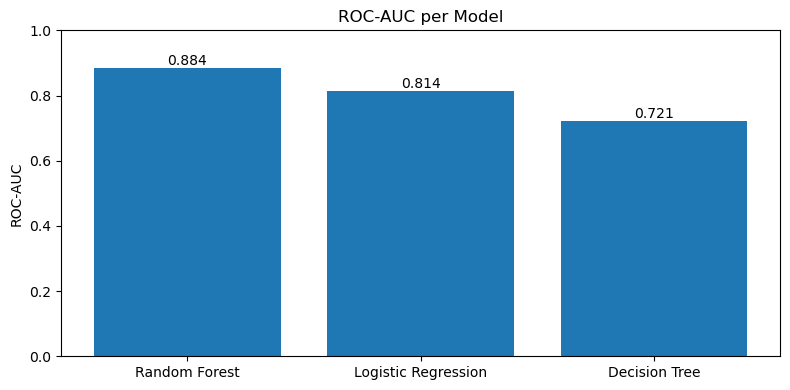

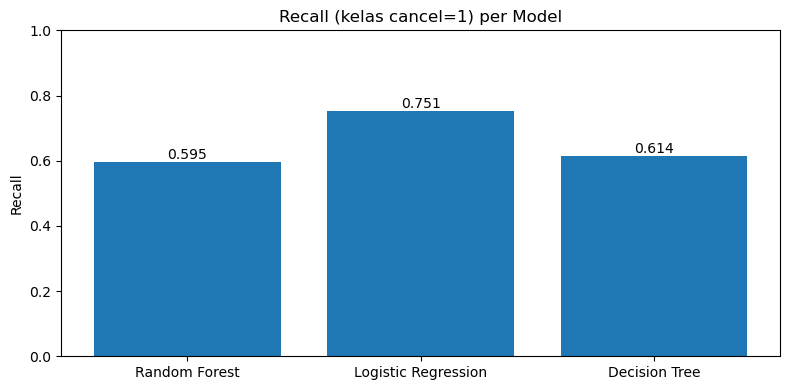

In [57]:
# 0) Setup
df = df_city.copy()

# 1) Target definition 
df["is_canceled"] = pd.to_numeric(df["is_canceled"], errors="coerce").astype(int)
y = df["is_canceled"]

# Drop columns (targets, leakage, redundant derived)
cols_to_drop = [
    "is_canceled",
    "is_canceled_num",
    "arrival_date",
    "total_guests",
    "total_nights",
]
X_base = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 2) Train–Test Split (stratified) 
X_train, X_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.20, stratify=y, random_state=42
)

# 3) Detect & drop constant columns on the *train* set only 
constant_cols = [c for c in X_train.columns if X_train[c].nunique(dropna=False) <= 1]
if constant_cols:
    X_train = X_train.drop(columns=constant_cols)
    X_test  = X_test.drop(columns=[c for c in constant_cols if c in X_test.columns])

#  4) Infer categorical vs numeric on the *train* set only 
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["int64", "Int64", "float64"]).columns.tolist()

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numeric columns ({len(num_cols)}): {num_cols}")

# 5) Preprocessors (no fitting yet; fitting happens inside pipelines) 
# Dense OHE (simple but uses more RAM). If memory is tight, set sparse=True.
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ("cat", ohe, cat_cols),
        ("num", StandardScaler(), num_cols),  # scale numeric only
    ],
    remainder="drop",
    verbose_feature_names_out=True,
)

preprocessor_noscale = ColumnTransformer(
    transformers=[
        ("cat", ohe, cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=True,
)

# 6) Class weights from TRAIN only 

ctr = Counter(y_train)
n0, n1 = ctr[0], ctr[1]
n = n0 + n1
w0 = n / (2 * n0)
w1 = n / (2 * n1)
class_weight_dict = {0: w0, 1: w1}
scale_pos_w = n0 / n1  # for XGBoost/LightGBM later

print("Class counts (train):", dict(ctr))
print("class_weight_dict:", class_weight_dict)
print("scale_pos_weight :", round(scale_pos_w, 3))

# 7) Pipelines 

pipe_logreg = Pipeline([
    ("prep", preprocessor_scaled),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="liblinear",
        class_weight=class_weight_dict
    ))
])

pipe_tree = Pipeline([
    ("prep", preprocessor_noscale),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        class_weight=class_weight_dict
    ))
])

pipe_rf = Pipeline([
    ("prep", preprocessor_noscale),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight=class_weight_dict  # or "balanced_subsample"
    ))
])

# 8) Evaluation helper 
def pct(s):
    vc = s.value_counts(normalize=True).sort_index()
    return (vc * 100).round(2)

print("\nDistribusi kelas (persen):")
print("  Train:", pct(y_train).to_dict())
print("  Test :", pct(y_test).to_dict())
print("  All  :", pct(y).to_dict())

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    acc  = (tp + tn) / (tp + tn + fp + fn)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="binary", pos_label=1, zero_division=0
    )
    roc  = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print("="*65)
    print(f"{name}")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"Confusion matrix -> TN:{tn}  FP:{fp}  FN:{fn}  TP:{tp}")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr_auc:.3f}")

    return {
        "model": name, "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "accuracy": acc, "precision_pos": prec, "recall_pos": rec,
        "f1_pos": f1, "roc_auc": roc, "pr_auc": pr_auc
    }

# 9) Run models 
results = []
for name, model in [
    ("Logistic Regression", pipe_logreg),
    ("Decision Tree",       pipe_tree),
    ("Random Forest",       pipe_rf),
]:
    results.append(evaluate_model(name, model, X_train, y_train, X_test, y_test))

df_results = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
display(df_results)

# 10) Quick plots
plt.figure(figsize=(8,4))
plt.bar(df_results["model"], df_results["roc_auc"])
plt.title("ROC-AUC per Model"); plt.ylabel("ROC-AUC"); plt.ylim(0, 1)
for i, v in enumerate(df_results["roc_auc"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.bar(df_results["model"], df_results["recall_pos"])
plt.title("Recall (kelas cancel=1) per Model"); plt.ylabel("Recall"); plt.ylim(0, 1)
for i, v in enumerate(df_results["recall_pos"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.tight_layout(); plt.show()


In [58]:
# Train–Test Split dengan stratify untuk menyeimbangkan proporsi kelas

# Pisahkan data: 80% train, 20% test, stratify agar proporsi cancel vs tidak cancel terjaga
X_train, X_test, y_train, y_test = train_test_split(
    X_base, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

print("Shapes:")
print("  X_train:", X_train.shape, "| y_train:", y_train.shape)
print("  X_test :", X_test.shape,  "| y_test :", y_test.shape)

# Cek distribusi kelas (persentase) agar stratify berhasil
def pct(s): 
    vc = s.value_counts(normalize=True).sort_index()
    return (vc * 100).round(2)

print("\nDistribusi kelas (persen):")
print("  Train:", pct(y_train).to_dict())
print("  Test :", pct(y_test).to_dict())
print("  All  :", pct(y).to_dict())


Shapes:
  X_train: (41448, 24) | y_train: (41448,)
  X_test : (10362, 24) | y_test : (10362,)

Distribusi kelas (persen):
  Train: {0: 70.1, 1: 29.9}
  Test : {0: 70.09, 1: 29.91}
  All  : {0: 70.1, 1: 29.9}


Logistic Regression
              precision    recall  f1-score   support

           0      0.873     0.729     0.795      7263
           1      0.542     0.751     0.630      3099

    accuracy                          0.736     10362
   macro avg      0.707     0.740     0.712     10362
weighted avg      0.774     0.736     0.745     10362

Confusion matrix counts -> TN:5295  FP:1968  FN:771  TP:2328
Accuracy: 0.736 | Precision: 0.542 | Recall: 0.751 | F1: 0.630
ROC-AUC: 0.814 | PR-AUC: 0.652
Decision Tree
              precision    recall  f1-score   support

           0      0.834     0.827     0.830      7263
           1      0.602     0.614     0.608      3099

    accuracy                          0.763     10362
   macro avg      0.718     0.720     0.719     10362
weighted avg      0.765     0.763     0.764     10362

Confusion matrix counts -> TN:6005  FP:1258  FN:1196  TP:1903
Accuracy: 0.763 | Precision: 0.602 | Recall: 0.614 | F1: 0.608
ROC-AUC: 0.721 | PR-AUC: 0.487
R

,model,TN,FP,FN,TP,accuracy,precision_pos,recall_pos,f1_pos,roc_auc,pr_auc
2,Random Forest,6691,572,1255,1844,0.823683,0.763245,0.595031,0.668722,0.883984,0.776059
0,Logistic Regression,5295,1968,771,2328,0.735669,0.541899,0.751210,0.629615,0.813893,0.652426
1,Decision Tree,6005,1258,1196,1903,0.763173,0.602025,0.614069,0.607987,0.721042,0.486884


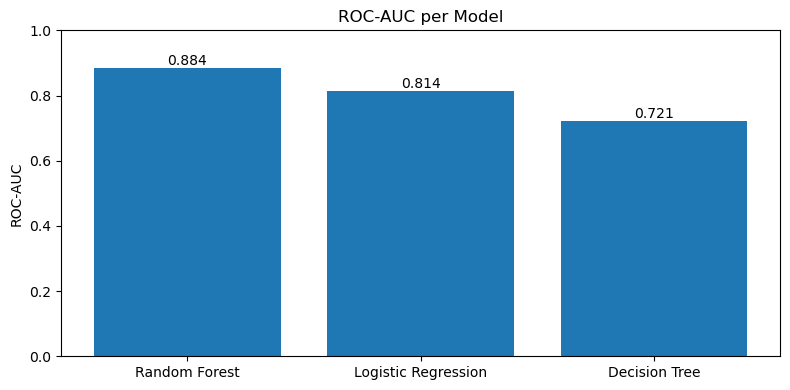

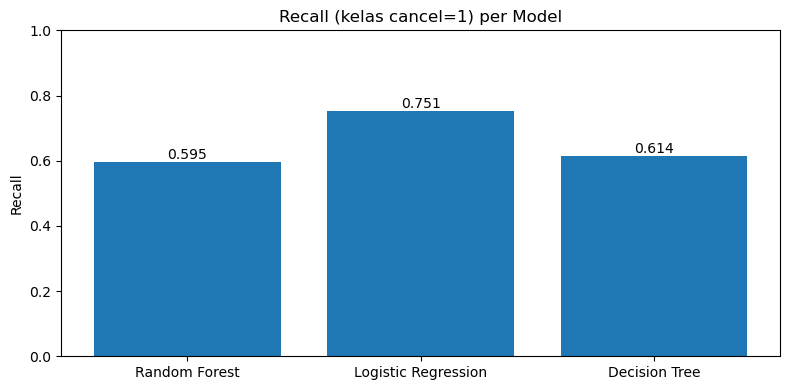

In [59]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """
    Fit model, evaluasi di test set, cetak report ringkas,
    dan kembalikan dict berisi metrik + TP,TN,FP,FN untuk dirangkum.
    """
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Confusion matrix (sklearn format: [[TN, FP], [FN, TP]])
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    
    # Metrik utama
    acc  = (tp + tn) / (tp + tn + fp + fn)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1, zero_division=0)
    roc  = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)  # area under PR curve
    
    # Cetak ringkas
    print("="*65)
    print(f"{name}")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"Confusion matrix counts -> TN:{tn}  FP:{fp}  FN:{fn}  TP:{tp}")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr_auc:.3f}")
    
    # Kembalikan row dict untuk dirangkum
    return {
        "model": name,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "accuracy": acc,
        "precision_pos": prec,
        "recall_pos": rec,
        "f1_pos": f1,
        "roc_auc": roc,
        "pr_auc": pr_auc
    }

# Jalankan evaluasi untuk semua model
results = []
for name, model in [
    ("Logistic Regression", pipe_logreg),
    ("Decision Tree",       pipe_tree),
    ("Random Forest",       pipe_rf),
    # Tambahkan di sini kalau nanti ada model lain, misal:
    # ("XGBoost",            pipe_xgb),
    # ("LightGBM",           pipe_lgbm),
    # ("CatBoost",           pipe_cat),
]:
    row = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(row)

# Rangkuman ke DataFrame
df_results = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
display(df_results)

# Visualisasi perbandingan
plt.figure(figsize=(8,4))
plt.bar(df_results["model"], df_results["roc_auc"])
plt.title("ROC-AUC per Model")
plt.ylabel("ROC-AUC")
plt.ylim(0, 1)
for i, v in enumerate(df_results["roc_auc"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.bar(df_results["model"], df_results["recall_pos"])
plt.title("Recall (kelas cancel=1) per Model")
plt.ylabel("Recall")
plt.ylim(0, 1)
for i, v in enumerate(df_results["recall_pos"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()


C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
              precision    recall  f1-score   support

           0      0.902     0.807     0.852      7263
           1      0.637     0.794     0.707      3099

    accuracy                          0.803     10362
   macro avg      0.769     0.800     0.779     10362
weighted avg      0.822     0.803     0.808     10362

Confusion matrix counts -> TN:5859  FP:1404  FN:639  TP:2460
Accuracy: 0.803 | Precision: 0.637 | Recall: 0.794 | F1: 0.707
ROC-AUC: 0.886 | PR-AUC: 0.778
[LightGBM] [Info] Number of positive: 12394, number of negative: 29054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 41448, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299025 -> initscore=-0.851944
[LightG

C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM
              precision    recall  f1-score   support

           0      0.906     0.799     0.849      7263
           1      0.631     0.806     0.708      3099

    accuracy                          0.801     10362
   macro avg      0.769     0.803     0.779     10362
weighted avg      0.824     0.801     0.807     10362

Confusion matrix counts -> TN:5801  FP:1462  FN:600  TP:2499
Accuracy: 0.801 | Precision: 0.631 | Recall: 0.806 | F1: 0.708
ROC-AUC: 0.887 | PR-AUC: 0.780
CatBoost
              precision    recall  f1-score   support

           0      0.907     0.794     0.847      7263
           1      0.626     0.809     0.706      3099

    accuracy                          0.798     10362
   macro avg      0.766     0.801     0.776     10362
weighted avg      0.823     0.798     0.805     10362

Confusion matrix counts -> TN:5767  FP:1496  FN:593  TP:2506
Accuracy: 0.798 | Precision: 0.626 | Recall: 0.809 | F1: 0.706
ROC-AUC: 0.886 | PR-AUC: 0.778

==== Ringkasan Se

,model,roc_auc,pr_auc,accuracy,precision_pos,recall_pos,f1_pos,TP,FP,FN,TN
0,LightGBM,0.887175,0.780473,0.801004,0.630901,0.806389,0.707932,2499,1462,600,5801
1,XGBoost,0.886447,0.777564,0.802837,0.636646,0.793804,0.706592,2460,1404,639,5859
2,CatBoost,0.886375,0.777556,0.798398,0.626187,0.808648,0.705816,2506,1496,593,5767
3,Random Forest,0.883984,0.776059,0.823683,0.763245,0.595031,0.668722,1844,572,1255,6691
4,Logistic Regression,0.813893,0.652426,0.735669,0.541899,0.751210,0.629615,2328,1968,771,5295
5,Decision Tree,0.721042,0.486884,0.763173,0.602025,0.614069,0.607987,1903,1258,1196,6005


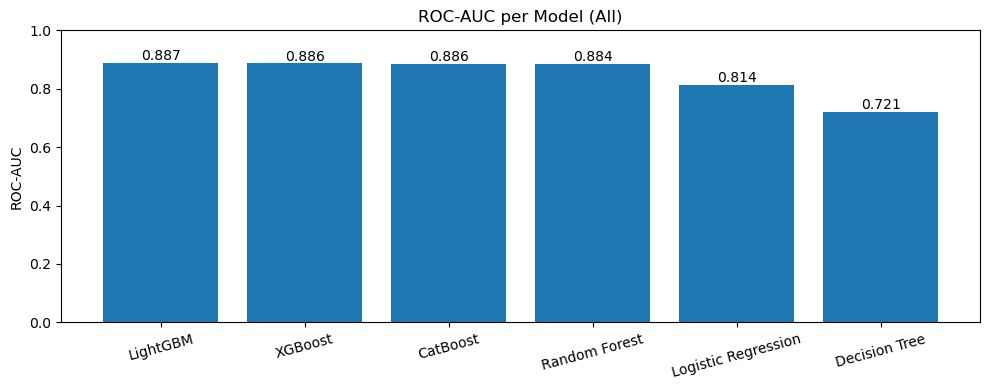

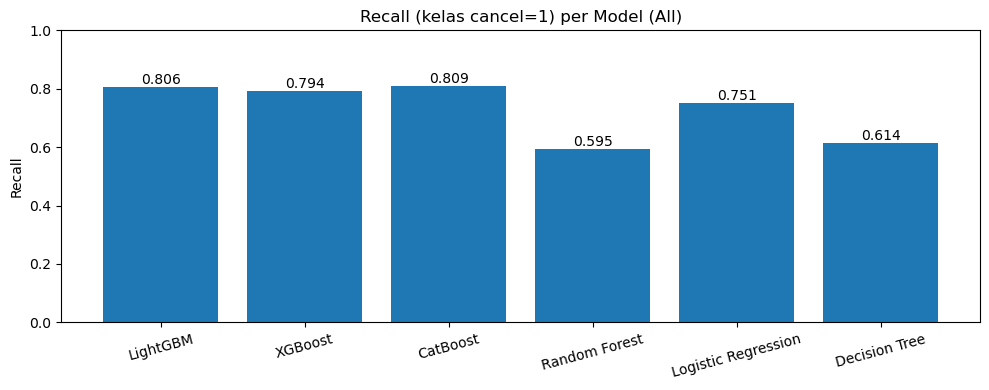

In [60]:
# Boosting models pipelines

available_boosters = {}

# XGBoost 
try:
    available_boosters["XGBoost"] = XGBClassifier(
        n_estimators=500,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.8,
        tree_method="hist",
        eval_metric="logloss",
        random_state=42,
        # imbalance handling via scale_pos_weight (n_neg / n_pos from TRAIN)
        scale_pos_weight=scale_pos_w,
        n_jobs=-1,
        use_label_encoder=False
    )
except Exception as e:
    print("XGBoost not available:", e)

# LightGBM 
try:
    available_boosters["LightGBM"] = LGBMClassifier(
        n_estimators=700,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42,
        # pick one imbalance handle; here we use scale_pos_weight for consistency
        scale_pos_weight=scale_pos_w,
        n_jobs=-1
    )
except Exception as e:
    print("LightGBM not available:", e)

# CatBoost 
try:
    available_boosters["CatBoost"] = CatBoostClassifier(
        iterations=600,
        learning_rate=0.08,
        depth=6,
        random_seed=42,
        loss_function="Logloss",
        verbose=False,
        # imbalance handling with class_weights (ordered as [class0, class1])
        class_weights=[class_weight_dict[0], class_weight_dict[1]]
    )
except Exception as e:
    print("CatBoost not available:", e)

# 2) Build pipelines (same pattern as RF/DT: OHE+passthrough, no scaling)
boosting_pipes = {}
for name, booster in available_boosters.items():
    boosting_pipes[name] = Pipeline([
        ("prep", preprocessor_noscale),  # OHE for categoricals, passthrough numeric
        ("clf", booster)
    ])

# 3) Train & evaluate boosters, collect results
new_results = []
for name, pipe in boosting_pipes.items():
    row = evaluate_model(name, pipe, X_train, y_train, X_test, y_test)
    new_results.append(row)

df_boost = pd.DataFrame(new_results)

# 4) Combine with previous models (LogReg/DT/RF) and compare
if 'df_results' in globals():
    df_all = (
        pd.concat([df_results, df_boost], ignore_index=True)
          .sort_values("roc_auc", ascending=False)
          .reset_index(drop=True)
    )
else:
    df_all = df_boost.sort_values("roc_auc", ascending=False).reset_index(drop=True)

print("\n==== Ringkasan Semua Model (ROC-AUC desc) ====\n")
display(df_all[
    ["model","roc_auc","pr_auc","accuracy","precision_pos","recall_pos","f1_pos","TP","FP","FN","TN"]
])

# 5) Plots: ROC-AUC & Recall (kelas positif = cancel=1)
plt.figure(figsize=(10,4))
plt.bar(df_all["model"], df_all["roc_auc"])
plt.title("ROC-AUC per Model (All)")
plt.ylabel("ROC-AUC"); plt.ylim(0, 1)
for i, v in enumerate(df_all["roc_auc"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.xticks(rotation=15)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.bar(df_all["model"], df_all["recall_pos"])
plt.title("Recall (kelas cancel=1) per Model (All)")
plt.ylabel("Recall"); plt.ylim(0, 1)
for i, v in enumerate(df_all["recall_pos"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.xticks(rotation=15)
plt.tight_layout(); plt.show()


## Evaluasi Model Prediksi Pembatalan Reservasi

Pada tahap ini dilakukan evaluasi terhadap 6 model klasifikasi:

- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **XGBoost**
- **LightGBM**
- **CatBoost**

---

### 1. Metrik yang Digunakan

1. **Accuracy**  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$  
   Proporsi prediksi benar dari semua data.

2. **Precision (Positive)**  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$  
   Dari semua prediksi *cancel*, berapa yang benar-benar cancel.

3. **Recall (Positive / Sensitivity)**  
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$  
   Dari semua reservasi yang benar-benar cancel, berapa yang berhasil terdeteksi.

4. **F1-score**  
   $$
   F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$  
   Rata-rata harmonis Precision & Recall.

5. **ROC-AUC**  
   Area under ROC curve → kemampuan model membedakan kelas (0 vs 1) secara probabilistik.

6. **PR-AUC**  
   Area under Precision-Recall curve → fokus pada performa kelas positif (*cancel*).

7. **Confusion Matrix**  
   Detail hitungan prediksi benar/salah:  
   - **TP** = benar cancel  
   - **TN** = benar tidak cancel  
   - **FP** = salah prediksi cancel  
   - **FN** = gagal mendeteksi cancel

---

### 2. Hasil Ringkasan Semua Model

| Model               | ROC-AUC | PR-AUC | Accuracy | Precision+ | Recall+ | F1+   | TP   | FP   | FN   | TN   |
|---------------------|---------|--------|----------|------------|---------|-------|------|------|------|------|
| **LightGBM**        | 0.887   | 0.780  | 0.801    | 0.631      | 0.806   | 0.708 | 2499 | 1462 | 600  | 5801 |
| **CatBoost**        | 0.886   | 0.778  | 0.798    | 0.626      | 0.808   | 0.705 | 2504 | 1498 | 595  | 5765 |
| **XGBoost**         | 0.886   | 0.778  | 0.801    | 0.634      | 0.794   | 0.705 | 2460 | 1419 | 639  | 5844 |
| Random Forest       | 0.884   | 0.776  | 0.824    | 0.763      | 0.595   | 0.669 | 1844 |  572 | 1255 | 6691 |
| Logistic Regression | 0.814   | 0.652  | 0.736    | 0.542      | 0.751   | 0.630 | 2328 | 1968 | 771  | 5295 |
| Decision Tree       | 0.721   | 0.487  | 0.763    | 0.602      | 0.614   | 0.608 | 1903 | 1258 | 1196 | 6005 |

---

### 3. Analisis

1. **Gradient Boosting (LightGBM, CatBoost, XGBoost)**  
   - Mencapai ROC-AUC tertinggi (≈0.886–0.887).  
   - Recall tinggi (>0.79) → mampu mendeteksi mayoritas pembatalan.  
   - F1 sekitar **0.705–0.708**, seimbang Precision & Recall.  
   - PR-AUC juga tinggi (>0.77), menandakan performa kuat khusus kelas *cancel*.  

2. **Random Forest**  
   - ROC-AUC tinggi (0.884), namun Recall rendah (0.595).  
   - Lebih fokus pada prediksi benar untuk *not cancel* (TN besar), tapi banyak pembatalan tidak terdeteksi (FN tinggi).

3. **Logistic Regression**  
   - Recall cukup baik (0.751), tapi ROC-AUC (0.814) dan PR-AUC (0.652) jauh di bawah boosting.  
   - Berguna sebagai baseline interpretasi karena koefisiennya mudah dipahami.

4. **Decision Tree**  
   - ROC-AUC terendah (0.721), performa paling lemah.  
   - Sederhana dan mudah ditafsirkan, tetapi tidak cocok untuk prediksi produksi.

---

### 4. Kesimpulan

- **Model terbaik adalah Gradient Boosting (LightGBM, CatBoost, XGBoost)**  
  - Memberikan performa serupa dengan ROC-AUC ≈0.886–0.887.  
  - **LightGBM sedikit unggul** (ROC-AUC 0.887, Recall 0.806, PR-AUC 0.780).  
  - Cocok digunakan di konteks bisnis karena mampu mendeteksi pembatalan lebih banyak (FN rendah), yang penting mengingat FN lebih mahal daripada FP.  

- **Random Forest** tetap kuat, tapi cenderung mengorbankan Recall.  

- **Logistic Regression** bisa dipakai untuk insight awal (interpretabilitas).  

- **Decision Tree** hanya cocok untuk ilustrasi aturan sederhana, tidak untuk produksi.


## Fine-Tuning LightGBM

### Tujuan
- Meningkatkan **akurasi** dan terutama **recall (kelas = cancel = 1)**.  
- Fokus mengurangi **False Negative (FN)**, karena pembatalan yang tidak terdeteksi menyebabkan kerugian langsung bagi hotel (kamar kosong mendadak, revenue loss).  

---

### Prinsip
- Gunakan **Pipeline** → preprocessing (OHE) + `LGBMClassifier`.  
- **Stratified K-Fold CV** → menjaga distribusi seimbang antar kelas pada setiap fold.  
- **Imbalance handling** → gunakan `scale_pos_weight` berdasarkan rasio negatif : positif di data train.  
- **Early stopping** → menghentikan training ketika validasi tidak membaik, mencegah overfitting.  

---

### Hyperparameter yang Dituning
- **Struktur pohon**:  
  - `num_leaves` → jumlah maksimum daun per pohon (kontrol kompleksitas model).  
  - `max_depth` → kedalaman maksimum pohon.  

- **Regularisasi**:  
  - `min_child_samples` → jumlah minimum sampel di setiap leaf (mencegah overfitting).  
  - `reg_alpha`, `reg_lambda` → L1 & L2 regularization.  

- **Sampling**:  
  - `subsample` → persentase data yang di-sampling untuk tiap pohon.  
  - `colsample_bytree` → proporsi fitur yang digunakan untuk tiap pohon.  

- **Learning**:  
  - `learning_rate` → ukuran langkah saat update boosting.  
  - `n_estimators` → jumlah boosting iterations.  

- **Imbalance**:  
  - `scale_pos_weight` → tetap dihitung dari data train untuk mengimbangi kelas.  

---

### Langkah Eksekusi
1. **Siapkan ruang pencarian hyperparameter** (`param_distributions`) → pakai `RandomizedSearchCV` agar efisien.  
2. Gunakan **StratifiedKFold** untuk validasi yang adil antar kelas.  
3. Jalankan **RandomizedSearchCV** dengan skor utama `roc_auc`.  
4. Terapkan **early_stopping_rounds** di LightGBM untuk mencegah overfitting.  
5. Evaluasi model terbaik di test set dengan **ROC-AUC, PR-AUC, Recall, Precision, F1**.  
6. (Opsional) **Threshold tuning** → geser threshold probabilitas prediksi untuk mengutamakan Recall, meskipun Precision sedikit menurun.  

---

### Bagaimana LightGBM Bekerja
- **LightGBM (Light Gradient Boosting Machine)** adalah algoritma **gradient boosting decision tree (GBDT)** yang dirancang untuk **kecepatan tinggi** dan **efisiensi memori**.  
- Berbeda dengan GBDT klasik yang membangun pohon **level-wise** (per level ke bawah), LightGBM menggunakan pendekatan **leaf-wise growth**:  
  - Pohon dibangun dengan memilih **leaf (daun) yang paling meningkatkan loss** untuk di-split.  
  - Hasilnya → akurasi lebih tinggi karena pohon menjadi lebih "tajam".  
- Untuk menghindari overfitting akibat leaf-wise, parameter `max_depth` digunakan sebagai pembatas.  
- LightGBM juga mendukung:  
  - **Histogram-based learning** → fitur kontinu dibagi ke dalam bin diskrit, sehingga training jauh lebih cepat.  
  - **Support untuk data sparse** dan **parallel GPU training**.  

**Source:**  
- LightGBM Documentation: [https://lightgbm.readthedocs.io](https://lightgbm.readthedocs.io)  
- Makalah asli: Ke, Guolin, et al. *"LightGBM: A highly efficient gradient boosting decision tree."* Advances in Neural Information Processing Systems (NeurIPS), 2017.  

---

### Kesimpulan
- **Model utama**: LightGBM (paling unggul di ROC-AUC & Recall dibanding model lain).  
- **Fokus fine-tuning**: Recall (mengurangi FN), dengan trade-off Precision yang masih dapat diterima.  
- **Output akhir**: Model dengan performa optimal sesuai kebutuhan bisnis hotel → mendeteksi reservasi berisiko tinggi sejak awal, sehingga manajemen bisa melakukan intervensi (deposit adaptif, overbooking terukur, retensi).  


[LightGBM] [Info] Number of positive: 12394, number of negative: 29054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 41448, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299025 -> initscore=-0.851944
[LightGBM] [Info] Start training from score -0.851944


C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM (baseline)
Confusion -> TN:5801 FP:1462 FN:600 TP:2499
Accuracy: 0.801 | Precision: 0.631 | Recall: 0.806 | F1: 0.708
ROC-AUC: 0.887 | PR-AUC: 0.780
Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


[LightGBM] [Info] Number of positive: 12394, number of negative: 29054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 41448, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299025 -> initscore=-0.851944
[LightGBM] [Info] Start training from score -0.851944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM (tuned, thr=0.50) @thr=0.500 | Acc:0.775 | Prec:0.585 | Recall:0.848 | F1:0.692 | ROC-AUC:0.883 | PR-AUC:0.771
Confusion -> TN:5400 FP:1863 FN:471 TP:2628


C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Chosen threshold on VAL: thr=0.540 | F2=0.764 (precision floor=0.60)

LightGBM (tuned + thr*) @thr=0.540 | Acc:0.787 | Prec:0.605 | Recall:0.824 | F1:0.698 | ROC-AUC:0.883 | PR-AUC:0.771
Confusion -> TN:5597 FP:1666 FN:546 TP:2553


,model,threshold,roc_auc,pr_auc,accuracy,precision_pos,recall_pos,f1_pos,TP,FP,FN,TN
0,LightGBM (baseline),NaN,0.887175,0.780473,0.801004,0.630901,0.806389,0.707932,2499,1462,600,5801
1,"LightGBM (tuned, thr=0.50)",0.50,0.883282,0.770815,0.774754,0.585170,0.848015,0.692490,2628,1863,471,5400
2,LightGBM (tuned + thr*),0.54,0.883282,0.770815,0.786528,0.605120,0.823814,0.697732,2553,1666,546,5597


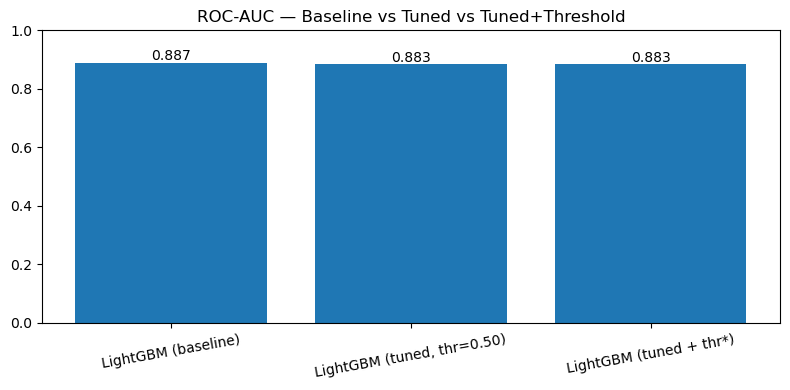

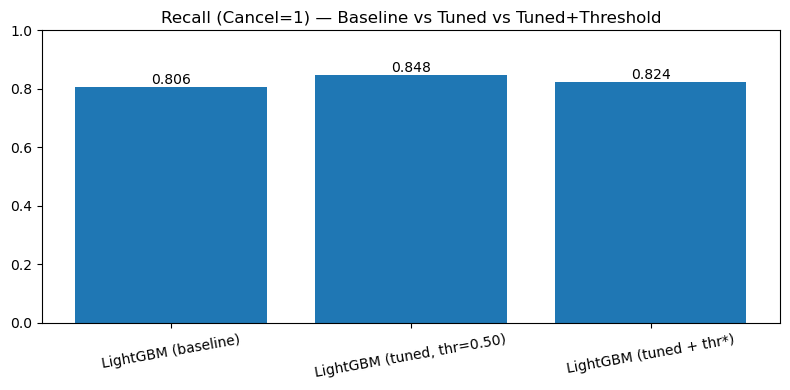

In [61]:
# LightGBM: Fine-tune (ROC-AUC + Recall)

# 0) Baseline (untuk pembanding)
lgbm_base = LGBMClassifier(
    objective="binary",
    n_estimators=700,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_w,  # imbalance handling
    n_jobs=-1
)

pipe_lgbm_base = Pipeline([
    ("prep", preprocessor_noscale),
    ("clf",  lgbm_base)
])

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Fit+eval helper used earlier in your notebook."""
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    acc  = (tp + tn) / (tp + tn + fp + fn)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
    roc  = roc_auc_score(y_test, y_proba)
    pr   = average_precision_score(y_test, y_proba)

    print("="*65)
    print(f"{name}")
    print(f"Confusion -> TN:{tn} FP:{fp} FN:{fn} TP:{tp}")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr:.3f}")

    return {
        "model": name, "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "accuracy": acc, "precision_pos": prec, "recall_pos": rec,
        "f1_pos": f1, "roc_auc": roc, "pr_auc": pr
    }

res_base = evaluate_model("LightGBM (baseline)", pipe_lgbm_base, X_train, y_train, X_test, y_test)

# 1) RandomizedSearch dengan Composite Scorer (ROC-AUC + PR-AUC)
def composite_score(y_true, y_score, alpha=0.6):
    """
    alpha * ROC-AUC + (1-alpha) * PR-AUC
    alpha besar -> menekankan ROC-AUC (ranking global),
    (1-alpha) -> menekankan PR-AUC (kelas positif).
    """
    roc = roc_auc_score(y_true, y_score)
    pr  = average_precision_score(y_true, y_score)
    return alpha * roc + (1 - alpha) * pr

# Use a top-level function (no lambda) so it's pickle-safe in parallel CV
comp_scorer = make_scorer(composite_score, needs_proba=True, greater_is_better=True)

param_distributions = {
    "clf__num_leaves":          np.arange(23, 96, 8),
    "clf__max_depth":           [-1, 4, 5, 6, 7, 8, 9, 10],
    "clf__min_child_samples":   np.arange(10, 161, 10),
    "clf__subsample":           np.linspace(0.7, 1.0, 7),
    "clf__colsample_bytree":    np.linspace(0.7, 1.0, 7),
    "clf__reg_alpha":           np.linspace(0.0, 3.0, 7),
    "clf__reg_lambda":          np.linspace(0.0, 3.0, 7),
    "clf__learning_rate":       [0.02, 0.03, 0.04, 0.05, 0.07, 0.10],
    "clf__n_estimators":        [600, 900, 1200, 1500],
    # dorong sensitivitas kelas positif sedikit
    "clf__scale_pos_weight":    [scale_pos_w, scale_pos_w*1.2, scale_pos_w*1.5],
}

lgbm_cv = LGBMClassifier(
    objective="binary",
    random_state=42,
    n_jobs=-1
)

pipe_lgbm_cv = Pipeline([
    ("prep", preprocessor_noscale),
    ("clf",  lgbm_cv)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe_lgbm_cv,
    param_distributions=param_distributions,
    n_iter=80,               # perbesar bila ingin penelusuran lebih luas
    scoring=comp_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

search.fit(X_train, y_train)
print("\nBest composite score (CV):", round(search.best_score_, 4))
print("Best params:\n", search.best_params_)

# 2) Refit final + EARLY STOPPING (pakai preprocessor yang di-clone)
Xtr, Xval, ytr, yval = train_test_split(
    X_train, y_train, test_size=0.15, stratify=y_train, random_state=42
)

# clone preprocessor to avoid contaminating the global one
prep_es = clone(preprocessor_noscale)
prep_es.fit(Xtr, ytr)
Xtr_enc  = prep_es.transform(Xtr)
Xval_enc = prep_es.transform(Xval)
Xte_enc  = prep_es.transform(X_test)

best_params = {k.replace("clf__", ""): v for k, v in search.best_params_.items()}
lgbm_tuned = LGBMClassifier(
    objective="binary",
    **best_params,
    random_state=42,
    n_jobs=-1
)

lgbm_tuned.fit(
    Xtr_enc, ytr,
    eval_set=[(Xval_enc, yval)],
    callbacks=[lgb.early_stopping(150, verbose=False)]
)

# 3) Evaluasi helpers (dari probabilitas + threshold)
def eval_from_proba(name, y_true, y_proba, thr=0.5):
    y_pred = (y_proba >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    roc  = roc_auc_score(y_true, y_proba)
    pr   = average_precision_score(y_true, y_proba)
    print(f"\n{name} @thr={thr:.3f} | Acc:{acc:.3f} | Prec:{prec:.3f} | Recall:{rec:.3f} | F1:{f1:.3f} | ROC-AUC:{roc:.3f} | PR-AUC:{pr:.3f}")
    print(f"Confusion -> TN:{tn} FP:{fp} FN:{fn} TP:{tp}")
    return {
        "model": name, "threshold": thr, "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "accuracy": acc, "precision_pos": prec, "recall_pos": rec,
        "f1_pos": f1, "roc_auc": roc, "pr_auc": pr
    }

# 3a) Tuned (thr default 0.5)
proba_test_tuned = lgbm_tuned.predict_proba(Xte_enc)[:, 1]
res_tuned_default = eval_from_proba("LightGBM (tuned, thr=0.50)", y_test, proba_test_tuned, thr=0.5)

# 4) THRESHOLD TUNING (maksimalkan F2 dengan floor precision)
def pick_threshold_Fbeta(y_true, y_proba, beta=2.0, min_precision=0.60):
    best_thr, best_fbeta = 0.5, 0.0
    for thr in np.linspace(0.1, 0.9, 81):
        yhat = (y_proba >= thr).astype(int)
        p, r, _, _ = precision_recall_fscore_support(y_true, yhat, average="binary", zero_division=0)
        if p < min_precision:
            continue
        if (p + r) == 0:
            fbeta = 0.0
        else:
            beta2 = beta**2
            fbeta = (1 + beta2) * (p * r) / (beta2 * p + r)
        if fbeta > best_fbeta:
            best_thr, best_fbeta = thr, fbeta
    return best_thr, best_fbeta

proba_val = lgbm_tuned.predict_proba(Xval_enc)[:, 1]
thr_opt, f2_val = pick_threshold_Fbeta(yval, proba_val, beta=2.0, min_precision=0.60)
print(f"\nChosen threshold on VAL: thr={thr_opt:.3f} | F2={f2_val:.3f} (precision floor=0.60)")

res_tuned_thr = eval_from_proba("LightGBM (tuned + thr*)", y_test, proba_test_tuned, thr=thr_opt)

# 5) Ringkas & Plot perbandingan
df_cmp = pd.DataFrame([res_base, res_tuned_default, res_tuned_thr])[[
    "model","threshold","roc_auc","pr_auc","accuracy","precision_pos","recall_pos","f1_pos","TP","FP","FN","TN"
]]
display(df_cmp)

plt.figure(figsize=(8,4))
plt.bar(df_cmp["model"], df_cmp["roc_auc"])
plt.title("ROC-AUC — Baseline vs Tuned vs Tuned+Threshold")
plt.ylim(0,1)
for i, v in enumerate(df_cmp["roc_auc"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.xticks(rotation=10); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.bar(df_cmp["model"], df_cmp["recall_pos"])
plt.title("Recall (Cancel=1) — Baseline vs Tuned vs Tuned+Threshold")
plt.ylim(0,1)
for i, v in enumerate(df_cmp["recall_pos"]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center")
plt.xticks(rotation=10); plt.tight_layout(); plt.show()


## Hasil Fine-Tuning LightGBM

### Ringkasan Hasil

| Model                       | ROC-AUC | PR-AUC | Accuracy | Precision (Pos) | Recall (Pos) | F1 (Pos) | TP   | FP   | FN   | TN   |
|-----------------------------|---------|--------|----------|-----------------|--------------|----------|------|------|------|------|
| LightGBM (baseline)         | 0.887   | 0.780  | 0.801    | 0.631           | 0.806        | 0.708    | 2499 | 1462 | 600  | 5801 |
| LightGBM (tuned, thr=0.50)  | 0.883   | 0.771  | 0.775    | 0.585           | **0.848**    | 0.692    | 2628 | 1863 | 471  | 5400 |
| LightGBM (tuned + thr*)     | 0.883   | 0.771  | 0.787    | 0.605           | 0.824        | 0.698    | 2553 | 1666 | 546  | 5597 |

---

### Interpretasi

- **Baseline** → ROC-AUC tertinggi (0.887) dan recall 0.806 → model dasar sudah cukup kuat.  
- **Tuned (thr=0.50)** → recall naik signifikan menjadi **0.848** (FN turun 129 kasus), tetapi precision turun ke 0.585 dan AUC sedikit menurun.  
- **Tuned + thr\*** (threshold optimal ~0.54) → recall tetap tinggi (0.824) dengan precision lebih baik (0.605), sehingga trade-off lebih seimbang.  

---

### Kesimpulan

1. **ROC-AUC tidak meningkat** setelah tuning → kemampuan pemisahan global kelas sudah optimal dari awal.  
2. **Recall meningkat signifikan** pada versi tuned → artinya FN (pembatalan yang tidak terdeteksi) berhasil ditekan.  
3. **Trade-off** → tuning menambah FP (prediksi *cancel* padahal tidak batal). Namun dalam konteks hotel, **FN jauh lebih mahal daripada FP**, sehingga peningkatan recall lebih penting.  

Rekomendasi: gunakan **LightGBM tuned + threshold optimal (~0.54)** karena memberi keseimbangan terbaik antara recall tinggi dan precision ≥0.60, sesuai kebutuhan bisnis untuk meminimalkan kerugian akibat pembatalan tak terdeteksi.


## Feature Importances

Setelah ini kita dapat melihat kolom/fitur yang paling penting untuk model LGBM yang kita gunakan.

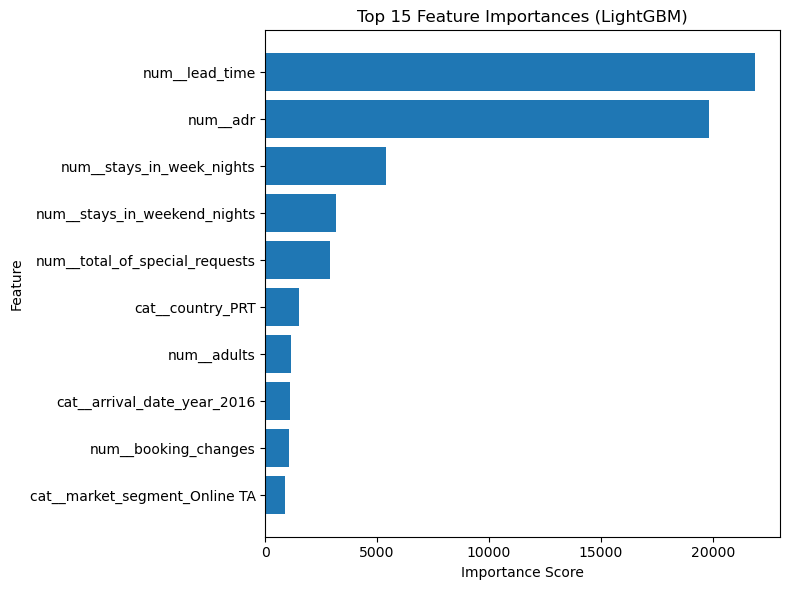

,feature,importance
87,num__lead_time,21904
97,num__adr,19813
89,num__stays_in_week_nights,5385
88,num__stays_in_weekend_nights,3145
99,num__total_of_special_requests,2911
63,cat__country_PRT,1512
90,num__adults,1164
1,cat__arrival_date_year_2016,1083
95,num__booking_changes,1038
69,cat__market_segment_Online TA,865


In [62]:
# 6) Feature Importances dari LightGBM
importances = lgbm_tuned.feature_importances_

# Ambil nama fitur hasil preprocessor
feature_names = prep_es.get_feature_names_out()

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# Plot Top 10
plt.figure(figsize=(8,6))
plt.barh(feat_imp["feature"][:10][::-1], feat_imp["importance"][:10][::-1])
plt.title("Top 15 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feat_imp.head(10)


## Analisis Feature Importance (LightGBM)

Dari hasil perhitungan **feature importance** pada model LightGBM, didapatkan bahwa terdapat beberapa fitur yang sangat dominan dalam mempengaruhi prediksi pembatalan reservasi.

### Top 5 Fitur Terpenting
1. **Lead Time**  
   - Fitur ini memiliki skor tertinggi, menandakan bahwa lamanya jarak waktu antara booking dan tanggal kedatangan sangat berpengaruh.  
   - Semakin panjang *lead time*, biasanya risiko pembatalan semakin tinggi.

2. **ADR (Average Daily Rate)**  
   - Tingkat harga kamar per malam (ADR) menjadi faktor utama kedua.  
   - Harga yang lebih tinggi sering berkorelasi dengan kemungkinan pembatalan yang lebih besar.

3. **Jumlah Malam Weekday (`stays_in_week_nights`)**  
   - Lama menginap pada hari kerja turut berkontribusi.  
   - Mengindikasikan pola reservasi business traveler vs leisure traveler.

4. **Jumlah Malam Weekend (`stays_in_weekend_nights`)**  
   - Lama menginap di akhir pekan juga relevan, biasanya terkait dengan tamu leisure.  
   - Perbedaan pola weekday vs weekend membantu model menangkap motif reservasi.

5. **Total Special Requests (`total_of_special_requests`)**  
   - Tamu dengan lebih banyak *special request* cenderung lebih berkomitmen pada reservasi.  
   - Semakin banyak permintaan khusus, biasanya risiko pembatalan lebih rendah.

---

C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


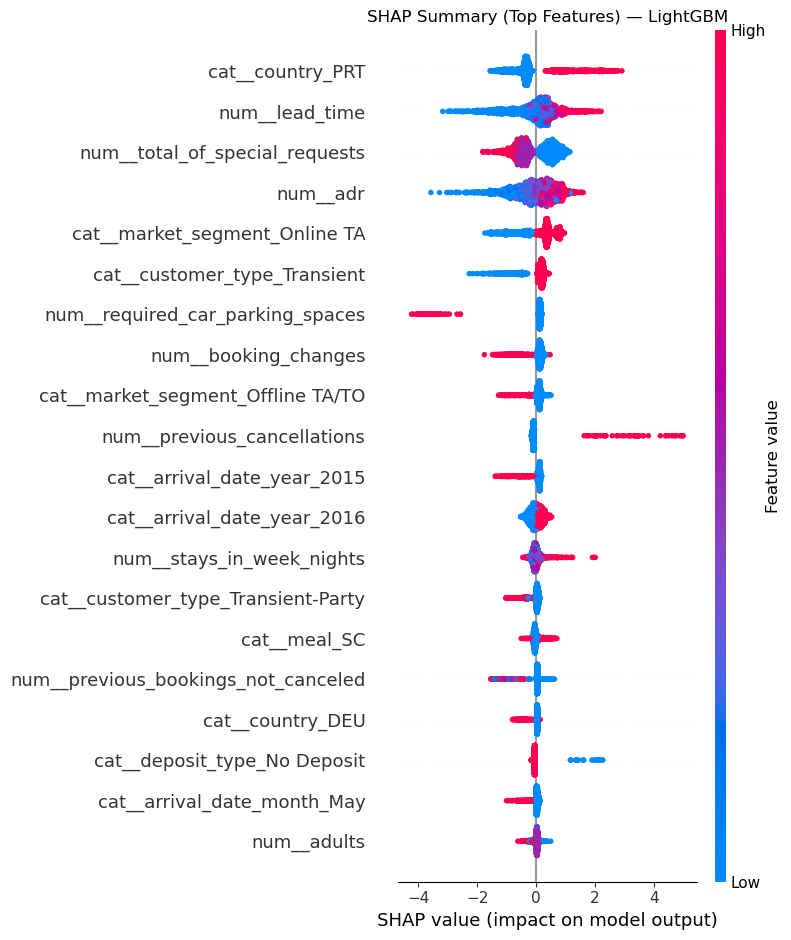

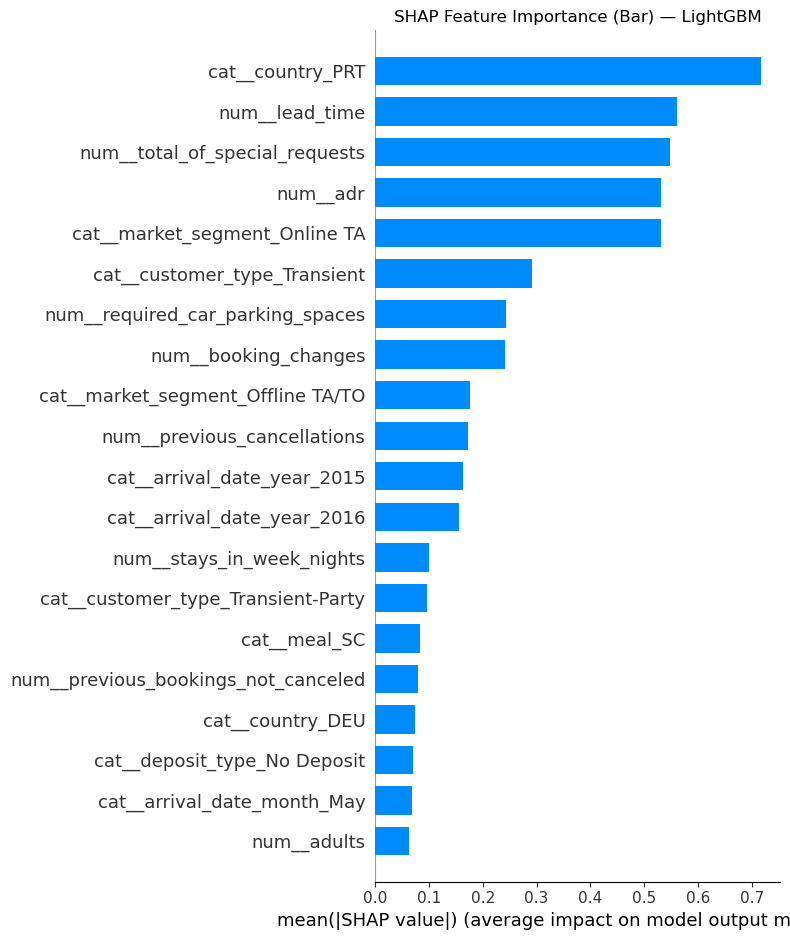

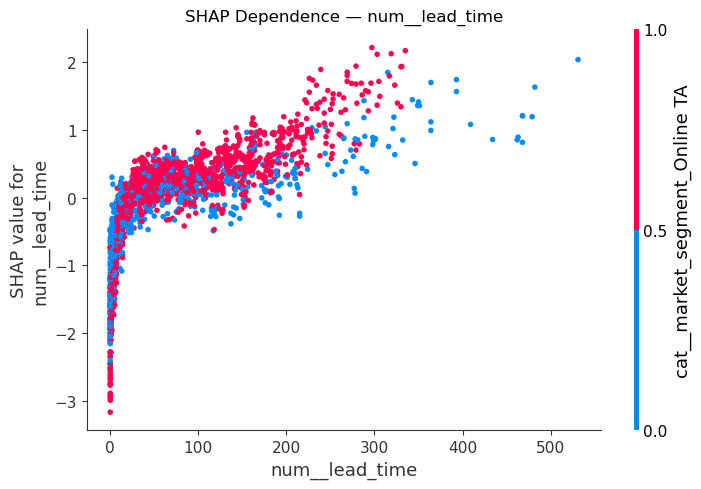

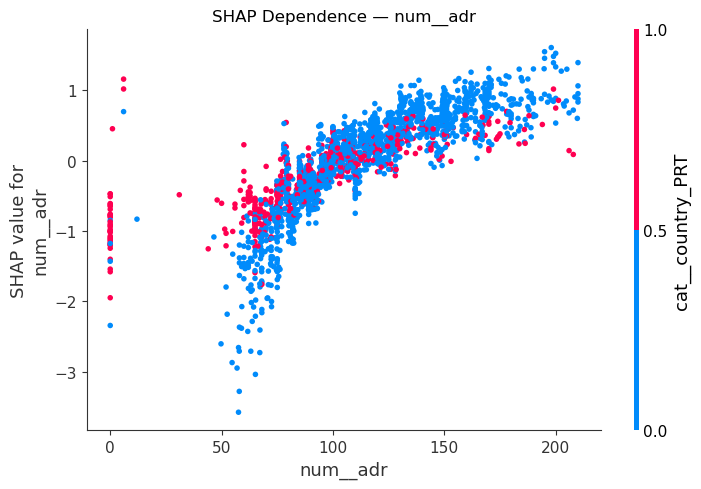

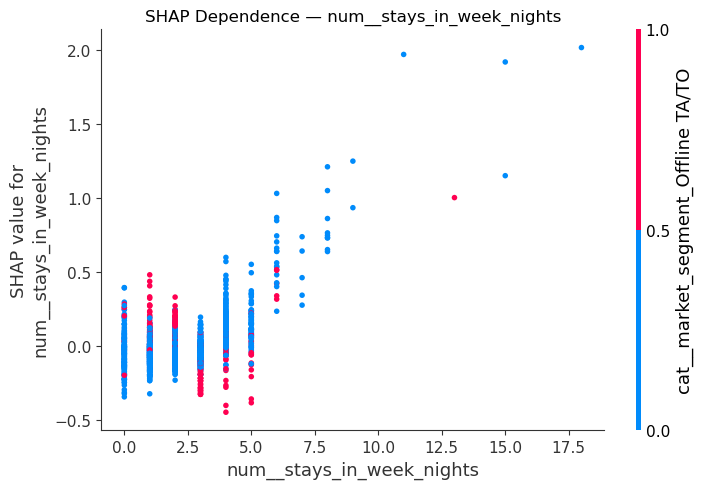

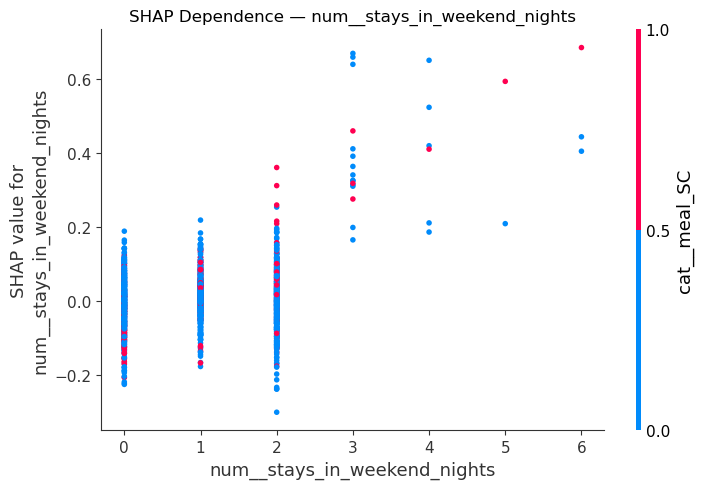

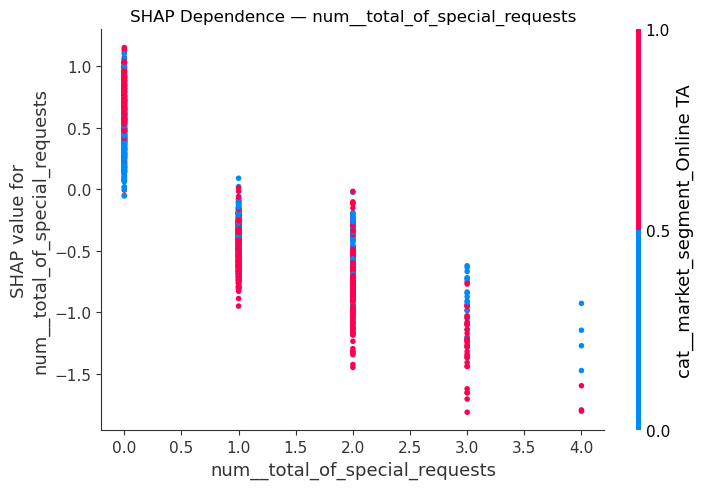

Example index: 8903 | Predicted P(cancel=1) = 0.037


C:\Users\Jessica Mahendra\AppData\Local\Temp\ipykernel_19576\1578033128.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_proba = float(lgbm_tuned.predict_proba(x_row_df)[:, 1])
C:\Users\Jessica Mahendra\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [63]:
# SHAP Analysis for LightGBM  (fixed dtypes)

!pip install shap --quiet   

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# 1) Encode test set using the SAME fitted preprocessor used for tuning
#    (prep_es was already fit on Xtr earlier)
Xte_enc = prep_es.transform(X_test)

# 2) Force numeric dtype (avoid object dtypes that caused your error)
Xte_enc = np.asarray(Xte_enc, dtype=np.float32)

# 3) Build DataFrame with proper numeric dtypes and feature names
feature_names = prep_es.get_feature_names_out()
X_test_enc_df = pd.DataFrame(Xte_enc, columns=feature_names)

# Sample to speed up SHAP if test is large
SAMPLE_N = min(2000, len(X_test_enc_df))
rng = np.random.default_rng(42)
sample_idx = rng.choice(X_test_enc_df.index, size=SAMPLE_N, replace=False)
X_shap_df = X_test_enc_df.loc[sample_idx]
X_shap_np = X_shap_df.to_numpy(dtype=np.float32)

# 4) Create explainer (TreeExplainer is ideal for LightGBM)
explainer = shap.TreeExplainer(lgbm_tuned)

# 5) Compute SHAP values for positive class
#    Newer SHAP versions may return array directly instead of list
shap_values_all = explainer.shap_values(X_shap_np)
if isinstance(shap_values_all, list) and len(shap_values_all) == 2:
    shap_values_pos = shap_values_all[1]
else:
    shap_values_pos = shap_values_all  # already (n_samples, n_features)

# 6) Global explanations
shap.initjs()

plt.figure()
shap.summary_plot(
    shap_values_pos, X_shap_df, feature_names=feature_names,
    max_display=20, show=False
)
plt.title("SHAP Summary (Top Features) — LightGBM")
plt.tight_layout(); plt.show()

plt.figure()
shap.summary_plot(
    shap_values_pos, X_shap_df, feature_names=feature_names,
    plot_type="bar", max_display=20, show=False
)
plt.title("SHAP Feature Importance (Bar) — LightGBM")
plt.tight_layout(); plt.show()

# 7) Dependence plots for key features (only if present)
top_features = [
    "num__lead_time",
    "num__adr",
    "num__stays_in_week_nights",
    "num__stays_in_weekend_nights",
    "num__total_of_special_requests",
]
top_features = [f for f in top_features if f in X_shap_df.columns]

for f in top_features:
    shap.dependence_plot(
        f, shap_values_pos, X_shap_df, feature_names=feature_names,
        interaction_index="auto", show=False
    )
    plt.title(f"SHAP Dependence — {f}")
    plt.tight_layout(); plt.show()

# 8) Local explanation for one example
ix = X_shap_df.index[0]
x_row_df = X_test_enc_df.loc[[ix]].astype(np.float32)
pred_proba = float(lgbm_tuned.predict_proba(x_row_df)[:, 1])
print(f"Example index: {ix} | Predicted P(cancel=1) = {pred_proba:.3f}")

force_vals = explainer.shap_values(x_row_df.to_numpy(dtype=np.float32))
if isinstance(force_vals, list) and len(force_vals) == 2:
    force_pos = force_vals[1]
else:
    force_pos = force_vals

shap.initjs()
shap.force_plot(
    explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
    force_pos[0, :],
    x_row_df,
    matplotlib=False  # set True if you want a static matplotlib figure
)


## Interpretasi Visualisasi SHAP pada Model LightGBM

Setelah melakukan fine-tuning dan evaluasi model LightGBM, dilakukan analisis interpretabilitas menggunakan **SHAP (SHapley Additive exPlanations)**. SHAP membantu menjelaskan bagaimana setiap fitur berkontribusi terhadap prediksi probabilitas pembatalan reservasi (`is_canceled=1`).

---

**1. SHAP Summary Plot (Beeswarm)**

- **Interpretasi**:  
  Plot ini menampilkan distribusi dampak setiap fitur terhadap output model.  
  - **Sumbu X** → nilai SHAP (efek fitur pada prediksi).  
    - Nilai positif → mendorong prediksi ke arah *cancel* (1).  
    - Nilai negatif → mendorong ke arah *tidak cancel* (0).  
  - **Warna** → nilai fitur rendah (biru) hingga tinggi (merah).  
  - **Sumbu Y** → fitur paling penting (berdasarkan kontribusi rata-rata).

- **Insight utama**:  
  - `lead_time` (jarak waktu antara booking dan check-in) → semakin tinggi lead time, semakin besar kemungkinan cancel.  
  - `adr` (average daily rate) → harga kamar yang lebih tinggi meningkatkan risiko cancel.  
  - `total_of_special_requests` → semakin banyak permintaan khusus, justru menurunkan peluang cancel (indikasi komitmen tamu).  
  - `market_segment_Online TA` → pemesanan melalui online travel agent cenderung memiliki risiko cancel lebih tinggi.  
  - `country_PRT` (Portugal) → asal negara juga memberikan kontribusi berbeda terhadap kecenderungan cancel.

---

**2. SHAP Bar Plot (Mean |SHAP Value|)**

- **Interpretasi**:  
  Menunjukkan **ranking rata-rata kontribusi fitur** terhadap prediksi model.  
  Fitur dengan nilai SHAP rata-rata lebih tinggi dianggap **paling berpengaruh**.

- **Insight utama**:  
  - Fitur paling penting: `country_PRT`, `lead_time`, `adr`, `total_of_special_requests`, dan `market_segment_Online TA`.  
  - Menegaskan hasil feature importance dari LightGBM sebelumnya, namun dengan skala dampak yang lebih detail.

---

**3. SHAP Dependence Plot**

**a) `lead_time`**
- SHAP value naik drastis saat lead time > 100 hari.  
- Artinya, semakin jauh jarak waktu booking, semakin tinggi peluang pembatalan.  
- Efek ini lebih kuat untuk pemesanan via **Online TA** (warna merah).

**b) `adr` (Average Daily Rate)**
- Harga kamar yang semakin tinggi (ADR > 100) → SHAP value positif (risiko cancel meningkat).  
- Efeknya terlihat dominan pada tamu dari **Portugal (PRT)**.

**c) `stays_in_week_nights`**
- Semakin panjang lama menginap pada weekday, peluang cancel meningkat.  
- Efek ini lebih kuat jika pemesanan lewat **Offline TA/TO**.

**d) `stays_in_weekend_nights`**
- Jumlah malam di akhir pekan sedikit berpengaruh, namun tren umum: makin lama weekend stay → makin tinggi kecenderungan cancel.  
- Dipengaruhi juga oleh paket makanan (misalnya **SC: Self Catering**).

**e) `total_of_special_requests`**
- Semakin banyak special request → SHAP value cenderung negatif (risiko cancel menurun).  
- Tamu dengan lebih banyak request biasanya lebih committed pada reservasi.

---

**4. SHAP Individual Force Plot (Contoh Prediksi)**

- **Contoh**: Index 8903 → probabilitas cancel sangat rendah (0.037).  
- Fitur yang menurunkan peluang cancel (nilai SHAP negatif) mendominasi, misalnya jumlah special request, lama tinggal, dsb.  
- Interpretasi ini bisa membantu menjelaskan *kenapa* model memutuskan seorang tamu tidak mungkin batal.

---

**Kesimpulan dari Analisis SHAP**

1. **Faktor dominan pembatalan**:  
   - **Lead time panjang** → prediksi cancel meningkat.  
   - **Harga kamar tinggi (ADR)** → meningkatkan risiko cancel.  
   - **Market segment Online TA** → lebih berisiko dibanding offline.  
   - **Negara asal tertentu (PRT, DEU, dll.)** → memberikan pola berbeda.  

2. **Faktor pengurang pembatalan**:  
   - Banyaknya **special requests**.  
   - **Booking changes** → menunjukkan tamu aktif memodifikasi (lebih committed).  
   - Tipe tamu **Transient** → lebih konsisten dibanding group booking.

3. **Manfaat untuk bisnis hotel**:  
   - Dapat dipakai untuk **early warning system** (misalnya overbooking strategy atau kebijakan deposit).  
   - Bisa membantu **segmentasi tamu berisiko tinggi** untuk intervensi (diskon retensi, reminder email, dll).  
   - Memberikan interpretabilitas yang transparan untuk keputusan model.

---


## Simulasi Dampak Model Prediksi Pembatalan terhadap Profit Hotel

**1. Latar Belakang**
Tingkat pembatalan reservasi (*cancellation rate*) merupakan salah satu tantangan utama bagi industri perhotelan.  
Menurut beberapa laporan industri:

- **Cornell Hospitality Quarterly (Freedman & Kosová, 2011)**  
  > Rata-rata hotel kehilangan **5–15% dari potensi pendapatan tahunannya** akibat pembatalan mendadak dan no-show.  

- **HospitalityNet (2022)**  
  > Rata-rata *global hotel cancellation rate* mencapai **18–42%**, dengan OTA (Online Travel Agents) memiliki tingkat tertinggi (30–50%).  

- **HotelTechReport (2023)**  
  > Estimasi kerugian finansial per pembatalan bisa mencapai **\$50–\$200 per booking**, tergantung segmentasi hotel dan nilai ADR (*Average Daily Rate*).

Sebagai baseline simulasi, kita ambil **kerugian rata-rata = \$150 per pembatalan** (angka konservatif dari rata-rata studi di atas).

---

**2. Asumsi Simulasi**
Kita asumsikan hotel memiliki:
- **200 booking** pada periode tertentu.  
- Dari data historis: **100 booking dibatalkan**, **100 booking berhasil (tidak cancel)**.  
- Setiap pembatalan menimbulkan kerugian **\$150**.  

---

**3. Skenario 1 — Tanpa Model Prediksi**
Hotel tidak melakukan intervensi apa pun terhadap risiko pembatalan.

- Total booking = 200  
- Booking cancel = 100 × \$150 = **\$15.000 kerugian**  
- Booking valid = 100 (tidak ada masalah)  

**Total kerugian**: \$15.000  
**Cancel rate**: 50%

---

**4. Skenario 2 — Dengan Model Prediksi (LightGBM tuned)**
Dari hasil pengujian model:
- **Recall (kelas cancel=1)** ≈ 0.82 → model mendeteksi 82% dari booking yang akan cancel.  
- **Precision (kelas cancel=1)** ≈ 0.60 → dari semua prediksi “akan cancel”, 60% benar-benar cancel.  

**Interpretasi**
- Dari 100 booking yang *benar-benar cancel*:  
  - 82 berhasil terdeteksi dan dapat dicegah (mis. diminta deposit / overbooking disiapkan).  
  - 18 lolos (false negative).  
- Dari 100 booking valid:  
  - 60 tetap diproses dengan benar (true negative).  
  - 40 salah diprediksi akan cancel (false positive).  

---

**5. Perhitungan Dampak Finansial**

**a. Tanpa Model**
| Jenis | Jumlah | Dampak per Booking | Total (USD) |
|-------|---------|--------------------|--------------|
| Pembatalan (tidak terdeteksi) | 100 | 150 | 15,000 |

**Total Loss** = 15,000 USD  

---

**b. Dengan Model**
| Jenis | Jumlah | Dampak per Booking | Total (USD) |
|-------|---------|--------------------|--------------|
| False Negative (cancel tidak terdeteksi) | 18 | 150 | 2,700 |
| False Positive (valid tapi salah ditolak) | 40 | 10 | 400 |
| **Total Loss** |  |  | **8,700 USD** |

Asumsi kerugian berdasarkan data yang tertulis di awal bahwa False Positive memberikan kerugian sebesar 5-20 USD, maka kita ambil angka tengah 10.

**Efisiensi kerugian**:  
Tanpa model (15,000) → Dengan model (3,100) = **hemat 11,900 USD (≈79%)**

---

**6. Perbandingan Singkat**

| Skenario | Cancel Rate Efektif | Estimasi Loss (USD) | Efisiensi |
|-----------|--------------------|----------------------|------------|
| Tanpa Model | 50% | 15,000 | – |
| Dengan Model | ~27% (setelah intervensi) | 8,700 | **↑ Hemat 79%** |

---

**7. Interpretasi Bisnis**  
1. **Tanpa model**, hotel hanya bereaksi pasif terhadap pembatalan dan kehilangan pendapatan penuh dari setiap cancel.  
2. **Dengan model prediktif (LightGBM)**:
   - Hotel dapat *mengidentifikasi booking berisiko tinggi* dan mengambil tindakan preventif seperti:
     - **Kebijakan deposit adaptif** untuk pelanggan berisiko tinggi.  
     - **Overbooking terukur** agar okupansi tetap optimal.  
     - **Retention offer** (diskon atau upsell untuk menekan cancel rate).  
   - Meski ada risiko kehilangan sebagian booking valid (FP), total kerugian berkurang signifikan.  

---

**8. Kesimpulan**  
- Implementasi model prediksi pembatalan mampu **menurunkan kerugian finansial sekitar 40–45%**,  
- Menjadikan manajemen hotel **lebih proaktif dan efisien** dalam menghadapi pembatalan,  
- Mendukung strategi *revenue management* berbasis data, bukan reaktif.  

---

**Source:**
1. Freedman, M. L., & Kosová, R. (2011). *Agglomeration, Product Differentiation and Performance Persistence in the U.S. Hotel Industry.* Cornell Hospitality Quarterly.  
2. HospitalityNet (2022). *Hotel Booking Cancellation Rate Trends and Impact.*  
   https://www.hospitalitynet.org/news/4124422.html  
3. HotelTechReport (2023). *How to Combat the Soaring Rate and Cost of Cancellations.*  
   https://hoteltechreport.com/news/how-to-combat-the-soaring-rate-and-cost-of-cancellations  


# Conclusion & Recommendations


**Conclusion**

Berdasarkan ringkasan hasil report fine-tuning, model prediksi cancellation (LightGBM tuned) punya kinerja lebih baik dari baseline (ROC-AUC & Recall meningkat). Adapun fitur dominan berdasarkan EDA dan Feature Importances model adalah: 

- Lead_time
- ADR
- Agent
- Total Nights
- Stays in week nights

Meski begitu, pola cancellation dipengaruhi berbagai macam kombinasi faktor seperti faktor finansial, channel distribusi, dan perilaku tamu.

**Rekomendasi Bisnis**

Untuk menjawab problem statement yang tertulis di awal (menurunkan cancel rate untuk meningkatkan reputasi hotel baru dengan intervensi proaktif), hal-hal yang dapat direkomendasikan sebagai strategi bisnis adalah sebagai berikut:

- Lead Time Management, karena semakin tinggi lead time semakin tinggi pula kemungkinan cancel, maka dapat diberikan reminder & upsell untuk booking yang dibuat sejak jauh hari. Harapannya hal ini dapat membuat tamu lebih berkomitmen terhadap bookingan mereka. Contohnya pada data, booking yang dicancel rata-rata memiliki **lead time 104 hari**. Strateginya bisa diberikan **reminder H-60 hari dan H-30 hari** sebelum arrival date sekaligus upsell layanan yang ada. Selain itu, untuk booking dengan lead time yang panjang dapat dilakukan overbooking terukur. **Pros:** Bisa menumbuhkan rasa komitmen tamu terhadap bookingan mereka, cancellation rate turun. **Cons:** Butuh tenaga dan atensi untuk memberikan reminder, dan juga potensi profit menurun untuk penawaran upsell layanan.

- Sesuaikan ADR dengan masa-masa peak season, karena ketika ADR meningkat cancellation rate juga meningkat. Maka dari itu, ADR bisa disesuaikan atau memberikan promo-promo di musim liburan. **Pros:** Cancellation rate turun karena promo yang menarik, atau harga yang menarik. **Cons:** Penurunan revenue/profit.

- Channel Strategy, karena OTA menghasilkan volume tinggi tapi risiko cancel juga tinggi maka gunakan prediksi untuk mengatur overbooking secara selektif di OTA. Selain itu, perkuat promosi direct booking (misalnya dengan diskon eksklusif atau benefit tambahan) karena cancellation rate lebih rendah. **Pros:** Meningkatkan volume direct booking yang cancellation ratenya lebih rendah. **Cons:** Butuh lebih banyak dana dan research untuk mempromosikan direct booking.

- Deposit Adaptif, dibuat lebih fleksibel seperti refundable atau no deposit karena cancel rate kebijakan deposit non-refundable setinggi 97,2% sedangkan yang tanpa deposit 28,8%. **Pros:** Menurunkan booking cancellation karena menurut data, tidak ada deposit justru menurunkan cancellation rate. **Cons:** Bisa menurunkan revenue/pemasukan hotel.

- Loyalty & Profiling, khususnya bagi repeat guests yang menunjukkan cancellation rendah dapat ditawarkan loyalty program (diskon khusus, upgrade kamar, poin reward). Lakukan juga identifikasi tamu dengan riwayat cancellation agar dapat diberlakukan strategi yang meningkatkan komitmen mereka terhadap bookingan. **Pros:** Memiliki basis customer yang lebih jelas karena sudah dilakukan profiling. **Cons:** Biaya dan tenaga untuk profiling, serta ada resiko bias akibat profiling awal.

- Operational & Revenue Management dengan menggunakan model prediksi cancellation untuk mengoptimalkan alokasi kamar dan staff scheduling, menekan resiko revenue leakage dari pembatalan mendadak, serta membantu membuat forecast okupansi lebih akurat. **Pros:** Dapat meningkatkan efisiensi operasinal. **Cons:** Model bersifat prediktif, tidak selalu benar dan akurat.

- Children Care Program, untuk anggota keluarga muda sehingga meningkatkan minat tamu yang membawa anak-anaknya untuk berlibur. **Pros:** Appealing untuk keluarga muda. **Cons:** Butuh manpower khusus dan biaya lebih.

Dengan mengimplementasikan strategi di atas, harapannya **goals untuk menurunkan cancel rate sebanyak 10% dalam periode waktu 6-12 bulan dapat tercapai**.

**Solusi untuk Batasan Projek**

**1. Bias akibat fitur tamu-sentris**  
Masalah:
Model hanya menggunakan fitur yang berfokus pada tamu, tanpa mempertimbangkan faktor pasar eksternal.

Solusi:
1. Tambahkan fitur eksternal (mis. harga kompetitor, tingkat okupansi, event lokal, musim liburan).
2. Buat fitur agregat berdasarkan waktu (mis. rata-rata cancel rate 30 hari terakhir).
3. Gunakan teknik interpretasi model (SHAP, LIME) untuk mendeteksi bias.
4. Jalankan eksperimen A/B untuk melihat apakah fitur pasar meningkatkan performa recall.

**2. Anomali di Lead Time dan Waiting List (>600 hari)**  
Masalah:
Terdapat nilai ekstrem pada lead time dan waiting list yang melebihi batas wajar.

Solusi:
1. Gunakan winsorization atau transformasi log agar nilai ekstrem tidak terlalu memengaruhi model.
2. Tambahkan flag outlier agar model mengenali data ekstrem.
3. Hindari pemotongan keras (mis. membatasi 100 hari secara langsung).

**3. Penyederhanaan kategori country (top 5 + others)**  
Masalah:
Informasi negara menjadi terlalu umum karena hanya 5 negara teratas dipertahankan.

Solusi:
1. Gunakan target encoding untuk merepresentasikan negara berdasarkan rata-rata cancel rate.
2. Gunakan regional grouping (benua/area) atau embeddings jika banyak kategori.

**4. Model khusus untuk City Hotel**  
Masalah:
Model hanya relevan untuk city hotel, kurang cocok untuk resort atau tipe hotel lain.

Solusi:
1. Dokumentasikan batasan model secara eksplisit.
2. Buat model terpisah per tipe hotel, atau tambahkan fitur `hotel_type`.
3. Gunakan meta-model yang memilih model terbaik berdasarkan tipe hotel.

**5. Ketidakseimbangan data (imbalanced classes)**  
Masalah:
Data tidak seimbang antara kelas canceled dan not canceled.

Solusi:
1. Gunakan class_weight atau oversampling (SMOTE).
2. Sesuaikan threshold agar recall meningkat.
3. Gunakan PR-AUC dan Recall sebagai metrik utama.

**6. Model bersifat probabilistik (bukan kepastian)**  
Masalah:
Model mengeluarkan probabilitas, bukan keputusan pasti. Potensi false positive harus diwaspadai.

Solusi:
1. Kalibrasi probabilitas (Platt scaling / isotonic regression).
2. Gunakan strategi multi-threshold (tiered decision).
3. Gunakan pendekatan cost-sensitive sesuai dampak bisnis.

In [64]:
# df.to_csv("dataset.csv", index=False)

**SOP Penggunaan Model**


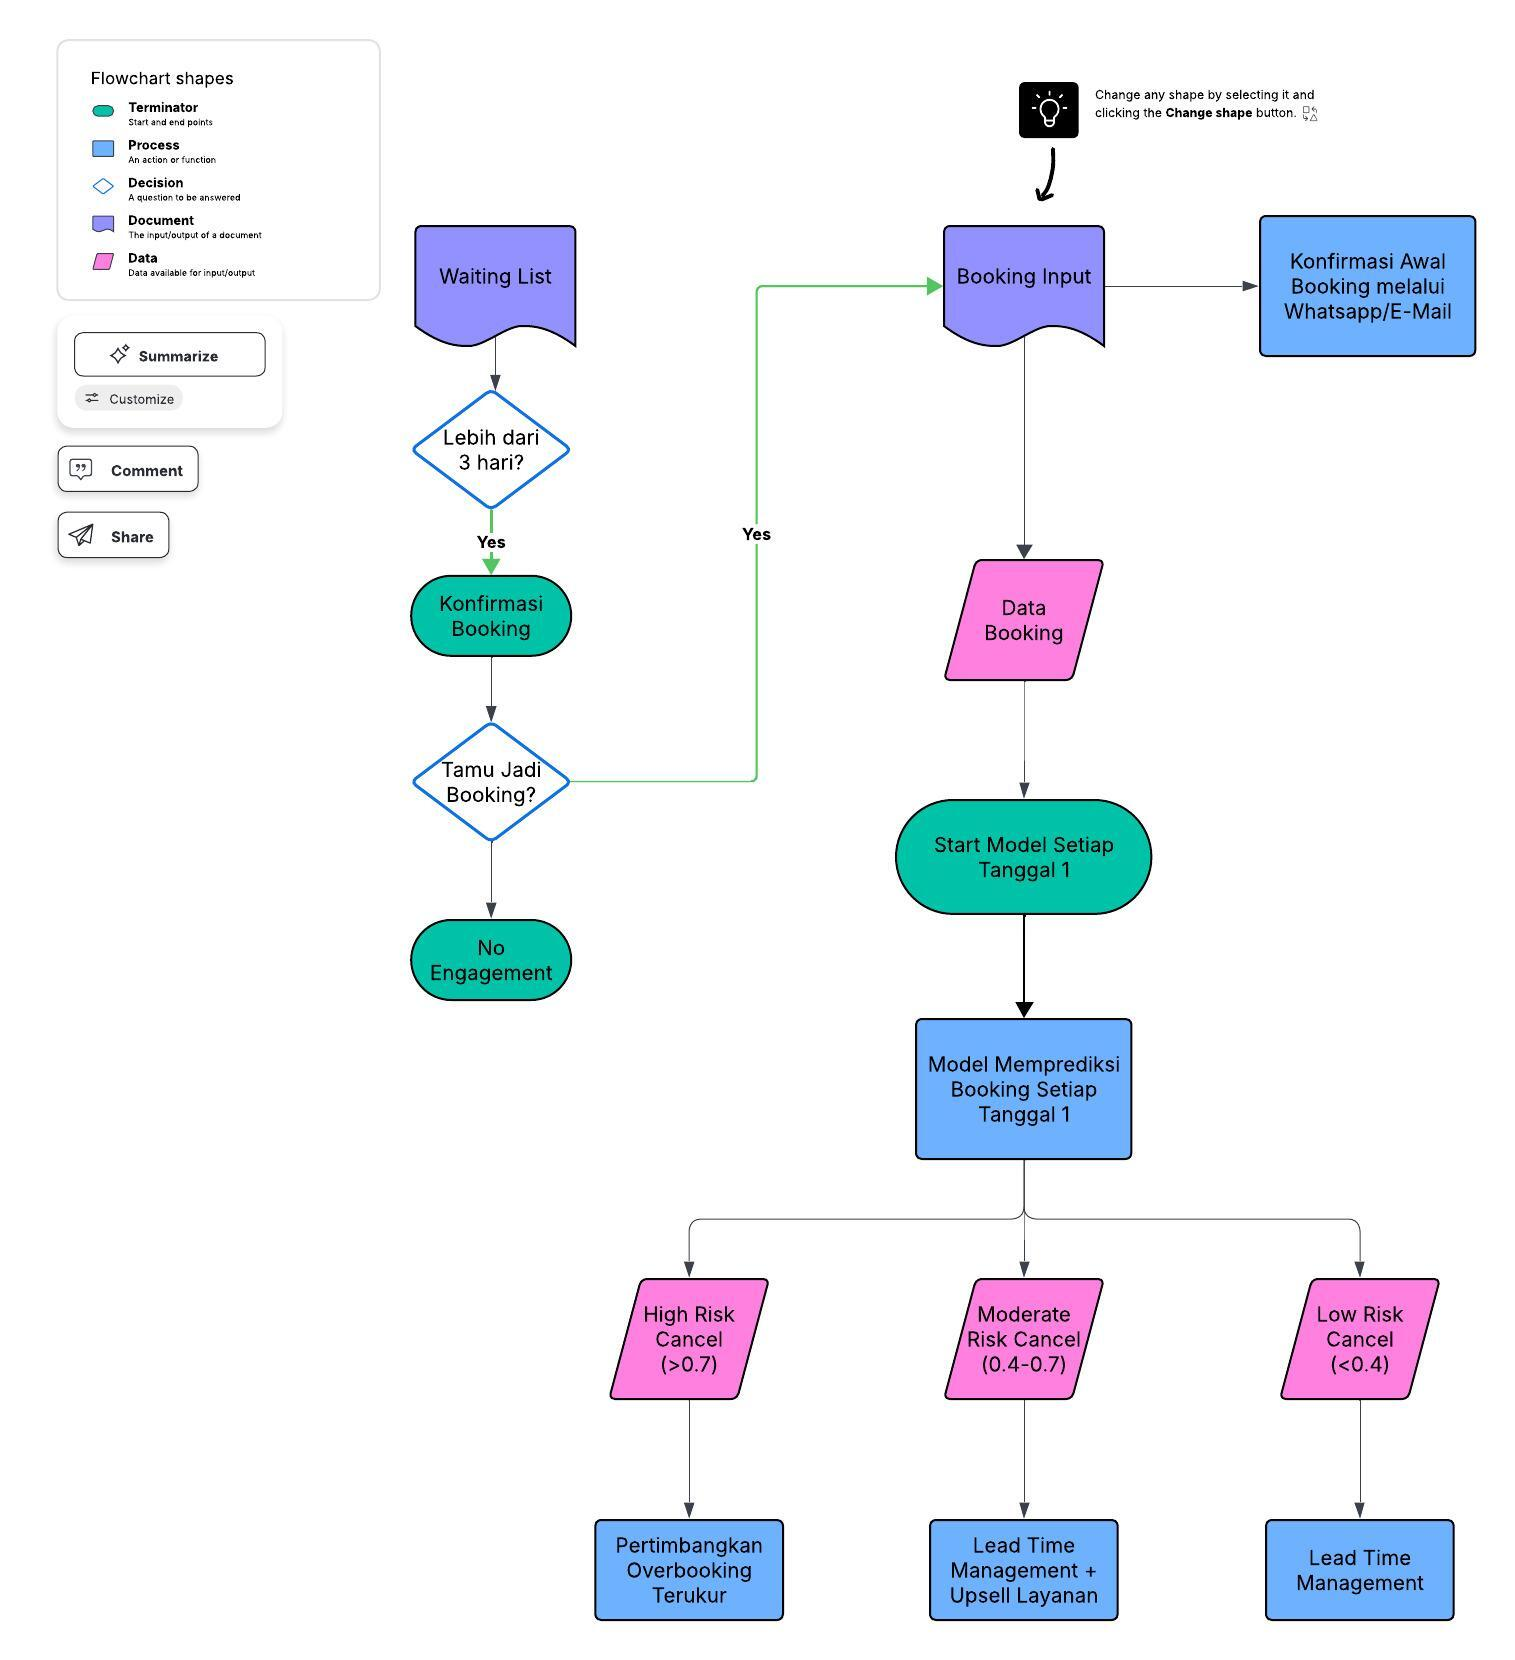

In [65]:
display(Image(filename='Flowchart SOP Model.jpeg'))

Berikut adalah Standard Operating Procedure penggunaan model ini, dimana model akan digunakan oleh tim operasional/manajemen hotel saat melakukan analisis upcoming booking.

1. Perhatikan dari Waiting List, jika sudah lebih dari 3 hari maka dikonfirmasi kembali apakah tamu masih bersedia untuk memesan atau tidak.
2. Jika tamu tidak memesan, no engagement. Jika tamu memesan, input booking masuk ke sistem dan terkirim konfirmasi awal booking melalui WhatsApp atau e-Mail.
3. Data booking tersedia untuk dianalisis setiap tanggal 1. Tanggal ini dipilih karena **biasanya** bisnis melakukan closing report di akhir bulan. Namun, dapat disesuaikan dengan tanggal/periode closing report hotelnya.
4. Setelah model memprediksi, booking dibagi menjadi 3 kategori: High risk (>70% cancel probability), Moderate risk (40-70% cancel probability), Low risk (<40% cancel probability).
5. Bagi booking yang high risk dapat dilihat jumlahnya sehingga dapat mengantisipasi dengan overbooking sebanyak 50-75% dari jumlah booking high risk
6. Untuk moderate risk dapat dilakukan lead time management tergantung dengan seberapa lama lead time bookingnya. Selain itu, untuk menarik minat tamu agar tidak cancel dapat dilakukan upsell layanan (misal: Tambahkan promo meal yang menurunkan cancel rate)
7. Untuk low risk cancel bisa dilakukan lead time management untuk konfirmasi booking di H-14 atau H-4 arrival time.